In [1]:
import json
import pickle
import os, sys
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

try:
       from prophet.plot import plot_plotly, plot_components_plotly
       from prophet import Prophet
except:
       !pip install prophet
       from prophet.plot import plot_plotly, plot_components_plotly
       from prophet import Prophet

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [95]:
fileName = "866420b8578e449b8b4546f2ee5adcf8.csv"#"overall.csv"
df = pd.read_csv(fileName)

In [8]:
hours=['01h', '02h', '03h', '04h', '05h', '06h', '07h', '08h',
       '09h', '10h', '11h', '12h', '13h', '14h', '15h', '16h', '17h', '18h',
       '19h', '20h', '21h', '22h', '23h', '24h']

In [10]:
chosen_contaminant = 'PM10'

In [11]:

station_col = 'NOM ESTACIO'
city_col = 'MUNICIPI'
date_col = 'DATA'
p_mean = "p_mean"
p_min = "p_min"
p_max = "p_max"
year = "y"
month = 'm'
dow = 'DOW'
CONTAMINANT = "CONTAMINANT"
UNITATS = 'UNITATS'
altitude = 'ALTITUD'
region_type = 'AREA URBANA'

# Build and publish an algorithm to predict the concentration of one pollutant of your choice for each hour of the day from February 15 to 28 - on average for all stations. (20 points)

In [15]:

def get_input(local=False):
    if local:
        print("Reading local file")
        return fileName
    dids = os.getenv("DIDS", None)
    if not dids:
        print("No DIDs found in environment. Aborting.")
        return
    dids = json.loads(dids)
    for did in dids:
        filename = f"data/inputs/{did}/0"  # 0 for metadata service
        print(f"Reading asset file {filename}.")
        return filename

def run_prophet(local=False):
    filename = get_input(local)
    df = pd.read_csv(filename)
    df_ = df.loc[df.CONTAMINANT == chosen_contaminant].groupby(station_col)
    forecasts = {}
    for station in df_.groups.keys():
        df_0 = df_.get_group(station)[hours+[date_col]]#.mean()
        for hour in hours:
            forecasts[hour] = {}
            print('Train model for:', hour)
            # df_ = stations_grp.get_group(station)[[hour]+['DATA']]
            df_t = df_0[[hour]+[date_col]]
            df_t.columns = ['y', 'ds']
            m = Prophet()
            m.fit(df_t)
            future = m.make_future_dataframe(periods=100)
            future.tail()
            forecasts[hour] = m.predict(future)
    filename = "prophet_model.pickle" if local else "/data/outputs/result"
    with open(filename, "wb") as pickle_file:
        print(f"Pickling results in {filename}")
        pickle.dump(forecasts, pickle_file)
        
    return forecasts

In [16]:
hourly_forecasts = run_prophet(True)

Reading local file


01:25:42 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 01h


01:25:42 - cmdstanpy - INFO - Chain [1] done processing
01:25:43 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 02h


01:25:43 - cmdstanpy - INFO - Chain [1] done processing
01:25:44 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 03h


01:25:44 - cmdstanpy - INFO - Chain [1] done processing
01:25:45 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 04h


01:25:45 - cmdstanpy - INFO - Chain [1] done processing
01:25:46 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 05h


01:25:46 - cmdstanpy - INFO - Chain [1] done processing
01:25:47 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 06h


01:25:47 - cmdstanpy - INFO - Chain [1] done processing
01:25:48 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 07h


01:25:48 - cmdstanpy - INFO - Chain [1] done processing
01:25:49 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 08h


01:25:49 - cmdstanpy - INFO - Chain [1] done processing
01:25:49 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 09h


01:25:50 - cmdstanpy - INFO - Chain [1] done processing
01:25:50 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 10h


01:25:51 - cmdstanpy - INFO - Chain [1] done processing
01:25:52 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 11h


01:25:52 - cmdstanpy - INFO - Chain [1] done processing
01:25:52 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 12h


01:25:53 - cmdstanpy - INFO - Chain [1] done processing
01:25:53 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 13h


01:25:54 - cmdstanpy - INFO - Chain [1] done processing
01:25:55 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 14h


01:25:55 - cmdstanpy - INFO - Chain [1] done processing
01:25:55 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 15h


01:25:56 - cmdstanpy - INFO - Chain [1] done processing
01:25:57 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 16h


01:25:57 - cmdstanpy - INFO - Chain [1] done processing
01:25:58 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 17h


01:25:59 - cmdstanpy - INFO - Chain [1] done processing
01:25:59 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 18h


01:26:00 - cmdstanpy - INFO - Chain [1] done processing
01:26:01 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 19h


01:26:01 - cmdstanpy - INFO - Chain [1] done processing
01:26:02 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 20h


01:26:02 - cmdstanpy - INFO - Chain [1] done processing
01:26:03 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 21h


01:26:03 - cmdstanpy - INFO - Chain [1] done processing
01:26:03 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 22h


01:26:04 - cmdstanpy - INFO - Chain [1] done processing
01:26:04 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 23h


01:26:05 - cmdstanpy - INFO - Chain [1] done processing
01:26:05 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 24h


01:26:06 - cmdstanpy - INFO - Chain [1] done processing
01:26:06 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 01h


01:26:07 - cmdstanpy - INFO - Chain [1] done processing
01:26:07 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 02h


01:26:08 - cmdstanpy - INFO - Chain [1] done processing
01:26:08 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 03h


01:26:09 - cmdstanpy - INFO - Chain [1] done processing
01:26:10 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 04h


01:26:10 - cmdstanpy - INFO - Chain [1] done processing
01:26:11 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 05h


01:26:11 - cmdstanpy - INFO - Chain [1] done processing
01:26:12 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 06h


01:26:13 - cmdstanpy - INFO - Chain [1] done processing
01:26:14 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 07h


01:26:14 - cmdstanpy - INFO - Chain [1] done processing
01:26:15 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 08h


01:26:15 - cmdstanpy - INFO - Chain [1] done processing
01:26:16 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 09h


01:26:16 - cmdstanpy - INFO - Chain [1] done processing
01:26:17 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 10h


01:26:17 - cmdstanpy - INFO - Chain [1] done processing
01:26:18 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 11h


01:26:18 - cmdstanpy - INFO - Chain [1] done processing
01:26:19 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 12h


01:26:20 - cmdstanpy - INFO - Chain [1] done processing
01:26:20 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 13h


01:26:21 - cmdstanpy - INFO - Chain [1] done processing
01:26:22 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 14h


01:26:22 - cmdstanpy - INFO - Chain [1] done processing
01:26:23 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 15h


01:26:23 - cmdstanpy - INFO - Chain [1] done processing
01:26:24 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 16h


01:26:25 - cmdstanpy - INFO - Chain [1] done processing
01:26:25 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 17h


01:26:26 - cmdstanpy - INFO - Chain [1] done processing
01:26:27 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 18h


01:26:27 - cmdstanpy - INFO - Chain [1] done processing
01:26:28 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 19h


01:26:28 - cmdstanpy - INFO - Chain [1] done processing
01:26:29 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 20h


01:26:29 - cmdstanpy - INFO - Chain [1] done processing
01:26:30 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 21h


01:26:31 - cmdstanpy - INFO - Chain [1] done processing
01:26:32 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 22h


01:26:32 - cmdstanpy - INFO - Chain [1] done processing
01:26:33 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 23h


01:26:33 - cmdstanpy - INFO - Chain [1] done processing
01:26:34 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 24h


01:26:34 - cmdstanpy - INFO - Chain [1] done processing
01:26:35 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 01h


01:26:35 - cmdstanpy - INFO - Chain [1] done processing
01:26:36 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 02h


01:26:36 - cmdstanpy - INFO - Chain [1] done processing
01:26:37 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 03h


01:26:37 - cmdstanpy - INFO - Chain [1] done processing
01:26:38 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 04h


01:26:38 - cmdstanpy - INFO - Chain [1] done processing
01:26:38 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 05h


01:26:39 - cmdstanpy - INFO - Chain [1] done processing
01:26:39 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 06h


01:26:40 - cmdstanpy - INFO - Chain [1] done processing
01:26:40 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 07h


01:26:40 - cmdstanpy - INFO - Chain [1] done processing
01:26:41 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 08h


01:26:41 - cmdstanpy - INFO - Chain [1] done processing
01:26:42 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 09h


01:26:42 - cmdstanpy - INFO - Chain [1] done processing
01:26:42 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 10h


01:26:43 - cmdstanpy - INFO - Chain [1] done processing
01:26:43 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 11h


01:26:43 - cmdstanpy - INFO - Chain [1] done processing
01:26:44 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 12h


01:26:44 - cmdstanpy - INFO - Chain [1] done processing
01:26:45 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 13h


01:26:45 - cmdstanpy - INFO - Chain [1] done processing
01:26:46 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 14h


01:26:46 - cmdstanpy - INFO - Chain [1] done processing
01:26:46 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 15h


01:26:47 - cmdstanpy - INFO - Chain [1] done processing
01:26:47 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 16h


01:26:48 - cmdstanpy - INFO - Chain [1] done processing
01:26:48 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 17h


01:26:49 - cmdstanpy - INFO - Chain [1] done processing
01:26:49 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 18h


01:26:49 - cmdstanpy - INFO - Chain [1] done processing
01:26:50 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 19h


01:26:50 - cmdstanpy - INFO - Chain [1] done processing
01:26:51 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 20h


01:26:51 - cmdstanpy - INFO - Chain [1] done processing
01:26:52 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 21h


01:26:52 - cmdstanpy - INFO - Chain [1] done processing
01:26:52 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 22h


01:26:53 - cmdstanpy - INFO - Chain [1] done processing
01:26:53 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 23h


01:26:53 - cmdstanpy - INFO - Chain [1] done processing
01:26:54 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 24h


01:26:54 - cmdstanpy - INFO - Chain [1] done processing
01:26:55 - cmdstanpy - INFO - Chain [1] start processing
01:26:55 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 01h


01:26:55 - cmdstanpy - INFO - Chain [1] start processing
01:26:55 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 02h


01:26:55 - cmdstanpy - INFO - Chain [1] start processing
01:26:55 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 03h


01:26:56 - cmdstanpy - INFO - Chain [1] start processing
01:26:56 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 04h


01:26:56 - cmdstanpy - INFO - Chain [1] start processing
01:26:56 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 05h


01:26:56 - cmdstanpy - INFO - Chain [1] start processing
01:26:56 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 06h


01:26:57 - cmdstanpy - INFO - Chain [1] start processing
01:26:57 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 07h


01:26:57 - cmdstanpy - INFO - Chain [1] start processing
01:26:57 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 08h


01:26:57 - cmdstanpy - INFO - Chain [1] start processing
01:26:57 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 09h


01:26:58 - cmdstanpy - INFO - Chain [1] start processing
01:26:58 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 10h


01:26:58 - cmdstanpy - INFO - Chain [1] start processing
01:26:58 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 11h


01:26:58 - cmdstanpy - INFO - Chain [1] start processing
01:26:58 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 12h


01:26:58 - cmdstanpy - INFO - Chain [1] start processing
01:26:58 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 13h


01:26:59 - cmdstanpy - INFO - Chain [1] start processing
01:26:59 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 14h


01:26:59 - cmdstanpy - INFO - Chain [1] start processing
01:26:59 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 15h


01:26:59 - cmdstanpy - INFO - Chain [1] start processing
01:27:00 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 16h


01:27:00 - cmdstanpy - INFO - Chain [1] start processing
01:27:00 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 17h


01:27:00 - cmdstanpy - INFO - Chain [1] start processing
01:27:00 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 18h


01:27:01 - cmdstanpy - INFO - Chain [1] start processing
01:27:01 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 19h


01:27:01 - cmdstanpy - INFO - Chain [1] start processing
01:27:01 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 20h


01:27:01 - cmdstanpy - INFO - Chain [1] start processing
01:27:01 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 21h


01:27:02 - cmdstanpy - INFO - Chain [1] start processing
01:27:02 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 22h


01:27:02 - cmdstanpy - INFO - Chain [1] start processing
01:27:02 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 23h


01:27:02 - cmdstanpy - INFO - Chain [1] start processing
01:27:02 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 24h


01:27:03 - cmdstanpy - INFO - Chain [1] start processing
01:27:03 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 01h


01:27:03 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 02h


01:27:03 - cmdstanpy - INFO - Chain [1] done processing
01:27:04 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 03h


01:27:04 - cmdstanpy - INFO - Chain [1] done processing
01:27:04 - cmdstanpy - INFO - Chain [1] start processing
01:27:04 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 04h


01:27:05 - cmdstanpy - INFO - Chain [1] start processing
01:27:05 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 05h


01:27:05 - cmdstanpy - INFO - Chain [1] start processing
01:27:05 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 06h


01:27:06 - cmdstanpy - INFO - Chain [1] start processing
01:27:06 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 07h


01:27:06 - cmdstanpy - INFO - Chain [1] start processing
01:27:06 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 08h


01:27:07 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 09h


01:27:07 - cmdstanpy - INFO - Chain [1] done processing
01:27:07 - cmdstanpy - INFO - Chain [1] start processing
01:27:07 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 10h


01:27:08 - cmdstanpy - INFO - Chain [1] start processing
01:27:08 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 11h


01:27:08 - cmdstanpy - INFO - Chain [1] start processing
01:27:08 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 12h


01:27:09 - cmdstanpy - INFO - Chain [1] start processing
01:27:09 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 13h


01:27:09 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 14h


01:27:09 - cmdstanpy - INFO - Chain [1] done processing
01:27:10 - cmdstanpy - INFO - Chain [1] start processing
01:27:10 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 15h


01:27:10 - cmdstanpy - INFO - Chain [1] start processing
01:27:10 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 16h


01:27:11 - cmdstanpy - INFO - Chain [1] start processing
01:27:11 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 17h


01:27:11 - cmdstanpy - INFO - Chain [1] start processing
01:27:11 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 18h


01:27:12 - cmdstanpy - INFO - Chain [1] start processing
01:27:12 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 19h


01:27:12 - cmdstanpy - INFO - Chain [1] start processing
01:27:12 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 20h


01:27:13 - cmdstanpy - INFO - Chain [1] start processing
01:27:13 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 21h


01:27:13 - cmdstanpy - INFO - Chain [1] start processing
01:27:13 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 22h


01:27:14 - cmdstanpy - INFO - Chain [1] start processing
01:27:14 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 23h


01:27:14 - cmdstanpy - INFO - Chain [1] start processing
01:27:14 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 24h


01:27:15 - cmdstanpy - INFO - Chain [1] start processing
01:27:15 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 01h


01:27:15 - cmdstanpy - INFO - Chain [1] start processing
01:27:15 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 02h


01:27:16 - cmdstanpy - INFO - Chain [1] start processing
01:27:16 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 03h


01:27:16 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 04h


01:27:17 - cmdstanpy - INFO - Chain [1] done processing
01:27:17 - cmdstanpy - INFO - Chain [1] start processing
01:27:17 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 05h


01:27:17 - cmdstanpy - INFO - Chain [1] start processing
01:27:18 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 06h


01:27:18 - cmdstanpy - INFO - Chain [1] start processing
01:27:18 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 07h


01:27:18 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 08h


01:27:19 - cmdstanpy - INFO - Chain [1] done processing
01:27:19 - cmdstanpy - INFO - Chain [1] start processing
01:27:19 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 09h


01:27:20 - cmdstanpy - INFO - Chain [1] start processing
01:27:20 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 10h


01:27:20 - cmdstanpy - INFO - Chain [1] start processing
01:27:20 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 11h


01:27:21 - cmdstanpy - INFO - Chain [1] start processing
01:27:21 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 12h


01:27:21 - cmdstanpy - INFO - Chain [1] start processing
01:27:21 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 13h


01:27:22 - cmdstanpy - INFO - Chain [1] start processing
01:27:22 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 14h


01:27:22 - cmdstanpy - INFO - Chain [1] start processing
01:27:22 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 15h


01:27:23 - cmdstanpy - INFO - Chain [1] start processing
01:27:23 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 16h


01:27:23 - cmdstanpy - INFO - Chain [1] start processing
01:27:23 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 17h


01:27:24 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 18h


01:27:24 - cmdstanpy - INFO - Chain [1] done processing
01:27:24 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 19h


01:27:24 - cmdstanpy - INFO - Chain [1] done processing
01:27:25 - cmdstanpy - INFO - Chain [1] start processing
01:27:25 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 20h


01:27:25 - cmdstanpy - INFO - Chain [1] start processing
01:27:26 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 21h


01:27:26 - cmdstanpy - INFO - Chain [1] start processing
01:27:26 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 22h


01:27:27 - cmdstanpy - INFO - Chain [1] start processing
01:27:27 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 23h


01:27:27 - cmdstanpy - INFO - Chain [1] start processing
01:27:27 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 24h


01:27:28 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 01h


01:27:28 - cmdstanpy - INFO - Chain [1] done processing
01:27:28 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 02h


01:27:29 - cmdstanpy - INFO - Chain [1] done processing
01:27:29 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 03h


01:27:29 - cmdstanpy - INFO - Chain [1] done processing
01:27:30 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 04h


01:27:30 - cmdstanpy - INFO - Chain [1] done processing
01:27:31 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 05h


01:27:31 - cmdstanpy - INFO - Chain [1] done processing
01:27:32 - cmdstanpy - INFO - Chain [1] start processing
01:27:32 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 06h


01:27:32 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 07h


01:27:33 - cmdstanpy - INFO - Chain [1] done processing
01:27:33 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 08h


01:27:34 - cmdstanpy - INFO - Chain [1] done processing
01:27:34 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 09h


01:27:34 - cmdstanpy - INFO - Chain [1] done processing
01:27:35 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 10h


01:27:35 - cmdstanpy - INFO - Chain [1] done processing
01:27:36 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 11h


01:27:36 - cmdstanpy - INFO - Chain [1] done processing
01:27:37 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 12h


01:27:37 - cmdstanpy - INFO - Chain [1] done processing
01:27:37 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 13h


01:27:38 - cmdstanpy - INFO - Chain [1] done processing
01:27:38 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 14h


01:27:38 - cmdstanpy - INFO - Chain [1] done processing
01:27:39 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 15h


01:27:39 - cmdstanpy - INFO - Chain [1] done processing
01:27:40 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 16h


01:27:40 - cmdstanpy - INFO - Chain [1] done processing
01:27:41 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 17h


01:27:41 - cmdstanpy - INFO - Chain [1] done processing
01:27:41 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 18h


01:27:42 - cmdstanpy - INFO - Chain [1] done processing
01:27:42 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 19h


01:27:42 - cmdstanpy - INFO - Chain [1] done processing
01:27:43 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 20h


01:27:43 - cmdstanpy - INFO - Chain [1] done processing
01:27:44 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 21h


01:27:44 - cmdstanpy - INFO - Chain [1] done processing
01:27:45 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 22h


01:27:45 - cmdstanpy - INFO - Chain [1] done processing
01:27:46 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 23h


01:27:46 - cmdstanpy - INFO - Chain [1] done processing
01:27:46 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 24h


01:27:47 - cmdstanpy - INFO - Chain [1] done processing
01:27:47 - cmdstanpy - INFO - Chain [1] start processing
01:27:47 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 01h
Train model for: 02h


01:27:47 - cmdstanpy - INFO - Chain [1] start processing
01:27:47 - cmdstanpy - INFO - Chain [1] done processing
01:27:48 - cmdstanpy - INFO - Chain [1] start processing
01:27:48 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 03h
Train model for: 04h


01:27:48 - cmdstanpy - INFO - Chain [1] start processing
01:27:48 - cmdstanpy - INFO - Chain [1] done processing
01:27:48 - cmdstanpy - INFO - Chain [1] start processing
01:27:48 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 05h
Train model for: 06h


01:27:48 - cmdstanpy - INFO - Chain [1] start processing
01:27:48 - cmdstanpy - INFO - Chain [1] done processing
01:27:49 - cmdstanpy - INFO - Chain [1] start processing
01:27:49 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 07h


01:27:49 - cmdstanpy - INFO - Chain [1] start processing
01:27:49 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 08h
Train model for: 09h


01:27:49 - cmdstanpy - INFO - Chain [1] start processing
01:27:49 - cmdstanpy - INFO - Chain [1] done processing
01:27:49 - cmdstanpy - INFO - Chain [1] start processing
01:27:49 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 10h
Train model for: 11h


01:27:49 - cmdstanpy - INFO - Chain [1] start processing
01:27:49 - cmdstanpy - INFO - Chain [1] done processing
01:27:50 - cmdstanpy - INFO - Chain [1] start processing
01:27:50 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 12h


01:27:50 - cmdstanpy - INFO - Chain [1] start processing
01:27:50 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 13h
Train model for: 14h


01:27:50 - cmdstanpy - INFO - Chain [1] start processing
01:27:50 - cmdstanpy - INFO - Chain [1] done processing
01:27:50 - cmdstanpy - INFO - Chain [1] start processing
01:27:50 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 15h


01:27:50 - cmdstanpy - INFO - Chain [1] start processing
01:27:50 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 16h


01:27:51 - cmdstanpy - INFO - Chain [1] start processing
01:27:51 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 17h
Train model for: 18h


01:27:51 - cmdstanpy - INFO - Chain [1] start processing
01:27:51 - cmdstanpy - INFO - Chain [1] done processing
01:27:51 - cmdstanpy - INFO - Chain [1] start processing
01:27:51 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 19h


01:27:51 - cmdstanpy - INFO - Chain [1] start processing
01:27:51 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 20h
Train model for: 21h


01:27:52 - cmdstanpy - INFO - Chain [1] start processing
01:27:52 - cmdstanpy - INFO - Chain [1] done processing
01:27:52 - cmdstanpy - INFO - Chain [1] start processing
01:27:52 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 22h


01:27:52 - cmdstanpy - INFO - Chain [1] start processing
01:27:52 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 23h


01:27:52 - cmdstanpy - INFO - Chain [1] start processing
01:27:52 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 24h


01:27:53 - cmdstanpy - INFO - Chain [1] start processing
01:27:53 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 01h


01:27:53 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 02h


01:27:53 - cmdstanpy - INFO - Chain [1] done processing
01:27:54 - cmdstanpy - INFO - Chain [1] start processing
01:27:54 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 03h


01:27:54 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 04h


01:27:54 - cmdstanpy - INFO - Chain [1] done processing
01:27:55 - cmdstanpy - INFO - Chain [1] start processing
01:27:55 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 05h


01:27:56 - cmdstanpy - INFO - Chain [1] start processing
01:27:56 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 06h


01:27:56 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 07h


01:27:56 - cmdstanpy - INFO - Chain [1] done processing
01:27:57 - cmdstanpy - INFO - Chain [1] start processing
01:27:57 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 08h


01:27:58 - cmdstanpy - INFO - Chain [1] start processing
01:27:58 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 09h


01:27:58 - cmdstanpy - INFO - Chain [1] start processing
01:27:58 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 10h


01:27:59 - cmdstanpy - INFO - Chain [1] start processing
01:27:59 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 11h


01:27:59 - cmdstanpy - INFO - Chain [1] start processing
01:27:59 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 12h


01:28:00 - cmdstanpy - INFO - Chain [1] start processing
01:28:00 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 13h


01:28:00 - cmdstanpy - INFO - Chain [1] start processing
01:28:01 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 14h


01:28:01 - cmdstanpy - INFO - Chain [1] start processing
01:28:01 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 15h


01:28:02 - cmdstanpy - INFO - Chain [1] start processing
01:28:02 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 16h


01:28:02 - cmdstanpy - INFO - Chain [1] start processing
01:28:02 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 17h


01:28:03 - cmdstanpy - INFO - Chain [1] start processing
01:28:03 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 18h


01:28:03 - cmdstanpy - INFO - Chain [1] start processing
01:28:04 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 19h


01:28:04 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 20h


01:28:04 - cmdstanpy - INFO - Chain [1] done processing
01:28:05 - cmdstanpy - INFO - Chain [1] start processing
01:28:05 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 21h


01:28:05 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 22h


01:28:06 - cmdstanpy - INFO - Chain [1] done processing
01:28:06 - cmdstanpy - INFO - Chain [1] start processing
01:28:06 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 23h


01:28:07 - cmdstanpy - INFO - Chain [1] start processing
01:28:07 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 24h


01:28:07 - cmdstanpy - INFO - Chain [1] start processing
01:28:07 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 01h


01:28:08 - cmdstanpy - INFO - Chain [1] start processing
01:28:08 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 02h


01:28:08 - cmdstanpy - INFO - Chain [1] start processing
01:28:08 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 03h


01:28:08 - cmdstanpy - INFO - Chain [1] start processing
01:28:08 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 04h


01:28:08 - cmdstanpy - INFO - Chain [1] start processing
01:28:08 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 05h


01:28:09 - cmdstanpy - INFO - Chain [1] start processing
01:28:09 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 06h


01:28:09 - cmdstanpy - INFO - Chain [1] start processing
01:28:09 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 07h


01:28:09 - cmdstanpy - INFO - Chain [1] start processing
01:28:09 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 08h


01:28:09 - cmdstanpy - INFO - Chain [1] start processing
01:28:09 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 09h


01:28:10 - cmdstanpy - INFO - Chain [1] start processing
01:28:10 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 10h


01:28:10 - cmdstanpy - INFO - Chain [1] start processing
01:28:10 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 11h


01:28:10 - cmdstanpy - INFO - Chain [1] start processing
01:28:10 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 12h


01:28:11 - cmdstanpy - INFO - Chain [1] start processing
01:28:11 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 13h


01:28:11 - cmdstanpy - INFO - Chain [1] start processing
01:28:11 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 14h


01:28:11 - cmdstanpy - INFO - Chain [1] start processing
01:28:11 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 15h


01:28:11 - cmdstanpy - INFO - Chain [1] start processing
01:28:11 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 16h


01:28:12 - cmdstanpy - INFO - Chain [1] start processing
01:28:12 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 17h


01:28:12 - cmdstanpy - INFO - Chain [1] start processing
01:28:12 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 18h


01:28:12 - cmdstanpy - INFO - Chain [1] start processing
01:28:12 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 19h


01:28:12 - cmdstanpy - INFO - Chain [1] start processing
01:28:12 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 20h


01:28:13 - cmdstanpy - INFO - Chain [1] start processing
01:28:13 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 21h


01:28:13 - cmdstanpy - INFO - Chain [1] start processing
01:28:13 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 22h


01:28:13 - cmdstanpy - INFO - Chain [1] start processing
01:28:13 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 23h


01:28:13 - cmdstanpy - INFO - Chain [1] start processing
01:28:13 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 24h


01:28:14 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 01h


01:28:14 - cmdstanpy - INFO - Chain [1] done processing
01:28:15 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 02h


01:28:15 - cmdstanpy - INFO - Chain [1] done processing
01:28:15 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 03h


01:28:16 - cmdstanpy - INFO - Chain [1] done processing
01:28:16 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 04h


01:28:16 - cmdstanpy - INFO - Chain [1] done processing
01:28:17 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 05h


01:28:17 - cmdstanpy - INFO - Chain [1] done processing
01:28:18 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 06h


01:28:18 - cmdstanpy - INFO - Chain [1] done processing
01:28:19 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 07h


01:28:19 - cmdstanpy - INFO - Chain [1] done processing
01:28:20 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 08h


01:28:20 - cmdstanpy - INFO - Chain [1] done processing
01:28:20 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 09h


01:28:21 - cmdstanpy - INFO - Chain [1] done processing
01:28:21 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 10h


01:28:22 - cmdstanpy - INFO - Chain [1] done processing
01:28:22 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 11h


01:28:23 - cmdstanpy - INFO - Chain [1] done processing
01:28:23 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 12h


01:28:24 - cmdstanpy - INFO - Chain [1] done processing
01:28:24 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 13h


01:28:24 - cmdstanpy - INFO - Chain [1] done processing
01:28:25 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 14h


01:28:25 - cmdstanpy - INFO - Chain [1] done processing
01:28:26 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 15h


01:28:26 - cmdstanpy - INFO - Chain [1] done processing
01:28:27 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 16h


01:28:27 - cmdstanpy - INFO - Chain [1] done processing
01:28:27 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 17h


01:28:28 - cmdstanpy - INFO - Chain [1] done processing
01:28:28 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 18h


01:28:29 - cmdstanpy - INFO - Chain [1] done processing
01:28:29 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 19h


01:28:29 - cmdstanpy - INFO - Chain [1] done processing
01:28:30 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 20h


01:28:30 - cmdstanpy - INFO - Chain [1] done processing
01:28:31 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 21h


01:28:31 - cmdstanpy - INFO - Chain [1] done processing
01:28:31 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 22h


01:28:32 - cmdstanpy - INFO - Chain [1] done processing
01:28:32 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 23h


01:28:33 - cmdstanpy - INFO - Chain [1] done processing
01:28:33 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 24h


01:28:34 - cmdstanpy - INFO - Chain [1] done processing
01:28:34 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 01h


01:28:34 - cmdstanpy - INFO - Chain [1] done processing
01:28:35 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 02h


01:28:35 - cmdstanpy - INFO - Chain [1] done processing
01:28:36 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 03h


01:28:36 - cmdstanpy - INFO - Chain [1] done processing
01:28:36 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 04h


01:28:37 - cmdstanpy - INFO - Chain [1] done processing
01:28:37 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 05h


01:28:38 - cmdstanpy - INFO - Chain [1] done processing
01:28:38 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 06h


01:28:38 - cmdstanpy - INFO - Chain [1] done processing
01:28:39 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 07h


01:28:39 - cmdstanpy - INFO - Chain [1] done processing
01:28:40 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 08h


01:28:40 - cmdstanpy - INFO - Chain [1] done processing
01:28:41 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 09h


01:28:41 - cmdstanpy - INFO - Chain [1] done processing
01:28:42 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 10h


01:28:42 - cmdstanpy - INFO - Chain [1] done processing
01:28:43 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 11h


01:28:43 - cmdstanpy - INFO - Chain [1] done processing
01:28:43 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 12h


01:28:44 - cmdstanpy - INFO - Chain [1] done processing
01:28:44 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 13h


01:28:45 - cmdstanpy - INFO - Chain [1] done processing
01:28:45 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 14h


01:28:46 - cmdstanpy - INFO - Chain [1] done processing
01:28:46 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 15h


01:28:46 - cmdstanpy - INFO - Chain [1] done processing
01:28:47 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 16h


01:28:47 - cmdstanpy - INFO - Chain [1] done processing
01:28:48 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 17h


01:28:48 - cmdstanpy - INFO - Chain [1] done processing
01:28:49 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 18h


01:28:49 - cmdstanpy - INFO - Chain [1] done processing
01:28:50 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 19h


01:28:50 - cmdstanpy - INFO - Chain [1] done processing
01:28:50 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 20h


01:28:51 - cmdstanpy - INFO - Chain [1] done processing
01:28:51 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 21h


01:28:51 - cmdstanpy - INFO - Chain [1] done processing
01:28:52 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 22h


01:28:52 - cmdstanpy - INFO - Chain [1] done processing
01:28:53 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 23h


01:28:53 - cmdstanpy - INFO - Chain [1] done processing
01:28:54 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 24h


01:28:54 - cmdstanpy - INFO - Chain [1] done processing
01:28:54 - cmdstanpy - INFO - Chain [1] start processing
01:28:55 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 01h


01:28:55 - cmdstanpy - INFO - Chain [1] start processing
01:28:55 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 02h


01:28:55 - cmdstanpy - INFO - Chain [1] start processing
01:28:55 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 03h


01:28:56 - cmdstanpy - INFO - Chain [1] start processing
01:28:56 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 04h


01:28:56 - cmdstanpy - INFO - Chain [1] start processing
01:28:56 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 05h


01:28:57 - cmdstanpy - INFO - Chain [1] start processing
01:28:57 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 06h


01:28:57 - cmdstanpy - INFO - Chain [1] start processing
01:28:57 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 07h


01:28:57 - cmdstanpy - INFO - Chain [1] start processing
01:28:58 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 08h


01:28:58 - cmdstanpy - INFO - Chain [1] start processing
01:28:58 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 09h


01:28:58 - cmdstanpy - INFO - Chain [1] start processing
01:28:58 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 10h


01:28:59 - cmdstanpy - INFO - Chain [1] start processing
01:28:59 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 11h


01:28:59 - cmdstanpy - INFO - Chain [1] start processing
01:28:59 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 12h


01:29:00 - cmdstanpy - INFO - Chain [1] start processing
01:29:00 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 13h


01:29:00 - cmdstanpy - INFO - Chain [1] start processing
01:29:00 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 14h


01:29:00 - cmdstanpy - INFO - Chain [1] start processing
01:29:01 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 15h


01:29:01 - cmdstanpy - INFO - Chain [1] start processing
01:29:01 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 16h


01:29:01 - cmdstanpy - INFO - Chain [1] start processing
01:29:01 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 17h


01:29:02 - cmdstanpy - INFO - Chain [1] start processing
01:29:02 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 18h


01:29:02 - cmdstanpy - INFO - Chain [1] start processing
01:29:02 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 19h


01:29:03 - cmdstanpy - INFO - Chain [1] start processing
01:29:03 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 20h


01:29:03 - cmdstanpy - INFO - Chain [1] start processing
01:29:03 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 21h


01:29:03 - cmdstanpy - INFO - Chain [1] start processing
01:29:03 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 22h


01:29:04 - cmdstanpy - INFO - Chain [1] start processing
01:29:04 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 23h


01:29:04 - cmdstanpy - INFO - Chain [1] start processing
01:29:04 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 24h


01:29:05 - cmdstanpy - INFO - Chain [1] start processing
01:29:05 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 01h


01:29:05 - cmdstanpy - INFO - Chain [1] start processing
01:29:05 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 02h


01:29:05 - cmdstanpy - INFO - Chain [1] start processing
01:29:05 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 03h


01:29:06 - cmdstanpy - INFO - Chain [1] start processing
01:29:06 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 04h


01:29:06 - cmdstanpy - INFO - Chain [1] start processing
01:29:06 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 05h


01:29:06 - cmdstanpy - INFO - Chain [1] start processing
01:29:06 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 06h


01:29:07 - cmdstanpy - INFO - Chain [1] start processing
01:29:07 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 07h


01:29:07 - cmdstanpy - INFO - Chain [1] start processing
01:29:07 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 08h


01:29:08 - cmdstanpy - INFO - Chain [1] start processing
01:29:08 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 09h


01:29:08 - cmdstanpy - INFO - Chain [1] start processing
01:29:08 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 10h


01:29:08 - cmdstanpy - INFO - Chain [1] start processing
01:29:08 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 11h


01:29:09 - cmdstanpy - INFO - Chain [1] start processing
01:29:09 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 12h


01:29:09 - cmdstanpy - INFO - Chain [1] start processing
01:29:09 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 13h


01:29:09 - cmdstanpy - INFO - Chain [1] start processing
01:29:09 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 14h


01:29:10 - cmdstanpy - INFO - Chain [1] start processing
01:29:10 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 15h


01:29:10 - cmdstanpy - INFO - Chain [1] start processing
01:29:10 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 16h


01:29:10 - cmdstanpy - INFO - Chain [1] start processing
01:29:10 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 17h


01:29:11 - cmdstanpy - INFO - Chain [1] start processing
01:29:11 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 18h


01:29:11 - cmdstanpy - INFO - Chain [1] start processing
01:29:11 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 19h


01:29:11 - cmdstanpy - INFO - Chain [1] start processing
01:29:11 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 20h


01:29:12 - cmdstanpy - INFO - Chain [1] start processing
01:29:12 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 21h


01:29:12 - cmdstanpy - INFO - Chain [1] start processing
01:29:12 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 22h


01:29:12 - cmdstanpy - INFO - Chain [1] start processing
01:29:12 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 23h


01:29:13 - cmdstanpy - INFO - Chain [1] start processing
01:29:13 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 24h


01:29:13 - cmdstanpy - INFO - Chain [1] start processing
01:29:13 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 01h


01:29:13 - cmdstanpy - INFO - Chain [1] start processing
01:29:14 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 02h


01:29:14 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 03h


01:29:14 - cmdstanpy - INFO - Chain [1] done processing
01:29:14 - cmdstanpy - INFO - Chain [1] start processing
01:29:15 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 04h


01:29:15 - cmdstanpy - INFO - Chain [1] start processing
01:29:15 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 05h


01:29:15 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 06h


01:29:16 - cmdstanpy - INFO - Chain [1] done processing
01:29:16 - cmdstanpy - INFO - Chain [1] start processing
01:29:16 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 07h


01:29:16 - cmdstanpy - INFO - Chain [1] start processing
01:29:16 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 08h


01:29:17 - cmdstanpy - INFO - Chain [1] start processing
01:29:17 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 09h


01:29:17 - cmdstanpy - INFO - Chain [1] start processing
01:29:17 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 10h


01:29:18 - cmdstanpy - INFO - Chain [1] start processing
01:29:18 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 11h


01:29:18 - cmdstanpy - INFO - Chain [1] start processing
01:29:18 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 12h


01:29:19 - cmdstanpy - INFO - Chain [1] start processing
01:29:19 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 13h


01:29:19 - cmdstanpy - INFO - Chain [1] start processing
01:29:19 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 14h


01:29:19 - cmdstanpy - INFO - Chain [1] start processing
01:29:19 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 15h


01:29:20 - cmdstanpy - INFO - Chain [1] start processing
01:29:20 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 16h


01:29:20 - cmdstanpy - INFO - Chain [1] start processing
01:29:20 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 17h


01:29:21 - cmdstanpy - INFO - Chain [1] start processing
01:29:21 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 18h


01:29:21 - cmdstanpy - INFO - Chain [1] start processing
01:29:21 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 19h


01:29:22 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 20h


01:29:22 - cmdstanpy - INFO - Chain [1] done processing
01:29:22 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 21h


01:29:22 - cmdstanpy - INFO - Chain [1] done processing
01:29:23 - cmdstanpy - INFO - Chain [1] start processing
01:29:23 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 22h


01:29:23 - cmdstanpy - INFO - Chain [1] start processing
01:29:23 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 23h


01:29:23 - cmdstanpy - INFO - Chain [1] start processing
01:29:24 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 24h


01:29:24 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 01h


01:29:24 - cmdstanpy - INFO - Chain [1] done processing
01:29:25 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 02h


01:29:25 - cmdstanpy - INFO - Chain [1] done processing
01:29:26 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 03h


01:29:26 - cmdstanpy - INFO - Chain [1] done processing
01:29:27 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 04h


01:29:27 - cmdstanpy - INFO - Chain [1] done processing
01:29:28 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 05h


01:29:28 - cmdstanpy - INFO - Chain [1] done processing
01:29:29 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 06h


01:29:29 - cmdstanpy - INFO - Chain [1] done processing
01:29:30 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 07h


01:29:30 - cmdstanpy - INFO - Chain [1] done processing
01:29:31 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 08h


01:29:31 - cmdstanpy - INFO - Chain [1] done processing
01:29:31 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 09h


01:29:32 - cmdstanpy - INFO - Chain [1] done processing
01:29:32 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 10h


01:29:33 - cmdstanpy - INFO - Chain [1] done processing
01:29:33 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 11h


01:29:33 - cmdstanpy - INFO - Chain [1] done processing
01:29:34 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 12h


01:29:34 - cmdstanpy - INFO - Chain [1] done processing
01:29:35 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 13h


01:29:35 - cmdstanpy - INFO - Chain [1] done processing
01:29:36 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 14h


01:29:36 - cmdstanpy - INFO - Chain [1] done processing
01:29:37 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 15h


01:29:37 - cmdstanpy - INFO - Chain [1] done processing
01:29:38 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 16h


01:29:38 - cmdstanpy - INFO - Chain [1] done processing
01:29:39 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 17h


01:29:39 - cmdstanpy - INFO - Chain [1] done processing
01:29:39 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 18h


01:29:40 - cmdstanpy - INFO - Chain [1] done processing
01:29:40 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 19h


01:29:41 - cmdstanpy - INFO - Chain [1] done processing
01:29:41 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 20h


01:29:42 - cmdstanpy - INFO - Chain [1] done processing
01:29:42 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 21h


01:29:42 - cmdstanpy - INFO - Chain [1] done processing
01:29:43 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 22h


01:29:43 - cmdstanpy - INFO - Chain [1] done processing
01:29:44 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 23h


01:29:44 - cmdstanpy - INFO - Chain [1] done processing
01:29:45 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 24h


01:29:45 - cmdstanpy - INFO - Chain [1] done processing
01:29:46 - cmdstanpy - INFO - Chain [1] start processing
01:29:46 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 01h


01:29:46 - cmdstanpy - INFO - Chain [1] start processing
01:29:46 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 02h


01:29:47 - cmdstanpy - INFO - Chain [1] start processing
01:29:47 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 03h


01:29:47 - cmdstanpy - INFO - Chain [1] start processing
01:29:47 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 04h


01:29:47 - cmdstanpy - INFO - Chain [1] start processing
01:29:47 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 05h


01:29:48 - cmdstanpy - INFO - Chain [1] start processing
01:29:48 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 06h


01:29:48 - cmdstanpy - INFO - Chain [1] start processing
01:29:48 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 07h


01:29:49 - cmdstanpy - INFO - Chain [1] start processing
01:29:49 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 08h


01:29:49 - cmdstanpy - INFO - Chain [1] start processing
01:29:49 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 09h


01:29:49 - cmdstanpy - INFO - Chain [1] start processing
01:29:49 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 10h


01:29:50 - cmdstanpy - INFO - Chain [1] start processing
01:29:50 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 11h


01:29:50 - cmdstanpy - INFO - Chain [1] start processing
01:29:50 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 12h


01:29:51 - cmdstanpy - INFO - Chain [1] start processing
01:29:51 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 13h


01:29:51 - cmdstanpy - INFO - Chain [1] start processing
01:29:51 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 14h


01:29:51 - cmdstanpy - INFO - Chain [1] start processing
01:29:51 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 15h


01:29:52 - cmdstanpy - INFO - Chain [1] start processing
01:29:52 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 16h


01:29:52 - cmdstanpy - INFO - Chain [1] start processing
01:29:52 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 17h


01:29:53 - cmdstanpy - INFO - Chain [1] start processing
01:29:53 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 18h


01:29:53 - cmdstanpy - INFO - Chain [1] start processing
01:29:53 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 19h


01:29:53 - cmdstanpy - INFO - Chain [1] start processing
01:29:53 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 20h


01:29:54 - cmdstanpy - INFO - Chain [1] start processing
01:29:54 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 21h


01:29:54 - cmdstanpy - INFO - Chain [1] start processing
01:29:54 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 22h


01:29:55 - cmdstanpy - INFO - Chain [1] start processing
01:29:55 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 23h


01:29:55 - cmdstanpy - INFO - Chain [1] start processing
01:29:55 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 24h


01:29:55 - cmdstanpy - INFO - Chain [1] start processing
01:29:55 - cmdstanpy - INFO - Chain [1] done processing
01:29:55 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 01h
Train model for: 02h


01:29:55 - cmdstanpy - INFO - Chain [1] done processing
01:29:56 - cmdstanpy - INFO - Chain [1] start processing
01:29:56 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 03h
Train model for: 04h


01:29:56 - cmdstanpy - INFO - Chain [1] start processing
01:29:56 - cmdstanpy - INFO - Chain [1] done processing
01:29:56 - cmdstanpy - INFO - Chain [1] start processing
01:29:56 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 05h


01:29:56 - cmdstanpy - INFO - Chain [1] start processing
01:29:56 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 06h
Train model for: 07h


01:29:56 - cmdstanpy - INFO - Chain [1] start processing
01:29:56 - cmdstanpy - INFO - Chain [1] done processing
01:29:57 - cmdstanpy - INFO - Chain [1] start processing
01:29:57 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 08h


01:29:57 - cmdstanpy - INFO - Chain [1] start processing
01:29:57 - cmdstanpy - INFO - Chain [1] done processing
01:29:57 - cmdstanpy - INFO - Chain [1] start processing
01:29:57 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 09h
Train model for: 10h


01:29:57 - cmdstanpy - INFO - Chain [1] start processing
01:29:57 - cmdstanpy - INFO - Chain [1] done processing
01:29:57 - cmdstanpy - INFO - Chain [1] start processing
01:29:57 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 11h
Train model for: 12h


01:29:58 - cmdstanpy - INFO - Chain [1] start processing
01:29:58 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 13h


01:29:58 - cmdstanpy - INFO - Chain [1] start processing
01:29:58 - cmdstanpy - INFO - Chain [1] done processing
01:29:58 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 14h
Train model for: 15h


01:29:58 - cmdstanpy - INFO - Chain [1] done processing
01:29:58 - cmdstanpy - INFO - Chain [1] start processing
01:29:58 - cmdstanpy - INFO - Chain [1] done processing
01:29:58 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 16h
Train model for: 17h


01:29:58 - cmdstanpy - INFO - Chain [1] done processing
01:29:59 - cmdstanpy - INFO - Chain [1] start processing
01:29:59 - cmdstanpy - INFO - Chain [1] done processing
01:29:59 - cmdstanpy - INFO - Chain [1] start processing
01:29:59 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 18h
Train model for: 19h


01:29:59 - cmdstanpy - INFO - Chain [1] start processing
01:29:59 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 20h


01:29:59 - cmdstanpy - INFO - Chain [1] start processing
01:29:59 - cmdstanpy - INFO - Chain [1] done processing
01:29:59 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 21h
Train model for: 22h


01:29:59 - cmdstanpy - INFO - Chain [1] done processing
01:30:00 - cmdstanpy - INFO - Chain [1] start processing
01:30:00 - cmdstanpy - INFO - Chain [1] done processing
01:30:00 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 23h
Train model for: 24h


01:30:00 - cmdstanpy - INFO - Chain [1] done processing
01:30:00 - cmdstanpy - INFO - Chain [1] start processing
01:30:00 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 01h
Train model for: 02h


01:30:00 - cmdstanpy - INFO - Chain [1] start processing
01:30:00 - cmdstanpy - INFO - Chain [1] done processing
01:30:00 - cmdstanpy - INFO - Chain [1] start processing
01:30:00 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 03h


01:30:00 - cmdstanpy - INFO - Chain [1] start processing
01:30:01 - cmdstanpy - INFO - Chain [1] done processing
01:30:01 - cmdstanpy - INFO - Chain [1] start processing
01:30:01 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 04h
Train model for: 05h


01:30:01 - cmdstanpy - INFO - Chain [1] start processing
01:30:01 - cmdstanpy - INFO - Chain [1] done processing
01:30:01 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 06h
Train model for: 07h


01:30:01 - cmdstanpy - INFO - Chain [1] done processing
01:30:01 - cmdstanpy - INFO - Chain [1] start processing
01:30:01 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 08h


01:30:01 - cmdstanpy - INFO - Chain [1] start processing
01:30:01 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 09h
Train model for: 10h


01:30:02 - cmdstanpy - INFO - Chain [1] start processing
01:30:02 - cmdstanpy - INFO - Chain [1] done processing
01:30:02 - cmdstanpy - INFO - Chain [1] start processing
01:30:02 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 11h
Train model for: 12h


01:30:02 - cmdstanpy - INFO - Chain [1] start processing
01:30:02 - cmdstanpy - INFO - Chain [1] done processing
01:30:02 - cmdstanpy - INFO - Chain [1] start processing
01:30:02 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 13h


01:30:02 - cmdstanpy - INFO - Chain [1] start processing
01:30:02 - cmdstanpy - INFO - Chain [1] done processing
01:30:03 - cmdstanpy - INFO - Chain [1] start processing
01:30:03 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 14h
Train model for: 15h


01:30:03 - cmdstanpy - INFO - Chain [1] start processing
01:30:03 - cmdstanpy - INFO - Chain [1] done processing
01:30:03 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 16h
Train model for: 17h


01:30:03 - cmdstanpy - INFO - Chain [1] done processing
01:30:03 - cmdstanpy - INFO - Chain [1] start processing
01:30:03 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 18h
Train model for: 19h


01:30:03 - cmdstanpy - INFO - Chain [1] start processing
01:30:03 - cmdstanpy - INFO - Chain [1] done processing
01:30:04 - cmdstanpy - INFO - Chain [1] start processing
01:30:04 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 20h


01:30:04 - cmdstanpy - INFO - Chain [1] start processing
01:30:04 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 21h
Train model for: 22h


01:30:04 - cmdstanpy - INFO - Chain [1] start processing
01:30:04 - cmdstanpy - INFO - Chain [1] done processing
01:30:04 - cmdstanpy - INFO - Chain [1] start processing
01:30:04 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 23h
Train model for: 24h


01:30:04 - cmdstanpy - INFO - Chain [1] start processing
01:30:04 - cmdstanpy - INFO - Chain [1] done processing
01:30:05 - cmdstanpy - INFO - Chain [1] start processing
01:30:05 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 01h


01:30:05 - cmdstanpy - INFO - Chain [1] start processing
01:30:05 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 02h


01:30:05 - cmdstanpy - INFO - Chain [1] start processing
01:30:06 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 03h


01:30:06 - cmdstanpy - INFO - Chain [1] start processing
01:30:06 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 04h


01:30:06 - cmdstanpy - INFO - Chain [1] start processing
01:30:06 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 05h


01:30:07 - cmdstanpy - INFO - Chain [1] start processing
01:30:07 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 06h


01:30:07 - cmdstanpy - INFO - Chain [1] start processing
01:30:07 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 07h


01:30:07 - cmdstanpy - INFO - Chain [1] start processing
01:30:08 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 08h


01:30:08 - cmdstanpy - INFO - Chain [1] start processing
01:30:08 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 09h


01:30:08 - cmdstanpy - INFO - Chain [1] start processing
01:30:08 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 10h


01:30:09 - cmdstanpy - INFO - Chain [1] start processing
01:30:09 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 11h


01:30:09 - cmdstanpy - INFO - Chain [1] start processing
01:30:09 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 12h


01:30:09 - cmdstanpy - INFO - Chain [1] start processing
01:30:09 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 13h


01:30:10 - cmdstanpy - INFO - Chain [1] start processing
01:30:10 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 14h


01:30:10 - cmdstanpy - INFO - Chain [1] start processing
01:30:10 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 15h


01:30:10 - cmdstanpy - INFO - Chain [1] start processing
01:30:10 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 16h


01:30:11 - cmdstanpy - INFO - Chain [1] start processing
01:30:11 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 17h


01:30:11 - cmdstanpy - INFO - Chain [1] start processing
01:30:11 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 18h


01:30:11 - cmdstanpy - INFO - Chain [1] start processing
01:30:12 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 19h


01:30:12 - cmdstanpy - INFO - Chain [1] start processing
01:30:12 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 20h


01:30:12 - cmdstanpy - INFO - Chain [1] start processing
01:30:12 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 21h


01:30:13 - cmdstanpy - INFO - Chain [1] start processing
01:30:13 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 22h


01:30:13 - cmdstanpy - INFO - Chain [1] start processing
01:30:13 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 23h


01:30:13 - cmdstanpy - INFO - Chain [1] start processing
01:30:13 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 24h


01:30:14 - cmdstanpy - INFO - Chain [1] start processing
01:30:14 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 01h


01:30:14 - cmdstanpy - INFO - Chain [1] start processing
01:30:14 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 02h


01:30:15 - cmdstanpy - INFO - Chain [1] start processing
01:30:15 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 03h


01:30:15 - cmdstanpy - INFO - Chain [1] start processing
01:30:15 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 04h


01:30:16 - cmdstanpy - INFO - Chain [1] start processing
01:30:16 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 05h


01:30:16 - cmdstanpy - INFO - Chain [1] start processing
01:30:16 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 06h


01:30:17 - cmdstanpy - INFO - Chain [1] start processing
01:30:17 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 07h


01:30:17 - cmdstanpy - INFO - Chain [1] start processing
01:30:17 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 08h


01:30:18 - cmdstanpy - INFO - Chain [1] start processing
01:30:18 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 09h


01:30:18 - cmdstanpy - INFO - Chain [1] start processing
01:30:18 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 10h


01:30:19 - cmdstanpy - INFO - Chain [1] start processing
01:30:19 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 11h


01:30:19 - cmdstanpy - INFO - Chain [1] start processing
01:30:19 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 12h


01:30:20 - cmdstanpy - INFO - Chain [1] start processing
01:30:20 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 13h


01:30:20 - cmdstanpy - INFO - Chain [1] start processing
01:30:20 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 14h


01:30:20 - cmdstanpy - INFO - Chain [1] start processing
01:30:21 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 15h


01:30:21 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 16h


01:30:21 - cmdstanpy - INFO - Chain [1] done processing
01:30:22 - cmdstanpy - INFO - Chain [1] start processing
01:30:22 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 17h


01:30:22 - cmdstanpy - INFO - Chain [1] start processing
01:30:22 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 18h


01:30:23 - cmdstanpy - INFO - Chain [1] start processing
01:30:23 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 19h


01:30:23 - cmdstanpy - INFO - Chain [1] start processing
01:30:23 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 20h


01:30:24 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 21h


01:30:24 - cmdstanpy - INFO - Chain [1] done processing
01:30:24 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 22h


01:30:24 - cmdstanpy - INFO - Chain [1] done processing
01:30:25 - cmdstanpy - INFO - Chain [1] start processing
01:30:25 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 23h


01:30:25 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 24h


01:30:25 - cmdstanpy - INFO - Chain [1] done processing
01:30:26 - cmdstanpy - INFO - Chain [1] start processing
01:30:26 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 01h


01:30:26 - cmdstanpy - INFO - Chain [1] start processing
01:30:26 - cmdstanpy - INFO - Chain [1] done processing
01:30:26 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 02h
Train model for: 03h


01:30:26 - cmdstanpy - INFO - Chain [1] done processing
01:30:26 - cmdstanpy - INFO - Chain [1] start processing
01:30:26 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 04h


01:30:26 - cmdstanpy - INFO - Chain [1] start processing
01:30:26 - cmdstanpy - INFO - Chain [1] done processing
01:30:27 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 05h
Train model for: 06h


01:30:27 - cmdstanpy - INFO - Chain [1] done processing
01:30:27 - cmdstanpy - INFO - Chain [1] start processing
01:30:27 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 07h
Train model for: 08h


01:30:27 - cmdstanpy - INFO - Chain [1] start processing
01:30:27 - cmdstanpy - INFO - Chain [1] done processing
01:30:27 - cmdstanpy - INFO - Chain [1] start processing
01:30:27 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 09h


01:30:27 - cmdstanpy - INFO - Chain [1] start processing
01:30:27 - cmdstanpy - INFO - Chain [1] done processing
01:30:28 - cmdstanpy - INFO - Chain [1] start processing
01:30:28 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 10h
Train model for: 11h


01:30:28 - cmdstanpy - INFO - Chain [1] start processing
01:30:28 - cmdstanpy - INFO - Chain [1] done processing
01:30:28 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 12h
Train model for: 13h


01:30:28 - cmdstanpy - INFO - Chain [1] done processing
01:30:28 - cmdstanpy - INFO - Chain [1] start processing
01:30:28 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 14h
Train model for: 15h


01:30:28 - cmdstanpy - INFO - Chain [1] start processing
01:30:28 - cmdstanpy - INFO - Chain [1] done processing
01:30:29 - cmdstanpy - INFO - Chain [1] start processing
01:30:29 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 16h


01:30:29 - cmdstanpy - INFO - Chain [1] start processing
01:30:29 - cmdstanpy - INFO - Chain [1] done processing
01:30:29 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 17h
Train model for: 18h


01:30:29 - cmdstanpy - INFO - Chain [1] done processing
01:30:29 - cmdstanpy - INFO - Chain [1] start processing
01:30:29 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 19h


01:30:29 - cmdstanpy - INFO - Chain [1] start processing
01:30:29 - cmdstanpy - INFO - Chain [1] done processing
01:30:30 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 20h
Train model for: 21h


01:30:30 - cmdstanpy - INFO - Chain [1] done processing
01:30:30 - cmdstanpy - INFO - Chain [1] start processing
01:30:30 - cmdstanpy - INFO - Chain [1] done processing
01:30:30 - cmdstanpy - INFO - Chain [1] start processing
01:30:30 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 22h
Train model for: 23h


01:30:30 - cmdstanpy - INFO - Chain [1] start processing
01:30:30 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 24h


01:30:30 - cmdstanpy - INFO - Chain [1] start processing
01:30:30 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 01h


01:30:31 - cmdstanpy - INFO - Chain [1] start processing
01:30:31 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 02h


01:30:31 - cmdstanpy - INFO - Chain [1] start processing
01:30:31 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 03h


01:30:32 - cmdstanpy - INFO - Chain [1] start processing
01:30:32 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 04h


01:30:32 - cmdstanpy - INFO - Chain [1] start processing
01:30:32 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 05h


01:30:32 - cmdstanpy - INFO - Chain [1] start processing
01:30:32 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 06h


01:30:33 - cmdstanpy - INFO - Chain [1] start processing
01:30:33 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 07h


01:30:33 - cmdstanpy - INFO - Chain [1] start processing
01:30:33 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 08h


01:30:33 - cmdstanpy - INFO - Chain [1] start processing
01:30:34 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 09h


01:30:34 - cmdstanpy - INFO - Chain [1] start processing
01:30:34 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 10h


01:30:34 - cmdstanpy - INFO - Chain [1] start processing
01:30:34 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 11h


01:30:35 - cmdstanpy - INFO - Chain [1] start processing
01:30:35 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 12h


01:30:35 - cmdstanpy - INFO - Chain [1] start processing
01:30:35 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 13h


01:30:35 - cmdstanpy - INFO - Chain [1] start processing
01:30:35 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 14h


01:30:36 - cmdstanpy - INFO - Chain [1] start processing
01:30:36 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 15h


01:30:36 - cmdstanpy - INFO - Chain [1] start processing
01:30:36 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 16h


01:30:37 - cmdstanpy - INFO - Chain [1] start processing
01:30:37 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 17h


01:30:37 - cmdstanpy - INFO - Chain [1] start processing
01:30:37 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 18h


01:30:37 - cmdstanpy - INFO - Chain [1] start processing
01:30:37 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 19h


01:30:38 - cmdstanpy - INFO - Chain [1] start processing
01:30:38 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 20h


01:30:38 - cmdstanpy - INFO - Chain [1] start processing
01:30:38 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 21h


01:30:39 - cmdstanpy - INFO - Chain [1] start processing
01:30:39 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 22h


01:30:39 - cmdstanpy - INFO - Chain [1] start processing
01:30:39 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 23h


01:30:39 - cmdstanpy - INFO - Chain [1] start processing
01:30:39 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 24h


01:30:40 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 01h


01:30:40 - cmdstanpy - INFO - Chain [1] done processing
01:30:41 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 02h


01:30:41 - cmdstanpy - INFO - Chain [1] done processing
01:30:42 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 03h


01:30:42 - cmdstanpy - INFO - Chain [1] done processing
01:30:43 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 04h


01:30:44 - cmdstanpy - INFO - Chain [1] done processing
01:30:44 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 05h


01:30:45 - cmdstanpy - INFO - Chain [1] done processing
01:30:45 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 06h


01:30:46 - cmdstanpy - INFO - Chain [1] done processing
01:30:46 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 07h


01:30:47 - cmdstanpy - INFO - Chain [1] done processing
01:30:48 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 08h


01:30:48 - cmdstanpy - INFO - Chain [1] done processing
01:30:49 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 09h


01:30:49 - cmdstanpy - INFO - Chain [1] done processing
01:30:50 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 10h


01:30:50 - cmdstanpy - INFO - Chain [1] done processing
01:30:51 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 11h


01:30:51 - cmdstanpy - INFO - Chain [1] done processing
01:30:52 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 12h


01:30:53 - cmdstanpy - INFO - Chain [1] done processing
01:30:53 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 13h


01:30:54 - cmdstanpy - INFO - Chain [1] done processing
01:30:54 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 14h


01:30:55 - cmdstanpy - INFO - Chain [1] done processing
01:30:55 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 15h


01:30:56 - cmdstanpy - INFO - Chain [1] done processing
01:30:57 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 16h


01:30:57 - cmdstanpy - INFO - Chain [1] done processing
01:30:58 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 17h


01:30:58 - cmdstanpy - INFO - Chain [1] done processing
01:30:59 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 18h


01:30:59 - cmdstanpy - INFO - Chain [1] done processing
01:31:00 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 19h


01:31:00 - cmdstanpy - INFO - Chain [1] done processing
01:31:01 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 20h


01:31:02 - cmdstanpy - INFO - Chain [1] done processing
01:31:02 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 21h


01:31:03 - cmdstanpy - INFO - Chain [1] done processing
01:31:03 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 22h


01:31:04 - cmdstanpy - INFO - Chain [1] done processing
01:31:05 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 23h


01:31:05 - cmdstanpy - INFO - Chain [1] done processing
01:31:06 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 24h


01:31:06 - cmdstanpy - INFO - Chain [1] done processing
01:31:07 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 01h


01:31:07 - cmdstanpy - INFO - Chain [1] done processing
01:31:08 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 02h


01:31:08 - cmdstanpy - INFO - Chain [1] done processing
01:31:09 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 03h


01:31:09 - cmdstanpy - INFO - Chain [1] done processing
01:31:10 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 04h


01:31:10 - cmdstanpy - INFO - Chain [1] done processing
01:31:10 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 05h


01:31:11 - cmdstanpy - INFO - Chain [1] done processing
01:31:11 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 06h


01:31:11 - cmdstanpy - INFO - Chain [1] done processing
01:31:12 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 07h


01:31:12 - cmdstanpy - INFO - Chain [1] done processing
01:31:13 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 08h


01:31:13 - cmdstanpy - INFO - Chain [1] done processing
01:31:14 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 09h


01:31:14 - cmdstanpy - INFO - Chain [1] done processing
01:31:15 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 10h


01:31:15 - cmdstanpy - INFO - Chain [1] done processing
01:31:16 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 11h


01:31:16 - cmdstanpy - INFO - Chain [1] done processing
01:31:17 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 12h


01:31:17 - cmdstanpy - INFO - Chain [1] done processing
01:31:17 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 13h


01:31:18 - cmdstanpy - INFO - Chain [1] done processing
01:31:18 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 14h


01:31:19 - cmdstanpy - INFO - Chain [1] done processing
01:31:19 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 15h


01:31:20 - cmdstanpy - INFO - Chain [1] done processing
01:31:20 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 16h


01:31:21 - cmdstanpy - INFO - Chain [1] done processing
01:31:21 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 17h


01:31:22 - cmdstanpy - INFO - Chain [1] done processing
01:31:22 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 18h


01:31:23 - cmdstanpy - INFO - Chain [1] done processing
01:31:23 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 19h


01:31:23 - cmdstanpy - INFO - Chain [1] done processing
01:31:24 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 20h


01:31:25 - cmdstanpy - INFO - Chain [1] done processing
01:31:25 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 21h


01:31:25 - cmdstanpy - INFO - Chain [1] done processing
01:31:26 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 22h


01:31:26 - cmdstanpy - INFO - Chain [1] done processing
01:31:27 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 23h


01:31:27 - cmdstanpy - INFO - Chain [1] done processing
01:31:28 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 24h


01:31:28 - cmdstanpy - INFO - Chain [1] done processing
01:31:28 - cmdstanpy - INFO - Chain [1] start processing
01:31:29 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 01h


01:31:29 - cmdstanpy - INFO - Chain [1] start processing
01:31:29 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 02h


01:31:29 - cmdstanpy - INFO - Chain [1] start processing
01:31:29 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 03h


01:31:30 - cmdstanpy - INFO - Chain [1] start processing
01:31:30 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 04h


01:31:30 - cmdstanpy - INFO - Chain [1] start processing
01:31:30 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 05h


01:31:30 - cmdstanpy - INFO - Chain [1] start processing
01:31:30 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 06h


01:31:31 - cmdstanpy - INFO - Chain [1] start processing
01:31:31 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 07h


01:31:31 - cmdstanpy - INFO - Chain [1] start processing
01:31:31 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 08h


01:31:31 - cmdstanpy - INFO - Chain [1] start processing
01:31:32 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 09h


01:31:32 - cmdstanpy - INFO - Chain [1] start processing
01:31:32 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 10h


01:31:32 - cmdstanpy - INFO - Chain [1] start processing
01:31:32 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 11h


01:31:33 - cmdstanpy - INFO - Chain [1] start processing
01:31:33 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 12h


01:31:33 - cmdstanpy - INFO - Chain [1] start processing
01:31:33 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 13h


01:31:33 - cmdstanpy - INFO - Chain [1] start processing
01:31:33 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 14h


01:31:34 - cmdstanpy - INFO - Chain [1] start processing
01:31:34 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 15h


01:31:34 - cmdstanpy - INFO - Chain [1] start processing
01:31:34 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 16h


01:31:34 - cmdstanpy - INFO - Chain [1] start processing
01:31:35 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 17h


01:31:35 - cmdstanpy - INFO - Chain [1] start processing
01:31:35 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 18h


01:31:35 - cmdstanpy - INFO - Chain [1] start processing
01:31:35 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 19h


01:31:36 - cmdstanpy - INFO - Chain [1] start processing
01:31:36 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 20h


01:31:36 - cmdstanpy - INFO - Chain [1] start processing
01:31:36 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 21h


01:31:36 - cmdstanpy - INFO - Chain [1] start processing
01:31:37 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 22h


01:31:37 - cmdstanpy - INFO - Chain [1] start processing
01:31:37 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 23h


01:31:37 - cmdstanpy - INFO - Chain [1] start processing
01:31:37 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 24h


01:31:38 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 01h


01:31:38 - cmdstanpy - INFO - Chain [1] done processing
01:31:38 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 02h


01:31:39 - cmdstanpy - INFO - Chain [1] done processing
01:31:39 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 03h


01:31:40 - cmdstanpy - INFO - Chain [1] done processing
01:31:40 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 04h


01:31:41 - cmdstanpy - INFO - Chain [1] done processing
01:31:41 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 05h


01:31:42 - cmdstanpy - INFO - Chain [1] done processing
01:31:42 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 06h


01:31:43 - cmdstanpy - INFO - Chain [1] done processing
01:31:43 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 07h


01:31:44 - cmdstanpy - INFO - Chain [1] done processing
01:31:44 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 08h


01:31:45 - cmdstanpy - INFO - Chain [1] done processing
01:31:45 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 09h


01:31:46 - cmdstanpy - INFO - Chain [1] done processing
01:31:46 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 10h


01:31:47 - cmdstanpy - INFO - Chain [1] done processing
01:31:47 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 11h


01:31:47 - cmdstanpy - INFO - Chain [1] done processing
01:31:48 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 12h


01:31:48 - cmdstanpy - INFO - Chain [1] done processing
01:31:49 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 13h


01:31:49 - cmdstanpy - INFO - Chain [1] done processing
01:31:50 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 14h


01:31:50 - cmdstanpy - INFO - Chain [1] done processing
01:31:51 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 15h


01:31:51 - cmdstanpy - INFO - Chain [1] done processing
01:31:52 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 16h


01:31:52 - cmdstanpy - INFO - Chain [1] done processing
01:31:53 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 17h


01:31:53 - cmdstanpy - INFO - Chain [1] done processing
01:31:54 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 18h


01:31:54 - cmdstanpy - INFO - Chain [1] done processing
01:31:54 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 19h


01:31:55 - cmdstanpy - INFO - Chain [1] done processing
01:31:55 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 20h


01:31:56 - cmdstanpy - INFO - Chain [1] done processing
01:31:56 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 21h


01:31:57 - cmdstanpy - INFO - Chain [1] done processing
01:31:57 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 22h


01:31:58 - cmdstanpy - INFO - Chain [1] done processing
01:31:58 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 23h


01:31:58 - cmdstanpy - INFO - Chain [1] done processing
01:31:59 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 24h


01:31:59 - cmdstanpy - INFO - Chain [1] done processing
01:32:00 - cmdstanpy - INFO - Chain [1] start processing
01:32:00 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 01h


01:32:00 - cmdstanpy - INFO - Chain [1] start processing
01:32:00 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 02h


01:32:01 - cmdstanpy - INFO - Chain [1] start processing
01:32:01 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 03h


01:32:01 - cmdstanpy - INFO - Chain [1] start processing
01:32:01 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 04h


01:32:01 - cmdstanpy - INFO - Chain [1] start processing
01:32:01 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 05h


01:32:02 - cmdstanpy - INFO - Chain [1] start processing
01:32:02 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 06h


01:32:02 - cmdstanpy - INFO - Chain [1] start processing
01:32:02 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 07h


01:32:02 - cmdstanpy - INFO - Chain [1] start processing
01:32:02 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 08h


01:32:03 - cmdstanpy - INFO - Chain [1] start processing
01:32:03 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 09h


01:32:03 - cmdstanpy - INFO - Chain [1] start processing
01:32:03 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 10h


01:32:03 - cmdstanpy - INFO - Chain [1] start processing
01:32:03 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 11h


01:32:04 - cmdstanpy - INFO - Chain [1] start processing
01:32:04 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 12h


01:32:04 - cmdstanpy - INFO - Chain [1] start processing
01:32:04 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 13h


01:32:04 - cmdstanpy - INFO - Chain [1] start processing
01:32:04 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 14h


01:32:04 - cmdstanpy - INFO - Chain [1] start processing
01:32:04 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 15h


01:32:05 - cmdstanpy - INFO - Chain [1] start processing
01:32:05 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 16h


01:32:05 - cmdstanpy - INFO - Chain [1] start processing
01:32:05 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 17h


01:32:05 - cmdstanpy - INFO - Chain [1] start processing
01:32:05 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 18h


01:32:06 - cmdstanpy - INFO - Chain [1] start processing
01:32:06 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 19h


01:32:06 - cmdstanpy - INFO - Chain [1] start processing
01:32:06 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 20h


01:32:06 - cmdstanpy - INFO - Chain [1] start processing
01:32:06 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 21h


01:32:07 - cmdstanpy - INFO - Chain [1] start processing
01:32:07 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 22h


01:32:07 - cmdstanpy - INFO - Chain [1] start processing
01:32:07 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 23h


01:32:07 - cmdstanpy - INFO - Chain [1] start processing
01:32:07 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 24h


01:32:08 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 01h


01:32:08 - cmdstanpy - INFO - Chain [1] done processing
01:32:08 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 02h


01:32:09 - cmdstanpy - INFO - Chain [1] done processing
01:32:09 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 03h


01:32:09 - cmdstanpy - INFO - Chain [1] done processing
01:32:10 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 04h


01:32:10 - cmdstanpy - INFO - Chain [1] done processing
01:32:11 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 05h


01:32:11 - cmdstanpy - INFO - Chain [1] done processing
01:32:12 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 06h


01:32:12 - cmdstanpy - INFO - Chain [1] done processing
01:32:12 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 07h


01:32:13 - cmdstanpy - INFO - Chain [1] done processing
01:32:13 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 08h


01:32:13 - cmdstanpy - INFO - Chain [1] done processing
01:32:14 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 09h


01:32:14 - cmdstanpy - INFO - Chain [1] done processing
01:32:15 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 10h


01:32:15 - cmdstanpy - INFO - Chain [1] done processing
01:32:16 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 11h


01:32:16 - cmdstanpy - INFO - Chain [1] done processing
01:32:17 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 12h


01:32:17 - cmdstanpy - INFO - Chain [1] done processing
01:32:17 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 13h


01:32:18 - cmdstanpy - INFO - Chain [1] done processing
01:32:18 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 14h


01:32:18 - cmdstanpy - INFO - Chain [1] done processing
01:32:19 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 15h


01:32:19 - cmdstanpy - INFO - Chain [1] done processing
01:32:20 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 16h


01:32:20 - cmdstanpy - INFO - Chain [1] done processing
01:32:21 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 17h


01:32:21 - cmdstanpy - INFO - Chain [1] done processing
01:32:22 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 18h


01:32:22 - cmdstanpy - INFO - Chain [1] done processing
01:32:22 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 19h


01:32:23 - cmdstanpy - INFO - Chain [1] done processing
01:32:23 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 20h


01:32:24 - cmdstanpy - INFO - Chain [1] done processing
01:32:24 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 21h


01:32:24 - cmdstanpy - INFO - Chain [1] done processing
01:32:25 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 22h


01:32:25 - cmdstanpy - INFO - Chain [1] done processing
01:32:26 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 23h


01:32:26 - cmdstanpy - INFO - Chain [1] done processing
01:32:27 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 24h


01:32:27 - cmdstanpy - INFO - Chain [1] done processing
01:32:27 - cmdstanpy - INFO - Chain [1] start processing
01:32:27 - cmdstanpy - INFO - Chain [1] done processing
01:32:28 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 01h
Train model for: 02h


01:32:28 - cmdstanpy - INFO - Chain [1] done processing
01:32:28 - cmdstanpy - INFO - Chain [1] start processing
01:32:28 - cmdstanpy - INFO - Chain [1] done processing
01:32:28 - cmdstanpy - INFO - Chain [1] start processing
01:32:28 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 03h
Train model for: 04h


01:32:28 - cmdstanpy - INFO - Chain [1] start processing
01:32:28 - cmdstanpy - INFO - Chain [1] done processing
01:32:28 - cmdstanpy - INFO - Chain [1] start processing
01:32:28 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 05h
Train model for: 06h


01:32:28 - cmdstanpy - INFO - Chain [1] start processing
01:32:28 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 07h


01:32:29 - cmdstanpy - INFO - Chain [1] start processing
01:32:29 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 08h
Train model for: 09h


01:32:29 - cmdstanpy - INFO - Chain [1] start processing
01:32:29 - cmdstanpy - INFO - Chain [1] done processing
01:32:29 - cmdstanpy - INFO - Chain [1] start processing
01:32:29 - cmdstanpy - INFO - Chain [1] done processing
01:32:29 - cmdstanpy - INFO - Chain [1] start processing
01:32:29 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 10h
Train model for: 11h


01:32:30 - cmdstanpy - INFO - Chain [1] start processing
01:32:30 - cmdstanpy - INFO - Chain [1] done processing
01:32:30 - cmdstanpy - INFO - Chain [1] start processing
01:32:30 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 12h
Train model for: 13h


01:32:30 - cmdstanpy - INFO - Chain [1] start processing
01:32:30 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 14h


01:32:30 - cmdstanpy - INFO - Chain [1] start processing
01:32:30 - cmdstanpy - INFO - Chain [1] done processing
01:32:30 - cmdstanpy - INFO - Chain [1] start processing
01:32:30 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 15h
Train model for: 16h


01:32:30 - cmdstanpy - INFO - Chain [1] start processing
01:32:30 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 17h


01:32:31 - cmdstanpy - INFO - Chain [1] start processing
01:32:31 - cmdstanpy - INFO - Chain [1] done processing
01:32:31 - cmdstanpy - INFO - Chain [1] start processing
01:32:31 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 18h
Train model for: 19h


01:32:31 - cmdstanpy - INFO - Chain [1] start processing
01:32:31 - cmdstanpy - INFO - Chain [1] done processing
01:32:31 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 20h
Train model for: 21h


01:32:31 - cmdstanpy - INFO - Chain [1] done processing
01:32:31 - cmdstanpy - INFO - Chain [1] start processing
01:32:31 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 22h


01:32:32 - cmdstanpy - INFO - Chain [1] start processing
01:32:32 - cmdstanpy - INFO - Chain [1] done processing
01:32:32 - cmdstanpy - INFO - Chain [1] start processing
01:32:32 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 23h
Train model for: 24h


01:32:32 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 01h


01:32:32 - cmdstanpy - INFO - Chain [1] done processing
01:32:33 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 02h


01:32:33 - cmdstanpy - INFO - Chain [1] done processing
01:32:34 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 03h


01:32:34 - cmdstanpy - INFO - Chain [1] done processing
01:32:35 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 04h


01:32:35 - cmdstanpy - INFO - Chain [1] done processing
01:32:36 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 05h


01:32:36 - cmdstanpy - INFO - Chain [1] done processing
01:32:37 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 06h


01:32:37 - cmdstanpy - INFO - Chain [1] done processing
01:32:37 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 07h


01:32:38 - cmdstanpy - INFO - Chain [1] done processing
01:32:39 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 08h


01:32:39 - cmdstanpy - INFO - Chain [1] done processing
01:32:39 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 09h


01:32:40 - cmdstanpy - INFO - Chain [1] done processing
01:32:40 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 10h


01:32:41 - cmdstanpy - INFO - Chain [1] done processing
01:32:41 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 11h


01:32:41 - cmdstanpy - INFO - Chain [1] done processing
01:32:42 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 12h


01:32:42 - cmdstanpy - INFO - Chain [1] done processing
01:32:43 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 13h


01:32:43 - cmdstanpy - INFO - Chain [1] done processing
01:32:44 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 14h


01:32:44 - cmdstanpy - INFO - Chain [1] done processing
01:32:44 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 15h


01:32:45 - cmdstanpy - INFO - Chain [1] done processing
01:32:45 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 16h


01:32:45 - cmdstanpy - INFO - Chain [1] done processing
01:32:46 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 17h


01:32:46 - cmdstanpy - INFO - Chain [1] done processing
01:32:47 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 18h


01:32:47 - cmdstanpy - INFO - Chain [1] done processing
01:32:48 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 19h


01:32:48 - cmdstanpy - INFO - Chain [1] done processing
01:32:49 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 20h


01:32:49 - cmdstanpy - INFO - Chain [1] done processing
01:32:50 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 21h


01:32:50 - cmdstanpy - INFO - Chain [1] done processing
01:32:51 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 22h


01:32:51 - cmdstanpy - INFO - Chain [1] done processing
01:32:51 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 23h


01:32:52 - cmdstanpy - INFO - Chain [1] done processing
01:32:53 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 24h


01:32:53 - cmdstanpy - INFO - Chain [1] done processing
01:32:53 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 01h


01:32:54 - cmdstanpy - INFO - Chain [1] done processing
01:32:54 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 02h


01:32:54 - cmdstanpy - INFO - Chain [1] done processing
01:32:55 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 03h


01:32:55 - cmdstanpy - INFO - Chain [1] done processing
01:32:56 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 04h


01:32:56 - cmdstanpy - INFO - Chain [1] done processing
01:32:57 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 05h


01:32:57 - cmdstanpy - INFO - Chain [1] done processing
01:32:58 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 06h


01:32:58 - cmdstanpy - INFO - Chain [1] done processing
01:32:59 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 07h


01:32:59 - cmdstanpy - INFO - Chain [1] done processing
01:33:00 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 08h


01:33:00 - cmdstanpy - INFO - Chain [1] done processing
01:33:00 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 09h


01:33:01 - cmdstanpy - INFO - Chain [1] done processing
01:33:01 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 10h


01:33:01 - cmdstanpy - INFO - Chain [1] done processing
01:33:02 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 11h


01:33:02 - cmdstanpy - INFO - Chain [1] done processing
01:33:03 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 12h


01:33:03 - cmdstanpy - INFO - Chain [1] done processing
01:33:04 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 13h


01:33:04 - cmdstanpy - INFO - Chain [1] done processing
01:33:05 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 14h


01:33:05 - cmdstanpy - INFO - Chain [1] done processing
01:33:05 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 15h


01:33:05 - cmdstanpy - INFO - Chain [1] done processing
01:33:06 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 16h


01:33:06 - cmdstanpy - INFO - Chain [1] done processing
01:33:07 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 17h


01:33:07 - cmdstanpy - INFO - Chain [1] done processing
01:33:08 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 18h


01:33:08 - cmdstanpy - INFO - Chain [1] done processing
01:33:09 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 19h


01:33:09 - cmdstanpy - INFO - Chain [1] done processing
01:33:10 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 20h


01:33:10 - cmdstanpy - INFO - Chain [1] done processing
01:33:10 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 21h


01:33:11 - cmdstanpy - INFO - Chain [1] done processing
01:33:11 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 22h


01:33:11 - cmdstanpy - INFO - Chain [1] done processing
01:33:12 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 23h


01:33:12 - cmdstanpy - INFO - Chain [1] done processing
01:33:13 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 24h


01:33:13 - cmdstanpy - INFO - Chain [1] done processing
01:33:14 - cmdstanpy - INFO - Chain [1] start processing
01:33:14 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 01h


01:33:14 - cmdstanpy - INFO - Chain [1] start processing
01:33:14 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 02h


01:33:14 - cmdstanpy - INFO - Chain [1] start processing
01:33:14 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 03h


01:33:15 - cmdstanpy - INFO - Chain [1] start processing
01:33:15 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 04h


01:33:15 - cmdstanpy - INFO - Chain [1] start processing
01:33:15 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 05h


01:33:15 - cmdstanpy - INFO - Chain [1] start processing
01:33:15 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 06h


01:33:16 - cmdstanpy - INFO - Chain [1] start processing
01:33:16 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 07h


01:33:16 - cmdstanpy - INFO - Chain [1] start processing
01:33:16 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 08h


01:33:16 - cmdstanpy - INFO - Chain [1] start processing
01:33:16 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 09h


01:33:17 - cmdstanpy - INFO - Chain [1] start processing
01:33:17 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 10h


01:33:17 - cmdstanpy - INFO - Chain [1] start processing
01:33:17 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 11h


01:33:17 - cmdstanpy - INFO - Chain [1] start processing
01:33:17 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 12h


01:33:17 - cmdstanpy - INFO - Chain [1] start processing
01:33:17 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 13h


01:33:18 - cmdstanpy - INFO - Chain [1] start processing
01:33:18 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 14h


01:33:18 - cmdstanpy - INFO - Chain [1] start processing
01:33:18 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 15h


01:33:18 - cmdstanpy - INFO - Chain [1] start processing
01:33:18 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 16h


01:33:19 - cmdstanpy - INFO - Chain [1] start processing
01:33:19 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 17h


01:33:19 - cmdstanpy - INFO - Chain [1] start processing
01:33:19 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 18h


01:33:19 - cmdstanpy - INFO - Chain [1] start processing
01:33:19 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 19h


01:33:20 - cmdstanpy - INFO - Chain [1] start processing
01:33:20 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 20h


01:33:20 - cmdstanpy - INFO - Chain [1] start processing
01:33:20 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 21h


01:33:20 - cmdstanpy - INFO - Chain [1] start processing
01:33:20 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 22h


01:33:21 - cmdstanpy - INFO - Chain [1] start processing
01:33:21 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 23h


01:33:21 - cmdstanpy - INFO - Chain [1] start processing
01:33:21 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 24h


01:33:21 - cmdstanpy - INFO - Chain [1] start processing
01:33:21 - cmdstanpy - INFO - Chain [1] done processing
01:33:21 - cmdstanpy - INFO - Chain [1] start processing
01:33:21 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 01h
Train model for: 02h


01:33:21 - cmdstanpy - INFO - Chain [1] start processing
01:33:21 - cmdstanpy - INFO - Chain [1] done processing
01:33:22 - cmdstanpy - INFO - Chain [1] start processing
01:33:22 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 03h
Train model for: 04h


01:33:22 - cmdstanpy - INFO - Chain [1] start processing
01:33:22 - cmdstanpy - INFO - Chain [1] done processing
01:33:22 - cmdstanpy - INFO - Chain [1] start processing
01:33:22 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 05h
Train model for: 06h


01:33:22 - cmdstanpy - INFO - Chain [1] start processing
01:33:22 - cmdstanpy - INFO - Chain [1] done processing
01:33:22 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 07h
Train model for: 08h


01:33:22 - cmdstanpy - INFO - Chain [1] done processing
01:33:22 - cmdstanpy - INFO - Chain [1] start processing
01:33:22 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 09h
Train model for: 10h


01:33:23 - cmdstanpy - INFO - Chain [1] start processing
01:33:23 - cmdstanpy - INFO - Chain [1] done processing
01:33:23 - cmdstanpy - INFO - Chain [1] start processing
01:33:23 - cmdstanpy - INFO - Chain [1] done processing
01:33:23 - cmdstanpy - INFO - Chain [1] start processing
01:33:23 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 11h
Train model for: 12h


01:33:23 - cmdstanpy - INFO - Chain [1] start processing
01:33:23 - cmdstanpy - INFO - Chain [1] done processing
01:33:23 - cmdstanpy - INFO - Chain [1] start processing
01:33:23 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 13h
Train model for: 14h


01:33:23 - cmdstanpy - INFO - Chain [1] start processing
01:33:23 - cmdstanpy - INFO - Chain [1] done processing
01:33:23 - cmdstanpy - INFO - Chain [1] start processing
01:33:23 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 15h
Train model for: 16h


01:33:24 - cmdstanpy - INFO - Chain [1] start processing
01:33:24 - cmdstanpy - INFO - Chain [1] done processing
01:33:24 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 17h
Train model for: 18h


01:33:24 - cmdstanpy - INFO - Chain [1] done processing
01:33:24 - cmdstanpy - INFO - Chain [1] start processing
01:33:24 - cmdstanpy - INFO - Chain [1] done processing
01:33:24 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 19h
Train model for: 20h


01:33:24 - cmdstanpy - INFO - Chain [1] done processing
01:33:24 - cmdstanpy - INFO - Chain [1] start processing
01:33:24 - cmdstanpy - INFO - Chain [1] done processing
01:33:24 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 21h
Train model for: 22h


01:33:24 - cmdstanpy - INFO - Chain [1] done processing
01:33:25 - cmdstanpy - INFO - Chain [1] start processing
01:33:25 - cmdstanpy - INFO - Chain [1] done processing
01:33:25 - cmdstanpy - INFO - Chain [1] start processing
01:33:25 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 23h
Train model for: 24h


01:33:25 - cmdstanpy - INFO - Chain [1] start processing
01:33:25 - cmdstanpy - INFO - Chain [1] done processing
01:33:25 - cmdstanpy - INFO - Chain [1] start processing
01:33:25 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 01h
Train model for: 02h


01:33:25 - cmdstanpy - INFO - Chain [1] start processing
01:33:25 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 03h


01:33:25 - cmdstanpy - INFO - Chain [1] start processing
01:33:25 - cmdstanpy - INFO - Chain [1] done processing
01:33:26 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 04h
Train model for: 05h


01:33:26 - cmdstanpy - INFO - Chain [1] done processing
01:33:26 - cmdstanpy - INFO - Chain [1] start processing
01:33:26 - cmdstanpy - INFO - Chain [1] done processing
01:33:26 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 06h
Train model for: 07h


01:33:26 - cmdstanpy - INFO - Chain [1] done processing
01:33:26 - cmdstanpy - INFO - Chain [1] start processing
01:33:26 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 08h


01:33:26 - cmdstanpy - INFO - Chain [1] start processing
01:33:26 - cmdstanpy - INFO - Chain [1] done processing
01:33:27 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 09h
Train model for: 10h


01:33:27 - cmdstanpy - INFO - Chain [1] done processing
01:33:27 - cmdstanpy - INFO - Chain [1] start processing
01:33:27 - cmdstanpy - INFO - Chain [1] done processing
01:33:27 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 11h
Train model for: 12h


01:33:27 - cmdstanpy - INFO - Chain [1] done processing
01:33:27 - cmdstanpy - INFO - Chain [1] start processing
01:33:27 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 13h


01:33:27 - cmdstanpy - INFO - Chain [1] start processing
01:33:27 - cmdstanpy - INFO - Chain [1] done processing
01:33:28 - cmdstanpy - INFO - Chain [1] start processing
01:33:28 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 14h
Train model for: 15h


01:33:28 - cmdstanpy - INFO - Chain [1] start processing
01:33:28 - cmdstanpy - INFO - Chain [1] done processing
01:33:28 - cmdstanpy - INFO - Chain [1] start processing
01:33:28 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 16h
Train model for: 17h


01:33:28 - cmdstanpy - INFO - Chain [1] start processing
01:33:28 - cmdstanpy - INFO - Chain [1] done processing
01:33:28 - cmdstanpy - INFO - Chain [1] start processing
01:33:28 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 18h
Train model for: 19h


01:33:29 - cmdstanpy - INFO - Chain [1] start processing
01:33:29 - cmdstanpy - INFO - Chain [1] done processing
01:33:29 - cmdstanpy - INFO - Chain [1] start processing
01:33:29 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 20h
Train model for: 21h


01:33:29 - cmdstanpy - INFO - Chain [1] start processing
01:33:29 - cmdstanpy - INFO - Chain [1] done processing
01:33:29 - cmdstanpy - INFO - Chain [1] start processing
01:33:29 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 22h
Train model for: 23h


01:33:29 - cmdstanpy - INFO - Chain [1] start processing
01:33:29 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 24h


01:33:30 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 01h


01:33:30 - cmdstanpy - INFO - Chain [1] done processing
01:33:31 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 02h


01:33:31 - cmdstanpy - INFO - Chain [1] done processing
01:33:32 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 03h


01:33:32 - cmdstanpy - INFO - Chain [1] done processing
01:33:32 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 04h


01:33:32 - cmdstanpy - INFO - Chain [1] done processing
01:33:33 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 05h


01:33:33 - cmdstanpy - INFO - Chain [1] done processing
01:33:34 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 06h


01:33:34 - cmdstanpy - INFO - Chain [1] done processing
01:33:35 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 07h


01:33:35 - cmdstanpy - INFO - Chain [1] done processing
01:33:35 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 08h


01:33:36 - cmdstanpy - INFO - Chain [1] done processing
01:33:36 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 09h


01:33:37 - cmdstanpy - INFO - Chain [1] done processing
01:33:37 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 10h


01:33:37 - cmdstanpy - INFO - Chain [1] done processing
01:33:38 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 11h


01:33:38 - cmdstanpy - INFO - Chain [1] done processing
01:33:39 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 12h


01:33:39 - cmdstanpy - INFO - Chain [1] done processing
01:33:40 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 13h


01:33:40 - cmdstanpy - INFO - Chain [1] done processing
01:33:41 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 14h


01:33:41 - cmdstanpy - INFO - Chain [1] done processing
01:33:42 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 15h


01:33:42 - cmdstanpy - INFO - Chain [1] done processing
01:33:43 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 16h


01:33:43 - cmdstanpy - INFO - Chain [1] done processing
01:33:44 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 17h


01:33:44 - cmdstanpy - INFO - Chain [1] done processing
01:33:45 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 18h


01:33:45 - cmdstanpy - INFO - Chain [1] done processing
01:33:45 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 19h


01:33:46 - cmdstanpy - INFO - Chain [1] done processing
01:33:46 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 20h


01:33:47 - cmdstanpy - INFO - Chain [1] done processing
01:33:48 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 21h


01:33:48 - cmdstanpy - INFO - Chain [1] done processing
01:33:48 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 22h


01:33:49 - cmdstanpy - INFO - Chain [1] done processing
01:33:49 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 23h


01:33:50 - cmdstanpy - INFO - Chain [1] done processing
01:33:50 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 24h


01:33:50 - cmdstanpy - INFO - Chain [1] done processing
01:33:51 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 01h


01:33:51 - cmdstanpy - INFO - Chain [1] done processing
01:33:52 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 02h


01:33:52 - cmdstanpy - INFO - Chain [1] done processing
01:33:53 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 03h


01:33:53 - cmdstanpy - INFO - Chain [1] done processing
01:33:54 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 04h


01:33:54 - cmdstanpy - INFO - Chain [1] done processing
01:33:54 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 05h


01:33:55 - cmdstanpy - INFO - Chain [1] done processing
01:33:55 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 06h


01:33:55 - cmdstanpy - INFO - Chain [1] done processing
01:33:56 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 07h


01:33:56 - cmdstanpy - INFO - Chain [1] done processing
01:33:57 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 08h


01:33:57 - cmdstanpy - INFO - Chain [1] done processing
01:33:58 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 09h


01:33:58 - cmdstanpy - INFO - Chain [1] done processing
01:33:58 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 10h


01:33:59 - cmdstanpy - INFO - Chain [1] done processing
01:33:59 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 11h


01:33:59 - cmdstanpy - INFO - Chain [1] done processing
01:34:00 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 12h


01:34:00 - cmdstanpy - INFO - Chain [1] done processing
01:34:01 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 13h


01:34:01 - cmdstanpy - INFO - Chain [1] done processing
01:34:02 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 14h


01:34:02 - cmdstanpy - INFO - Chain [1] done processing
01:34:03 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 15h


01:34:03 - cmdstanpy - INFO - Chain [1] done processing
01:34:03 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 16h


01:34:04 - cmdstanpy - INFO - Chain [1] done processing
01:34:04 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 17h


01:34:04 - cmdstanpy - INFO - Chain [1] done processing
01:34:05 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 18h


01:34:05 - cmdstanpy - INFO - Chain [1] done processing
01:34:06 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 19h


01:34:06 - cmdstanpy - INFO - Chain [1] done processing
01:34:07 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 20h


01:34:07 - cmdstanpy - INFO - Chain [1] done processing
01:34:07 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 21h


01:34:08 - cmdstanpy - INFO - Chain [1] done processing
01:34:08 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 22h


01:34:08 - cmdstanpy - INFO - Chain [1] done processing
01:34:09 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 23h


01:34:09 - cmdstanpy - INFO - Chain [1] done processing
01:34:10 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 24h


01:34:10 - cmdstanpy - INFO - Chain [1] done processing
01:34:11 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 01h


01:34:11 - cmdstanpy - INFO - Chain [1] done processing
01:34:11 - cmdstanpy - INFO - Chain [1] start processing
01:34:11 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 02h


01:34:12 - cmdstanpy - INFO - Chain [1] start processing
01:34:12 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 03h


01:34:12 - cmdstanpy - INFO - Chain [1] start processing
01:34:12 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 04h


01:34:13 - cmdstanpy - INFO - Chain [1] start processing
01:34:13 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 05h


01:34:13 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 06h


01:34:13 - cmdstanpy - INFO - Chain [1] done processing
01:34:14 - cmdstanpy - INFO - Chain [1] start processing
01:34:14 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 07h


01:34:14 - cmdstanpy - INFO - Chain [1] start processing
01:34:14 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 08h


01:34:15 - cmdstanpy - INFO - Chain [1] start processing
01:34:15 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 09h


01:34:15 - cmdstanpy - INFO - Chain [1] start processing
01:34:15 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 10h


01:34:16 - cmdstanpy - INFO - Chain [1] start processing
01:34:16 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 11h


01:34:16 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 12h


01:34:16 - cmdstanpy - INFO - Chain [1] done processing
01:34:17 - cmdstanpy - INFO - Chain [1] start processing
01:34:17 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 13h


01:34:17 - cmdstanpy - INFO - Chain [1] start processing
01:34:18 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 14h


01:34:18 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 15h


01:34:18 - cmdstanpy - INFO - Chain [1] done processing
01:34:19 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 16h


01:34:19 - cmdstanpy - INFO - Chain [1] done processing
01:34:19 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 17h


01:34:19 - cmdstanpy - INFO - Chain [1] done processing
01:34:20 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 18h


01:34:20 - cmdstanpy - INFO - Chain [1] done processing
01:34:20 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 19h


01:34:20 - cmdstanpy - INFO - Chain [1] done processing
01:34:21 - cmdstanpy - INFO - Chain [1] start processing
01:34:21 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 20h


01:34:21 - cmdstanpy - INFO - Chain [1] start processing
01:34:22 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 21h


01:34:22 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 22h


01:34:22 - cmdstanpy - INFO - Chain [1] done processing
01:34:23 - cmdstanpy - INFO - Chain [1] start processing
01:34:23 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 23h


01:34:23 - cmdstanpy - INFO - Chain [1] start processing
01:34:23 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 24h


01:34:24 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 01h


01:34:24 - cmdstanpy - INFO - Chain [1] done processing
01:34:24 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 02h


01:34:25 - cmdstanpy - INFO - Chain [1] done processing
01:34:25 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 03h


01:34:26 - cmdstanpy - INFO - Chain [1] done processing
01:34:26 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 04h


01:34:27 - cmdstanpy - INFO - Chain [1] done processing
01:34:27 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 05h


01:34:27 - cmdstanpy - INFO - Chain [1] done processing
01:34:28 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 06h


01:34:28 - cmdstanpy - INFO - Chain [1] done processing
01:34:29 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 07h


01:34:29 - cmdstanpy - INFO - Chain [1] done processing
01:34:30 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 08h


01:34:30 - cmdstanpy - INFO - Chain [1] done processing
01:34:31 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 09h


01:34:31 - cmdstanpy - INFO - Chain [1] done processing
01:34:31 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 10h


01:34:32 - cmdstanpy - INFO - Chain [1] done processing
01:34:32 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 11h


01:34:33 - cmdstanpy - INFO - Chain [1] done processing
01:34:33 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 12h


01:34:33 - cmdstanpy - INFO - Chain [1] done processing
01:34:34 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 13h


01:34:34 - cmdstanpy - INFO - Chain [1] done processing
01:34:35 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 14h


01:34:35 - cmdstanpy - INFO - Chain [1] done processing
01:34:35 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 15h


01:34:35 - cmdstanpy - INFO - Chain [1] done processing
01:34:36 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 16h


01:34:36 - cmdstanpy - INFO - Chain [1] done processing
01:34:37 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 17h


01:34:37 - cmdstanpy - INFO - Chain [1] done processing
01:34:38 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 18h


01:34:38 - cmdstanpy - INFO - Chain [1] done processing
01:34:38 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 19h


01:34:39 - cmdstanpy - INFO - Chain [1] done processing
01:34:39 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 20h


01:34:40 - cmdstanpy - INFO - Chain [1] done processing
01:34:40 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 21h


01:34:41 - cmdstanpy - INFO - Chain [1] done processing
01:34:41 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 22h


01:34:41 - cmdstanpy - INFO - Chain [1] done processing
01:34:42 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 23h


01:34:42 - cmdstanpy - INFO - Chain [1] done processing
01:34:43 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 24h


01:34:43 - cmdstanpy - INFO - Chain [1] done processing
01:34:44 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 01h


01:34:44 - cmdstanpy - INFO - Chain [1] done processing
01:34:44 - cmdstanpy - INFO - Chain [1] start processing
01:34:44 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 02h


01:34:44 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 03h


01:34:45 - cmdstanpy - INFO - Chain [1] done processing
01:34:45 - cmdstanpy - INFO - Chain [1] start processing
01:34:45 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 04h


01:34:45 - cmdstanpy - INFO - Chain [1] start processing
01:34:45 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 05h


01:34:46 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 06h


01:34:46 - cmdstanpy - INFO - Chain [1] done processing
01:34:46 - cmdstanpy - INFO - Chain [1] start processing
01:34:46 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 07h


01:34:47 - cmdstanpy - INFO - Chain [1] start processing
01:34:47 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 08h


01:34:47 - cmdstanpy - INFO - Chain [1] start processing
01:34:47 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 09h


01:34:48 - cmdstanpy - INFO - Chain [1] start processing
01:34:48 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 10h


01:34:48 - cmdstanpy - INFO - Chain [1] start processing
01:34:48 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 11h


01:34:48 - cmdstanpy - INFO - Chain [1] start processing
01:34:48 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 12h


01:34:49 - cmdstanpy - INFO - Chain [1] start processing
01:34:49 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 13h


01:34:49 - cmdstanpy - INFO - Chain [1] start processing
01:34:49 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 14h


01:34:50 - cmdstanpy - INFO - Chain [1] start processing
01:34:50 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 15h


01:34:50 - cmdstanpy - INFO - Chain [1] start processing
01:34:50 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 16h


01:34:50 - cmdstanpy - INFO - Chain [1] start processing
01:34:50 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 17h


01:34:51 - cmdstanpy - INFO - Chain [1] start processing
01:34:51 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 18h


01:34:51 - cmdstanpy - INFO - Chain [1] start processing
01:34:51 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 19h


01:34:52 - cmdstanpy - INFO - Chain [1] start processing
01:34:52 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 20h


01:34:52 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 21h


01:34:52 - cmdstanpy - INFO - Chain [1] done processing
01:34:53 - cmdstanpy - INFO - Chain [1] start processing
01:34:53 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 22h


01:34:53 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 23h


01:34:53 - cmdstanpy - INFO - Chain [1] done processing
01:34:54 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 24h


01:34:54 - cmdstanpy - INFO - Chain [1] done processing
01:34:54 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 01h


01:34:54 - cmdstanpy - INFO - Chain [1] done processing
01:34:55 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 02h


01:34:55 - cmdstanpy - INFO - Chain [1] done processing
01:34:56 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 03h


01:34:56 - cmdstanpy - INFO - Chain [1] done processing
01:34:57 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 04h


01:34:57 - cmdstanpy - INFO - Chain [1] done processing
01:34:58 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 05h


01:34:58 - cmdstanpy - INFO - Chain [1] done processing
01:34:59 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 06h


01:34:59 - cmdstanpy - INFO - Chain [1] done processing
01:35:00 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 07h


01:35:00 - cmdstanpy - INFO - Chain [1] done processing
01:35:01 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 08h


01:35:01 - cmdstanpy - INFO - Chain [1] done processing
01:35:02 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 09h


01:35:02 - cmdstanpy - INFO - Chain [1] done processing
01:35:03 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 10h


01:35:03 - cmdstanpy - INFO - Chain [1] done processing
01:35:03 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 11h


01:35:04 - cmdstanpy - INFO - Chain [1] done processing
01:35:04 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 12h


01:35:04 - cmdstanpy - INFO - Chain [1] done processing
01:35:05 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 13h


01:35:05 - cmdstanpy - INFO - Chain [1] done processing
01:35:06 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 14h


01:35:06 - cmdstanpy - INFO - Chain [1] done processing
01:35:07 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 15h


01:35:07 - cmdstanpy - INFO - Chain [1] done processing
01:35:08 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 16h


01:35:08 - cmdstanpy - INFO - Chain [1] done processing
01:35:09 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 17h


01:35:09 - cmdstanpy - INFO - Chain [1] done processing
01:35:10 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 18h


01:35:10 - cmdstanpy - INFO - Chain [1] done processing
01:35:11 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 19h


01:35:11 - cmdstanpy - INFO - Chain [1] done processing
01:35:12 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 20h


01:35:12 - cmdstanpy - INFO - Chain [1] done processing
01:35:13 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 21h


01:35:13 - cmdstanpy - INFO - Chain [1] done processing
01:35:13 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 22h


01:35:14 - cmdstanpy - INFO - Chain [1] done processing
01:35:14 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 23h


01:35:15 - cmdstanpy - INFO - Chain [1] done processing
01:35:15 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 24h


01:35:16 - cmdstanpy - INFO - Chain [1] done processing
01:35:16 - cmdstanpy - INFO - Chain [1] start processing
01:35:16 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 01h


01:35:16 - cmdstanpy - INFO - Chain [1] start processing
01:35:16 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 02h


01:35:17 - cmdstanpy - INFO - Chain [1] start processing
01:35:17 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 03h


01:35:17 - cmdstanpy - INFO - Chain [1] start processing
01:35:17 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 04h


01:35:17 - cmdstanpy - INFO - Chain [1] start processing
01:35:17 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 05h


01:35:18 - cmdstanpy - INFO - Chain [1] start processing
01:35:18 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 06h


01:35:18 - cmdstanpy - INFO - Chain [1] start processing
01:35:18 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 07h


01:35:18 - cmdstanpy - INFO - Chain [1] start processing
01:35:18 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 08h


01:35:18 - cmdstanpy - INFO - Chain [1] start processing
01:35:18 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 09h


01:35:19 - cmdstanpy - INFO - Chain [1] start processing
01:35:19 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 10h


01:35:19 - cmdstanpy - INFO - Chain [1] start processing
01:35:19 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 11h


01:35:19 - cmdstanpy - INFO - Chain [1] start processing
01:35:19 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 12h


01:35:20 - cmdstanpy - INFO - Chain [1] start processing
01:35:20 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 13h


01:35:20 - cmdstanpy - INFO - Chain [1] start processing
01:35:20 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 14h


01:35:20 - cmdstanpy - INFO - Chain [1] start processing
01:35:20 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 15h


01:35:20 - cmdstanpy - INFO - Chain [1] start processing
01:35:20 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 16h


01:35:21 - cmdstanpy - INFO - Chain [1] start processing
01:35:21 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 17h


01:35:21 - cmdstanpy - INFO - Chain [1] start processing
01:35:21 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 18h


01:35:21 - cmdstanpy - INFO - Chain [1] start processing
01:35:21 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 19h


01:35:22 - cmdstanpy - INFO - Chain [1] start processing
01:35:22 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 20h


01:35:22 - cmdstanpy - INFO - Chain [1] start processing
01:35:22 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 21h


01:35:22 - cmdstanpy - INFO - Chain [1] start processing
01:35:22 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 22h


01:35:23 - cmdstanpy - INFO - Chain [1] start processing
01:35:23 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 23h


01:35:23 - cmdstanpy - INFO - Chain [1] start processing
01:35:23 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 24h


01:35:23 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 01h


01:35:24 - cmdstanpy - INFO - Chain [1] done processing
01:35:25 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 02h


01:35:26 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 03h


01:35:27 - cmdstanpy - INFO - Chain [1] start processing
01:35:28 - cmdstanpy - INFO - Chain [1] done processing
01:35:29 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 04h


01:35:30 - cmdstanpy - INFO - Chain [1] done processing
01:35:31 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 05h


01:35:31 - cmdstanpy - INFO - Chain [1] done processing
01:35:32 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 06h


01:35:33 - cmdstanpy - INFO - Chain [1] done processing
01:35:34 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 07h


01:35:35 - cmdstanpy - INFO - Chain [1] done processing
01:35:35 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 08h


01:35:36 - cmdstanpy - INFO - Chain [1] done processing
01:35:37 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 09h


01:35:38 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 10h


01:35:39 - cmdstanpy - INFO - Chain [1] start processing
01:35:39 - cmdstanpy - INFO - Chain [1] done processing
01:35:40 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 11h


01:35:41 - cmdstanpy - INFO - Chain [1] done processing
01:35:42 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 12h


01:35:42 - cmdstanpy - INFO - Chain [1] done processing
01:35:43 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 13h


01:35:44 - cmdstanpy - INFO - Chain [1] done processing
01:35:45 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 14h


01:35:46 - cmdstanpy - INFO - Chain [1] done processing
01:35:47 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 15h


01:35:47 - cmdstanpy - INFO - Chain [1] done processing
01:35:48 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 16h


01:35:49 - cmdstanpy - INFO - Chain [1] done processing
01:35:50 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 17h


01:35:51 - cmdstanpy - INFO - Chain [1] done processing
01:35:52 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 18h


01:35:53 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 19h


01:35:54 - cmdstanpy - INFO - Chain [1] start processing
01:35:55 - cmdstanpy - INFO - Chain [1] done processing
01:35:56 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 20h


01:35:57 - cmdstanpy - INFO - Chain [1] done processing
01:35:58 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 21h


01:35:59 - cmdstanpy - INFO - Chain [1] done processing
01:36:00 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 22h


01:36:01 - cmdstanpy - INFO - Chain [1] done processing
01:36:02 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 23h


01:36:03 - cmdstanpy - INFO - Chain [1] done processing
01:36:04 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 24h


01:36:05 - cmdstanpy - INFO - Chain [1] done processing
01:36:06 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 01h


01:36:07 - cmdstanpy - INFO - Chain [1] done processing
01:36:07 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 02h


01:36:07 - cmdstanpy - INFO - Chain [1] done processing
01:36:08 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 03h


01:36:08 - cmdstanpy - INFO - Chain [1] done processing
01:36:09 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 04h


01:36:09 - cmdstanpy - INFO - Chain [1] done processing
01:36:10 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 05h


01:36:10 - cmdstanpy - INFO - Chain [1] done processing
01:36:11 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 06h


01:36:11 - cmdstanpy - INFO - Chain [1] done processing
01:36:11 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 07h


01:36:12 - cmdstanpy - INFO - Chain [1] done processing
01:36:12 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 08h


01:36:13 - cmdstanpy - INFO - Chain [1] done processing
01:36:13 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 09h


01:36:13 - cmdstanpy - INFO - Chain [1] done processing
01:36:14 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 10h


01:36:14 - cmdstanpy - INFO - Chain [1] done processing
01:36:15 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 11h


01:36:15 - cmdstanpy - INFO - Chain [1] done processing
01:36:16 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 12h


01:36:16 - cmdstanpy - INFO - Chain [1] done processing
01:36:16 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 13h


01:36:17 - cmdstanpy - INFO - Chain [1] done processing
01:36:17 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 14h


01:36:17 - cmdstanpy - INFO - Chain [1] done processing
01:36:18 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 15h


01:36:18 - cmdstanpy - INFO - Chain [1] done processing
01:36:19 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 16h


01:36:19 - cmdstanpy - INFO - Chain [1] done processing
01:36:20 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 17h


01:36:20 - cmdstanpy - INFO - Chain [1] done processing
01:36:20 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 18h


01:36:21 - cmdstanpy - INFO - Chain [1] done processing
01:36:21 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 19h


01:36:21 - cmdstanpy - INFO - Chain [1] done processing
01:36:22 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 20h


01:36:22 - cmdstanpy - INFO - Chain [1] done processing
01:36:23 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 21h


01:36:23 - cmdstanpy - INFO - Chain [1] done processing
01:36:24 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 22h


01:36:24 - cmdstanpy - INFO - Chain [1] done processing
01:36:25 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 23h


01:36:25 - cmdstanpy - INFO - Chain [1] done processing
01:36:25 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 24h


01:36:26 - cmdstanpy - INFO - Chain [1] done processing
01:36:26 - cmdstanpy - INFO - Chain [1] start processing
01:36:26 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 01h


01:36:26 - cmdstanpy - INFO - Chain [1] start processing
01:36:26 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 02h


01:36:27 - cmdstanpy - INFO - Chain [1] start processing
01:36:27 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 03h


01:36:27 - cmdstanpy - INFO - Chain [1] start processing
01:36:27 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 04h


01:36:28 - cmdstanpy - INFO - Chain [1] start processing
01:36:28 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 05h


01:36:28 - cmdstanpy - INFO - Chain [1] start processing
01:36:28 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 06h


01:36:28 - cmdstanpy - INFO - Chain [1] start processing
01:36:28 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 07h


01:36:29 - cmdstanpy - INFO - Chain [1] start processing
01:36:29 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 08h


01:36:29 - cmdstanpy - INFO - Chain [1] start processing
01:36:29 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 09h


01:36:29 - cmdstanpy - INFO - Chain [1] start processing
01:36:30 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 10h


01:36:30 - cmdstanpy - INFO - Chain [1] start processing
01:36:30 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 11h


01:36:30 - cmdstanpy - INFO - Chain [1] start processing
01:36:30 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 12h


01:36:31 - cmdstanpy - INFO - Chain [1] start processing
01:36:31 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 13h


01:36:31 - cmdstanpy - INFO - Chain [1] start processing
01:36:31 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 14h


01:36:31 - cmdstanpy - INFO - Chain [1] start processing
01:36:32 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 15h


01:36:32 - cmdstanpy - INFO - Chain [1] start processing
01:36:32 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 16h


01:36:32 - cmdstanpy - INFO - Chain [1] start processing
01:36:32 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 17h


01:36:33 - cmdstanpy - INFO - Chain [1] start processing
01:36:33 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 18h


01:36:33 - cmdstanpy - INFO - Chain [1] start processing
01:36:33 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 19h


01:36:33 - cmdstanpy - INFO - Chain [1] start processing
01:36:33 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 20h


01:36:34 - cmdstanpy - INFO - Chain [1] start processing
01:36:34 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 21h


01:36:34 - cmdstanpy - INFO - Chain [1] start processing
01:36:34 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 22h


01:36:34 - cmdstanpy - INFO - Chain [1] start processing
01:36:35 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 23h


01:36:35 - cmdstanpy - INFO - Chain [1] start processing
01:36:35 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 24h


01:36:35 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 01h


01:36:35 - cmdstanpy - INFO - Chain [1] done processing
01:36:36 - cmdstanpy - INFO - Chain [1] start processing
01:36:36 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 02h


01:36:37 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 03h


01:36:37 - cmdstanpy - INFO - Chain [1] done processing
01:36:37 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 04h


01:36:37 - cmdstanpy - INFO - Chain [1] done processing
01:36:38 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 05h


01:36:38 - cmdstanpy - INFO - Chain [1] done processing
01:36:38 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 06h


01:36:39 - cmdstanpy - INFO - Chain [1] done processing
01:36:39 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 07h


01:36:39 - cmdstanpy - INFO - Chain [1] done processing
01:36:40 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 08h


01:36:40 - cmdstanpy - INFO - Chain [1] done processing
01:36:40 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 09h


01:36:41 - cmdstanpy - INFO - Chain [1] done processing
01:36:41 - cmdstanpy - INFO - Chain [1] start processing
01:36:41 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 10h


01:36:42 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 11h


01:36:42 - cmdstanpy - INFO - Chain [1] done processing
01:36:43 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 12h


01:36:43 - cmdstanpy - INFO - Chain [1] done processing
01:36:43 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 13h


01:36:43 - cmdstanpy - INFO - Chain [1] done processing
01:36:44 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 14h


01:36:44 - cmdstanpy - INFO - Chain [1] done processing
01:36:45 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 15h


01:36:45 - cmdstanpy - INFO - Chain [1] done processing
01:36:45 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 16h


01:36:45 - cmdstanpy - INFO - Chain [1] done processing
01:36:46 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 17h


01:36:46 - cmdstanpy - INFO - Chain [1] done processing
01:36:46 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 18h


01:36:47 - cmdstanpy - INFO - Chain [1] done processing
01:36:47 - cmdstanpy - INFO - Chain [1] start processing
01:36:47 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 19h


01:36:48 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 20h


01:36:48 - cmdstanpy - INFO - Chain [1] done processing
01:36:48 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 21h


01:36:49 - cmdstanpy - INFO - Chain [1] done processing
01:36:49 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 22h


01:36:49 - cmdstanpy - INFO - Chain [1] done processing
01:36:50 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 23h


01:36:50 - cmdstanpy - INFO - Chain [1] done processing
01:36:50 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 24h


01:36:51 - cmdstanpy - INFO - Chain [1] done processing
01:36:51 - cmdstanpy - INFO - Chain [1] start processing
01:36:51 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 01h


01:36:51 - cmdstanpy - INFO - Chain [1] start processing
01:36:52 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 02h


01:36:52 - cmdstanpy - INFO - Chain [1] start processing
01:36:52 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 03h


01:36:52 - cmdstanpy - INFO - Chain [1] start processing
01:36:52 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 04h


01:36:53 - cmdstanpy - INFO - Chain [1] start processing
01:36:53 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 05h


01:36:53 - cmdstanpy - INFO - Chain [1] start processing
01:36:53 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 06h


01:36:54 - cmdstanpy - INFO - Chain [1] start processing
01:36:54 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 07h


01:36:54 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 08h


01:36:54 - cmdstanpy - INFO - Chain [1] done processing
01:36:55 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 09h


01:36:55 - cmdstanpy - INFO - Chain [1] done processing
01:36:55 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 10h


01:36:55 - cmdstanpy - INFO - Chain [1] done processing
01:36:56 - cmdstanpy - INFO - Chain [1] start processing
01:36:56 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 11h


01:36:56 - cmdstanpy - INFO - Chain [1] start processing
01:36:56 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 12h


01:36:57 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 13h


01:36:57 - cmdstanpy - INFO - Chain [1] done processing
01:36:57 - cmdstanpy - INFO - Chain [1] start processing
01:36:57 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 14h


01:36:58 - cmdstanpy - INFO - Chain [1] start processing
01:36:58 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 15h


01:36:58 - cmdstanpy - INFO - Chain [1] start processing
01:36:58 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 16h


01:36:59 - cmdstanpy - INFO - Chain [1] start processing
01:36:59 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 17h


01:36:59 - cmdstanpy - INFO - Chain [1] start processing
01:36:59 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 18h


01:37:00 - cmdstanpy - INFO - Chain [1] start processing
01:37:00 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 19h


01:37:00 - cmdstanpy - INFO - Chain [1] start processing
01:37:00 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 20h


01:37:00 - cmdstanpy - INFO - Chain [1] start processing
01:37:00 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 21h


01:37:01 - cmdstanpy - INFO - Chain [1] start processing
01:37:01 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 22h


01:37:01 - cmdstanpy - INFO - Chain [1] start processing
01:37:01 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 23h


01:37:02 - cmdstanpy - INFO - Chain [1] start processing
01:37:02 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 24h


01:37:02 - cmdstanpy - INFO - Chain [1] start processing
01:37:02 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 01h


01:37:03 - cmdstanpy - INFO - Chain [1] start processing
01:37:03 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 02h


01:37:03 - cmdstanpy - INFO - Chain [1] start processing
01:37:03 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 03h


01:37:03 - cmdstanpy - INFO - Chain [1] start processing
01:37:03 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 04h


01:37:04 - cmdstanpy - INFO - Chain [1] start processing
01:37:04 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 05h


01:37:04 - cmdstanpy - INFO - Chain [1] start processing
01:37:04 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 06h


01:37:04 - cmdstanpy - INFO - Chain [1] start processing
01:37:05 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 07h


01:37:05 - cmdstanpy - INFO - Chain [1] start processing
01:37:05 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 08h


01:37:05 - cmdstanpy - INFO - Chain [1] start processing
01:37:05 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 09h


01:37:06 - cmdstanpy - INFO - Chain [1] start processing
01:37:06 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 10h


01:37:06 - cmdstanpy - INFO - Chain [1] start processing
01:37:06 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 11h


01:37:06 - cmdstanpy - INFO - Chain [1] start processing
01:37:06 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 12h


01:37:07 - cmdstanpy - INFO - Chain [1] start processing
01:37:07 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 13h


01:37:07 - cmdstanpy - INFO - Chain [1] start processing
01:37:07 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 14h


01:37:07 - cmdstanpy - INFO - Chain [1] start processing
01:37:07 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 15h


01:37:08 - cmdstanpy - INFO - Chain [1] start processing
01:37:08 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 16h


01:37:08 - cmdstanpy - INFO - Chain [1] start processing
01:37:08 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 17h


01:37:08 - cmdstanpy - INFO - Chain [1] start processing
01:37:08 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 18h


01:37:09 - cmdstanpy - INFO - Chain [1] start processing
01:37:09 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 19h


01:37:09 - cmdstanpy - INFO - Chain [1] start processing
01:37:09 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 20h


01:37:10 - cmdstanpy - INFO - Chain [1] start processing
01:37:10 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 21h


01:37:10 - cmdstanpy - INFO - Chain [1] start processing
01:37:10 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 22h


01:37:10 - cmdstanpy - INFO - Chain [1] start processing
01:37:10 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 23h


01:37:11 - cmdstanpy - INFO - Chain [1] start processing
01:37:11 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 24h


01:37:11 - cmdstanpy - INFO - Chain [1] start processing
01:37:11 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 01h


01:37:11 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 02h


01:37:12 - cmdstanpy - INFO - Chain [1] done processing
01:37:12 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 03h


01:37:12 - cmdstanpy - INFO - Chain [1] done processing
01:37:12 - cmdstanpy - INFO - Chain [1] start processing
01:37:13 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 04h


01:37:13 - cmdstanpy - INFO - Chain [1] start processing
01:37:13 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 05h


01:37:14 - cmdstanpy - INFO - Chain [1] start processing
01:37:14 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 06h


01:37:14 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 07h


01:37:14 - cmdstanpy - INFO - Chain [1] done processing
01:37:15 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 08h


01:37:15 - cmdstanpy - INFO - Chain [1] done processing
01:37:15 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 09h


01:37:15 - cmdstanpy - INFO - Chain [1] done processing
01:37:16 - cmdstanpy - INFO - Chain [1] start processing
01:37:16 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 10h


01:37:16 - cmdstanpy - INFO - Chain [1] start processing
01:37:16 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 11h


01:37:17 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 12h


01:37:17 - cmdstanpy - INFO - Chain [1] done processing
01:37:17 - cmdstanpy - INFO - Chain [1] start processing
01:37:18 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 13h


01:37:18 - cmdstanpy - INFO - Chain [1] start processing
01:37:18 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 14h


01:37:18 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 15h


01:37:19 - cmdstanpy - INFO - Chain [1] done processing
01:37:19 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 16h


01:37:19 - cmdstanpy - INFO - Chain [1] done processing
01:37:20 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 17h


01:37:20 - cmdstanpy - INFO - Chain [1] done processing
01:37:20 - cmdstanpy - INFO - Chain [1] start processing
01:37:20 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 18h


01:37:21 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 19h


01:37:21 - cmdstanpy - INFO - Chain [1] done processing
01:37:21 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 20h


01:37:21 - cmdstanpy - INFO - Chain [1] done processing
01:37:22 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 21h


01:37:22 - cmdstanpy - INFO - Chain [1] done processing
01:37:22 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 22h


01:37:22 - cmdstanpy - INFO - Chain [1] done processing
01:37:23 - cmdstanpy - INFO - Chain [1] start processing
01:37:23 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 23h


01:37:23 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 24h


01:37:24 - cmdstanpy - INFO - Chain [1] done processing
01:37:24 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 01h


01:37:24 - cmdstanpy - INFO - Chain [1] done processing
01:37:25 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 02h


01:37:25 - cmdstanpy - INFO - Chain [1] done processing
01:37:25 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 03h


01:37:25 - cmdstanpy - INFO - Chain [1] done processing
01:37:26 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 04h


01:37:26 - cmdstanpy - INFO - Chain [1] done processing
01:37:27 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 05h


01:37:27 - cmdstanpy - INFO - Chain [1] done processing
01:37:27 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 06h


01:37:27 - cmdstanpy - INFO - Chain [1] done processing
01:37:28 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 07h


01:37:28 - cmdstanpy - INFO - Chain [1] done processing
01:37:28 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 08h


01:37:29 - cmdstanpy - INFO - Chain [1] done processing
01:37:29 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 09h


01:37:29 - cmdstanpy - INFO - Chain [1] done processing
01:37:30 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 10h


01:37:30 - cmdstanpy - INFO - Chain [1] done processing
01:37:31 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 11h


01:37:31 - cmdstanpy - INFO - Chain [1] done processing
01:37:31 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 12h


01:37:31 - cmdstanpy - INFO - Chain [1] done processing
01:37:32 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 13h


01:37:32 - cmdstanpy - INFO - Chain [1] done processing
01:37:32 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 14h


01:37:33 - cmdstanpy - INFO - Chain [1] done processing
01:37:33 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 15h


01:37:33 - cmdstanpy - INFO - Chain [1] done processing
01:37:34 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 16h


01:37:34 - cmdstanpy - INFO - Chain [1] done processing
01:37:35 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 17h


01:37:35 - cmdstanpy - INFO - Chain [1] done processing
01:37:35 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 18h


01:37:35 - cmdstanpy - INFO - Chain [1] done processing
01:37:36 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 19h


01:37:36 - cmdstanpy - INFO - Chain [1] done processing
01:37:37 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 20h


01:37:37 - cmdstanpy - INFO - Chain [1] done processing
01:37:37 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 21h


01:37:38 - cmdstanpy - INFO - Chain [1] done processing
01:37:38 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 22h


01:37:38 - cmdstanpy - INFO - Chain [1] done processing
01:37:39 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 23h


01:37:39 - cmdstanpy - INFO - Chain [1] done processing
01:37:39 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 24h


01:37:39 - cmdstanpy - INFO - Chain [1] done processing
01:37:40 - cmdstanpy - INFO - Chain [1] start processing
01:37:40 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 01h


01:37:40 - cmdstanpy - INFO - Chain [1] start processing
01:37:40 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 02h


01:37:41 - cmdstanpy - INFO - Chain [1] start processing
01:37:41 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 03h


01:37:41 - cmdstanpy - INFO - Chain [1] start processing
01:37:41 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 04h


01:37:41 - cmdstanpy - INFO - Chain [1] start processing
01:37:41 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 05h


01:37:42 - cmdstanpy - INFO - Chain [1] start processing
01:37:42 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 06h


01:37:42 - cmdstanpy - INFO - Chain [1] start processing
01:37:42 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 07h


01:37:43 - cmdstanpy - INFO - Chain [1] start processing
01:37:43 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 08h


01:37:43 - cmdstanpy - INFO - Chain [1] start processing
01:37:43 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 09h


01:37:43 - cmdstanpy - INFO - Chain [1] start processing
01:37:43 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 10h


01:37:44 - cmdstanpy - INFO - Chain [1] start processing
01:37:44 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 11h


01:37:44 - cmdstanpy - INFO - Chain [1] start processing
01:37:44 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 12h


01:37:44 - cmdstanpy - INFO - Chain [1] start processing
01:37:44 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 13h


01:37:45 - cmdstanpy - INFO - Chain [1] start processing
01:37:45 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 14h


01:37:45 - cmdstanpy - INFO - Chain [1] start processing
01:37:45 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 15h


01:37:45 - cmdstanpy - INFO - Chain [1] start processing
01:37:45 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 16h


01:37:46 - cmdstanpy - INFO - Chain [1] start processing
01:37:46 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 17h


01:37:46 - cmdstanpy - INFO - Chain [1] start processing
01:37:46 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 18h


01:37:46 - cmdstanpy - INFO - Chain [1] start processing
01:37:46 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 19h


01:37:47 - cmdstanpy - INFO - Chain [1] start processing
01:37:47 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 20h


01:37:47 - cmdstanpy - INFO - Chain [1] start processing
01:37:47 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 21h


01:37:48 - cmdstanpy - INFO - Chain [1] start processing
01:37:48 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 22h


01:37:48 - cmdstanpy - INFO - Chain [1] start processing
01:37:48 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 23h


01:37:48 - cmdstanpy - INFO - Chain [1] start processing
01:37:48 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 24h


01:37:49 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 01h


01:37:49 - cmdstanpy - INFO - Chain [1] done processing
01:37:49 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 02h


01:37:49 - cmdstanpy - INFO - Chain [1] done processing
01:37:50 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 03h


01:37:50 - cmdstanpy - INFO - Chain [1] done processing
01:37:50 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 04h


01:37:51 - cmdstanpy - INFO - Chain [1] done processing
01:37:51 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 05h


01:37:51 - cmdstanpy - INFO - Chain [1] done processing
01:37:51 - cmdstanpy - INFO - Chain [1] start processing
01:37:52 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 06h


01:37:52 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 07h


01:37:52 - cmdstanpy - INFO - Chain [1] done processing
01:37:53 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 08h


01:37:53 - cmdstanpy - INFO - Chain [1] done processing
01:37:53 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 09h


01:37:53 - cmdstanpy - INFO - Chain [1] done processing
01:37:54 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 10h


01:37:54 - cmdstanpy - INFO - Chain [1] done processing
01:37:54 - cmdstanpy - INFO - Chain [1] start processing
01:37:54 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 11h


01:37:55 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 12h


01:37:55 - cmdstanpy - INFO - Chain [1] done processing
01:37:55 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 13h


01:37:56 - cmdstanpy - INFO - Chain [1] done processing
01:37:56 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 14h


01:37:56 - cmdstanpy - INFO - Chain [1] done processing
01:37:57 - cmdstanpy - INFO - Chain [1] start processing
01:37:57 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 15h


01:37:57 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 16h


01:37:57 - cmdstanpy - INFO - Chain [1] done processing
01:37:58 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 17h


01:37:58 - cmdstanpy - INFO - Chain [1] done processing
01:37:58 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 18h


01:37:58 - cmdstanpy - INFO - Chain [1] done processing
01:37:59 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 19h


01:37:59 - cmdstanpy - INFO - Chain [1] done processing
01:37:59 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 20h


01:38:00 - cmdstanpy - INFO - Chain [1] done processing
01:38:00 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 21h


01:38:00 - cmdstanpy - INFO - Chain [1] done processing
01:38:00 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 22h


01:38:01 - cmdstanpy - INFO - Chain [1] done processing
01:38:01 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 23h


01:38:01 - cmdstanpy - INFO - Chain [1] done processing
01:38:02 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 24h


01:38:02 - cmdstanpy - INFO - Chain [1] done processing
01:38:02 - cmdstanpy - INFO - Chain [1] start processing
01:38:02 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 01h


01:38:02 - cmdstanpy - INFO - Chain [1] start processing
01:38:02 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 02h
Train model for: 03h


01:38:03 - cmdstanpy - INFO - Chain [1] start processing
01:38:03 - cmdstanpy - INFO - Chain [1] done processing
01:38:03 - cmdstanpy - INFO - Chain [1] start processing
01:38:03 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 04h
Train model for: 05h


01:38:03 - cmdstanpy - INFO - Chain [1] start processing
01:38:03 - cmdstanpy - INFO - Chain [1] done processing
01:38:03 - cmdstanpy - INFO - Chain [1] start processing
01:38:03 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 06h


01:38:03 - cmdstanpy - INFO - Chain [1] start processing
01:38:03 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 07h
Train model for: 08h


01:38:04 - cmdstanpy - INFO - Chain [1] start processing
01:38:04 - cmdstanpy - INFO - Chain [1] done processing
01:38:04 - cmdstanpy - INFO - Chain [1] start processing
01:38:04 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 09h
Train model for: 10h


01:38:04 - cmdstanpy - INFO - Chain [1] start processing
01:38:04 - cmdstanpy - INFO - Chain [1] done processing
01:38:04 - cmdstanpy - INFO - Chain [1] start processing
01:38:04 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 11h
Train model for: 12h


01:38:04 - cmdstanpy - INFO - Chain [1] start processing
01:38:05 - cmdstanpy - INFO - Chain [1] done processing
01:38:05 - cmdstanpy - INFO - Chain [1] start processing
01:38:05 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 13h


01:38:05 - cmdstanpy - INFO - Chain [1] start processing
01:38:05 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 14h
Train model for: 15h


01:38:05 - cmdstanpy - INFO - Chain [1] start processing
01:38:05 - cmdstanpy - INFO - Chain [1] done processing
01:38:05 - cmdstanpy - INFO - Chain [1] start processing
01:38:05 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 16h
Train model for: 17h


01:38:06 - cmdstanpy - INFO - Chain [1] start processing
01:38:06 - cmdstanpy - INFO - Chain [1] done processing
01:38:06 - cmdstanpy - INFO - Chain [1] start processing
01:38:06 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 18h


01:38:06 - cmdstanpy - INFO - Chain [1] start processing
01:38:06 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 19h
Train model for: 20h


01:38:06 - cmdstanpy - INFO - Chain [1] start processing
01:38:06 - cmdstanpy - INFO - Chain [1] done processing
01:38:06 - cmdstanpy - INFO - Chain [1] start processing
01:38:06 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 21h


01:38:07 - cmdstanpy - INFO - Chain [1] start processing
01:38:07 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 22h
Train model for: 23h


01:38:07 - cmdstanpy - INFO - Chain [1] start processing
01:38:07 - cmdstanpy - INFO - Chain [1] done processing
01:38:07 - cmdstanpy - INFO - Chain [1] start processing
01:38:07 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 24h
Train model for: 01h


01:38:07 - cmdstanpy - INFO - Chain [1] start processing
01:38:08 - cmdstanpy - INFO - Chain [1] done processing
01:38:08 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 02h


01:38:08 - cmdstanpy - INFO - Chain [1] done processing
01:38:09 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 03h


01:38:09 - cmdstanpy - INFO - Chain [1] done processing
01:38:10 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 04h


01:38:10 - cmdstanpy - INFO - Chain [1] done processing
01:38:11 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 05h


01:38:11 - cmdstanpy - INFO - Chain [1] done processing
01:38:11 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 06h


01:38:12 - cmdstanpy - INFO - Chain [1] done processing
01:38:12 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 07h


01:38:12 - cmdstanpy - INFO - Chain [1] done processing
01:38:13 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 08h


01:38:13 - cmdstanpy - INFO - Chain [1] done processing
01:38:14 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 09h


01:38:14 - cmdstanpy - INFO - Chain [1] done processing
01:38:15 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 10h


01:38:15 - cmdstanpy - INFO - Chain [1] done processing
01:38:15 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 11h


01:38:16 - cmdstanpy - INFO - Chain [1] done processing
01:38:16 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 12h


01:38:16 - cmdstanpy - INFO - Chain [1] done processing
01:38:17 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 13h


01:38:17 - cmdstanpy - INFO - Chain [1] done processing
01:38:18 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 14h


01:38:18 - cmdstanpy - INFO - Chain [1] done processing
01:38:18 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 15h


01:38:19 - cmdstanpy - INFO - Chain [1] done processing
01:38:19 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 16h


01:38:19 - cmdstanpy - INFO - Chain [1] done processing
01:38:20 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 17h


01:38:20 - cmdstanpy - INFO - Chain [1] done processing
01:38:21 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 18h


01:38:21 - cmdstanpy - INFO - Chain [1] done processing
01:38:21 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 19h


01:38:22 - cmdstanpy - INFO - Chain [1] done processing
01:38:22 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 20h


01:38:22 - cmdstanpy - INFO - Chain [1] done processing
01:38:23 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 21h


01:38:23 - cmdstanpy - INFO - Chain [1] done processing
01:38:24 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 22h


01:38:24 - cmdstanpy - INFO - Chain [1] done processing
01:38:25 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 23h


01:38:25 - cmdstanpy - INFO - Chain [1] done processing
01:38:25 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 24h


01:38:26 - cmdstanpy - INFO - Chain [1] done processing
01:38:26 - cmdstanpy - INFO - Chain [1] start processing
01:38:26 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 01h


01:38:27 - cmdstanpy - INFO - Chain [1] start processing
01:38:27 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 02h


01:38:27 - cmdstanpy - INFO - Chain [1] start processing
01:38:27 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 03h


01:38:27 - cmdstanpy - INFO - Chain [1] start processing
01:38:27 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 04h


01:38:28 - cmdstanpy - INFO - Chain [1] start processing
01:38:28 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 05h


01:38:28 - cmdstanpy - INFO - Chain [1] start processing
01:38:28 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 06h


01:38:29 - cmdstanpy - INFO - Chain [1] start processing
01:38:29 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 07h


01:38:29 - cmdstanpy - INFO - Chain [1] start processing
01:38:29 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 08h


01:38:29 - cmdstanpy - INFO - Chain [1] start processing


Train model for: 09h


01:38:29 - cmdstanpy - INFO - Chain [1] done processing
01:38:30 - cmdstanpy - INFO - Chain [1] start processing
01:38:30 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 10h


01:38:30 - cmdstanpy - INFO - Chain [1] start processing
01:38:30 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 11h


01:38:31 - cmdstanpy - INFO - Chain [1] start processing
01:38:31 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 12h


01:38:31 - cmdstanpy - INFO - Chain [1] start processing
01:38:31 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 13h


01:38:31 - cmdstanpy - INFO - Chain [1] start processing
01:38:32 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 14h


01:38:32 - cmdstanpy - INFO - Chain [1] start processing
01:38:32 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 15h


01:38:32 - cmdstanpy - INFO - Chain [1] start processing
01:38:32 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 16h


01:38:33 - cmdstanpy - INFO - Chain [1] start processing
01:38:33 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 17h


01:38:33 - cmdstanpy - INFO - Chain [1] start processing
01:38:33 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 18h


01:38:33 - cmdstanpy - INFO - Chain [1] start processing
01:38:34 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 19h


01:38:34 - cmdstanpy - INFO - Chain [1] start processing
01:38:34 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 20h


01:38:34 - cmdstanpy - INFO - Chain [1] start processing
01:38:34 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 21h


01:38:35 - cmdstanpy - INFO - Chain [1] start processing
01:38:35 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 22h


01:38:35 - cmdstanpy - INFO - Chain [1] start processing
01:38:35 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 23h


01:38:35 - cmdstanpy - INFO - Chain [1] start processing
01:38:35 - cmdstanpy - INFO - Chain [1] done processing


Train model for: 24h
Pickling results in prophet_model.pickle


In [104]:

def run_prophet2(local=False):
    filename = get_input(local)
#     df = pd.read_csv(filename)
    df_ = df.loc[df.CONTAMINANT == chosen_contaminant].groupby(station_col)
    forecasts = {}
    contaminant_df = df[(df[CONTAMINANT] == chosen_contaminant)]
    unique_stations = contaminant_df[station_col].unique()
    for station in unique_stations:
        df_ = contaminant_df[contaminant_df[station_col] == station].groupby(date_col).mean().iloc[-365:]
        df_[date_col] =  pd.to_datetime(df_.index, format='%d/%m/%Y', errors='coerce')
#         print(df_.tail())
        new_df = construct_hourly_df(df_)
        print('Train model for:', station)
        # df_ = stations_grp.get_group(station)[[hour]+['DATA']]
#         df_t = df_0[[hour]+[date_col]]
        new_df.columns = [ 'ds','y']
        m = Prophet()
        m.fit(new_df)
        future = m.make_future_dataframe(periods=314)
        future.tail()
        sanitized_station = sanitize_filename(station)
        forecasts[sanitized_station] = m.predict(future)
        
        
        save_dir = f"models/{sanitized_station}/hourly" if local else f"/data/outputs/result/{sanitized_station}"
        os.makedirs(save_dir, exist_ok=True)
        
        forecasts[sanitized_station].to_csv(f"{save_dir}/results.csv", index=True)
        filename = f"{save_dir}/prophet_model_hourly_{sanitized_station}.pickle"
        with open(filename, "wb") as pickle_file:
            print(f"Pickling results in {filename}")
            pickle.dump(forecasts, pickle_file)
        
    return forecasts

In [105]:
hourly_forecasts2 = run_prophet2(local=True)

Reading local file
Train model for: Tarragona (Bonavista)


04:58:53 - cmdstanpy - INFO - Chain [1] start processing
04:58:54 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/TarragonaBonavista/hourly/prophet_model_hourly_TarragonaBonavista.pickle
Train model for: Barcelona (Observatori Fabra)


04:58:58 - cmdstanpy - INFO - Chain [1] start processing
04:58:58 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/BarcelonaObservatoriFabra/hourly/prophet_model_hourly_BarcelonaObservatoriFabra.pickle
Train model for: Sant Celoni


04:59:03 - cmdstanpy - INFO - Chain [1] start processing
04:59:04 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/SantCeloni/hourly/prophet_model_hourly_SantCeloni.pickle
Train model for: Mataró


04:59:08 - cmdstanpy - INFO - Chain [1] start processing
04:59:09 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/Mataró/hourly/prophet_model_hourly_Mataró.pickle
Train model for: Vic


04:59:13 - cmdstanpy - INFO - Chain [1] start processing
04:59:14 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/Vic/hourly/prophet_model_hourly_Vic.pickle
Train model for: Sant Vicenç dels Horts (Ribot)


04:59:18 - cmdstanpy - INFO - Chain [1] start processing
04:59:19 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/SantVicençdelsHortsRibot/hourly/prophet_model_hourly_SantVicençdelsHortsRibot.pickle
Train model for: Sant Andreu de la Barca


04:59:24 - cmdstanpy - INFO - Chain [1] start processing
04:59:25 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/SantAndreudelaBarca/hourly/prophet_model_hourly_SantAndreudelaBarca.pickle


04:59:29 - cmdstanpy - INFO - Chain [1] start processing


Train model for: Igualada


04:59:30 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/Igualada/hourly/prophet_model_hourly_Igualada.pickle
Train model for: Vilafranca del Penedès


04:59:35 - cmdstanpy - INFO - Chain [1] start processing
04:59:35 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/VilafrancadelPenedès/hourly/prophet_model_hourly_VilafrancadelPenedès.pickle
Train model for: Sant Adrià de Besòs


04:59:40 - cmdstanpy - INFO - Chain [1] start processing
04:59:40 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/SantAdriàdeBesòs/hourly/prophet_model_hourly_SantAdriàdeBesòs.pickle
Train model for: Manlleu


04:59:45 - cmdstanpy - INFO - Chain [1] start processing
04:59:45 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/Manlleu/hourly/prophet_model_hourly_Manlleu.pickle


04:59:50 - cmdstanpy - INFO - Chain [1] start processing


Train model for: Begur


04:59:50 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/Begur/hourly/prophet_model_hourly_Begur.pickle
Train model for: Sabadell


04:59:54 - cmdstanpy - INFO - Chain [1] start processing
04:59:55 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/Sabadell/hourly/prophet_model_hourly_Sabadell.pickle


04:59:59 - cmdstanpy - INFO - Chain [1] start processing


Train model for: Mollet del Vallès


05:00:00 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/MolletdelVallès/hourly/prophet_model_hourly_MolletdelVallès.pickle


05:00:05 - cmdstanpy - INFO - Chain [1] start processing


Train model for: Martorell


05:00:05 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/Martorell/hourly/prophet_model_hourly_Martorell.pickle
Train model for: Berga


05:00:10 - cmdstanpy - INFO - Chain [1] start processing
05:00:10 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/Berga/hourly/prophet_model_hourly_Berga.pickle
Train model for: L'Hospitalet de Llobregat


05:00:15 - cmdstanpy - INFO - Chain [1] start processing
05:00:16 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/LHospitaletdeLlobregat/hourly/prophet_model_hourly_LHospitaletdeLlobregat.pickle
Train model for: Rubí


05:00:20 - cmdstanpy - INFO - Chain [1] start processing
05:00:21 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/Rubí/hourly/prophet_model_hourly_Rubí.pickle
Train model for: Girona (Escola de Música)


05:00:25 - cmdstanpy - INFO - Chain [1] start processing
05:00:26 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/GironaEscoladeMúsica/hourly/prophet_model_hourly_GironaEscoladeMúsica.pickle
Train model for: Montcada i Reixac


05:00:31 - cmdstanpy - INFO - Chain [1] start processing
05:00:32 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/MontcadaiReixac/hourly/prophet_model_hourly_MontcadaiReixac.pickle
Train model for: Granollers


05:00:37 - cmdstanpy - INFO - Chain [1] start processing
05:00:37 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/Granollers/hourly/prophet_model_hourly_Granollers.pickle
Train model for: Bellver de Cerdanya


05:00:41 - cmdstanpy - INFO - Chain [1] start processing
05:00:43 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/BellverdeCerdanya/hourly/prophet_model_hourly_BellverdeCerdanya.pickle
Train model for: Terrassa


05:00:47 - cmdstanpy - INFO - Chain [1] start processing
05:00:49 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/Terrassa/hourly/prophet_model_hourly_Terrassa.pickle
Train model for: Juneda (Pla del Molí)


05:00:54 - cmdstanpy - INFO - Chain [1] start processing
05:00:56 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/JunedaPladelMolí/hourly/prophet_model_hourly_JunedaPladelMolí.pickle
Train model for: Lleida


05:01:00 - cmdstanpy - INFO - Chain [1] start processing
05:01:01 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/Lleida/hourly/prophet_model_hourly_Lleida.pickle
Train model for: Manresa


05:01:05 - cmdstanpy - INFO - Chain [1] start processing
05:01:06 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/Manresa/hourly/prophet_model_hourly_Manresa.pickle
Train model for: Montsec


05:01:11 - cmdstanpy - INFO - Chain [1] start processing
05:01:12 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/Montsec/hourly/prophet_model_hourly_Montsec.pickle
Train model for: Montcada i Reixac (Can Sant Joan)


05:01:16 - cmdstanpy - INFO - Chain [1] start processing
05:01:17 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/MontcadaiReixacCanSantJoan/hourly/prophet_model_hourly_MontcadaiReixacCanSantJoan.pickle
Train model for: Sort


05:01:21 - cmdstanpy - INFO - Chain [1] start processing
05:01:22 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/Sort/hourly/prophet_model_hourly_Sort.pickle
Train model for: Amposta


05:01:26 - cmdstanpy - INFO - Chain [1] start processing
05:01:27 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/Amposta/hourly/prophet_model_hourly_Amposta.pickle


05:01:32 - cmdstanpy - INFO - Chain [1] start processing


Train model for: Barcelona (Palau Reial)


05:01:32 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/BarcelonaPalauReial/hourly/prophet_model_hourly_BarcelonaPalauReial.pickle


05:01:37 - cmdstanpy - INFO - Chain [1] start processing


Train model for: Gandesa


05:01:38 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/Gandesa/hourly/prophet_model_hourly_Gandesa.pickle
Train model for: Barcelona (Parc Vall Hebron)


05:01:42 - cmdstanpy - INFO - Chain [1] start processing
05:01:44 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/BarcelonaParcVallHebron/hourly/prophet_model_hourly_BarcelonaParcVallHebron.pickle


05:01:48 - cmdstanpy - INFO - Chain [1] start processing


Train model for: Perafort (Puigdelfí)


05:01:50 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/PerafortPuigdelfí/hourly/prophet_model_hourly_PerafortPuigdelfí.pickle
Train model for: Reus


05:01:54 - cmdstanpy - INFO - Chain [1] start processing
05:01:55 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/Reus/hourly/prophet_model_hourly_Reus.pickle
Train model for: Barcelona (Gràcia - Sant Gervasi)


05:01:59 - cmdstanpy - INFO - Chain [1] start processing
05:02:01 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/BarcelonaGràciaSantGervasi/hourly/prophet_model_hourly_BarcelonaGràciaSantGervasi.pickle
Train model for: Barcelona (Eixample)


05:02:05 - cmdstanpy - INFO - Chain [1] start processing
05:02:06 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/BarcelonaEixample/hourly/prophet_model_hourly_BarcelonaEixample.pickle
Train model for: Barcelona (Poblenou)


05:02:10 - cmdstanpy - INFO - Chain [1] start processing
05:02:11 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/BarcelonaPoblenou/hourly/prophet_model_hourly_BarcelonaPoblenou.pickle


05:02:15 - cmdstanpy - INFO - Chain [1] start processing


Train model for: Vila-seca (IES Vila-seca)


05:02:15 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/VilasecaIESVilaseca/hourly/prophet_model_hourly_VilasecaIESVilaseca.pickle
Train model for: Santa Perpètua de Mogoda


05:02:20 - cmdstanpy - INFO - Chain [1] start processing
05:02:21 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/SantaPerpètuadeMogoda/hourly/prophet_model_hourly_SantaPerpètuadeMogoda.pickle


05:02:25 - cmdstanpy - INFO - Chain [1] start processing


Train model for: Cubelles (Poliesportiu)


05:02:26 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/CubellesPoliesportiu/hourly/prophet_model_hourly_CubellesPoliesportiu.pickle


05:02:30 - cmdstanpy - INFO - Chain [1] start processing


Train model for: Vila-seca


05:02:32 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/Vilaseca/hourly/prophet_model_hourly_Vilaseca.pickle
Train model for: Vandellòs (Barranc del Terme)


05:02:36 - cmdstanpy - INFO - Chain [1] start processing
05:02:38 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/VandellòsBarrancdelTerme/hourly/prophet_model_hourly_VandellòsBarrancdelTerme.pickle
Train model for: Vandellòs (Els Dedalts)


05:02:43 - cmdstanpy - INFO - Chain [1] start processing
05:02:44 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/VandellòsElsDedalts/hourly/prophet_model_hourly_VandellòsElsDedalts.pickle


05:02:48 - cmdstanpy - INFO - Chain [1] start processing


Train model for: Sant Just Desvern (CEIP Montseny)


05:02:49 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/SantJustDesvernCEIPMontseny/hourly/prophet_model_hourly_SantJustDesvernCEIPMontseny.pickle


05:02:53 - cmdstanpy - INFO - Chain [1] start processing


Train model for: Castellet i la Gornal


05:02:54 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/CastelletilaGornal/hourly/prophet_model_hourly_CastelletilaGornal.pickle
Train model for: Vallcebre (campanar)


05:02:58 - cmdstanpy - INFO - Chain [1] start processing
05:02:59 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/Vallcebrecampanar/hourly/prophet_model_hourly_Vallcebrecampanar.pickle
Train model for: Cercs (Sant Corneli)


05:03:04 - cmdstanpy - INFO - Chain [1] start processing
05:03:05 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/CercsSantCorneli/hourly/prophet_model_hourly_CercsSantCorneli.pickle
Train model for: la Nou de Berguedà (Malanyeu)


05:03:09 - cmdstanpy - INFO - Chain [1] start processing
05:03:10 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/laNoudeBerguedàMalanyeu/hourly/prophet_model_hourly_laNoudeBerguedàMalanyeu.pickle
Train model for: Fígols (roca del Querol)


05:03:14 - cmdstanpy - INFO - Chain [1] start processing
05:03:15 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/FígolsrocadelQuerol/hourly/prophet_model_hourly_FígolsrocadelQuerol.pickle
Train model for: Cercs (Sant Jordi)


05:03:20 - cmdstanpy - INFO - Chain [1] start processing
05:03:21 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/CercsSantJordi/hourly/prophet_model_hourly_CercsSantJordi.pickle
Train model for: Montseny (La Castanya)


05:03:25 - cmdstanpy - INFO - Chain [1] start processing
05:03:25 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/MontsenyLaCastanya/hourly/prophet_model_hourly_MontsenyLaCastanya.pickle
Train model for: Barcelona (Sants)


05:03:30 - cmdstanpy - INFO - Chain [1] start processing
05:03:30 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/BarcelonaSants/hourly/prophet_model_hourly_BarcelonaSants.pickle
Train model for: Barcelona (Sagrera)


05:03:34 - cmdstanpy - INFO - Chain [1] start processing
05:03:35 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/BarcelonaSagrera/hourly/prophet_model_hourly_BarcelonaSagrera.pickle


05:03:40 - cmdstanpy - INFO - Chain [1] start processing


Train model for: Gavà (c/Girona - c/Progrés)


05:03:40 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/GavàcGironacProgrés/hourly/prophet_model_hourly_GavàcGironacProgrés.pickle


# Build and publish an algorithm to predict the average concentration of one pollutant of your choice per month for the next 24 months - on average for all stations. (20 points)


In [53]:

def sanitize_filename(s: str)->str:
    return "".join(x for x in s if x.isalnum())

def get_input(local=False):
    if local:
        print("Reading local file")
        return fileName
    dids = os.getenv("DIDS", None)
    if not dids:
        print("No DIDs found in environment. Aborting.")
        return
    dids = json.loads(dids)
    for did in dids:
        filename = f"data/inputs/{did}/0"  # 0 for metadata service
        print(f"Reading asset file {filename}.")
        return filename

def run_prophet(local=False):
    filename = get_input(local)
    forecasts = {}
    df = pd.read_csv(filename)
    df[p_mean] = df[hours].apply(np.nanmean, axis=1)
    contaminant_df = df[(df[CONTAMINANT] == chosen_contaminant)]
    unique_stations = contaminant_df[station_col].unique()
    for station in unique_stations:
        df_ = contaminant_df[contaminant_df[station_col] == station].groupby(date_col).mean()
#         print(df_.head())
        if (len(df_.index) < 24):
            print(f"{station} has no data for {chosen_contaminant}")
            continue
        df_.index = pd.to_datetime(df_.index)
    
#         df_month = df_.groupby(pd.PeriodIndex(df[date_col], freq="M"))[p_mean].mean()
        df_month = df_.resample('M').mean()
        df_month[date_col] = df_month.index
#         print(df_month)
        print(f'Train model for all past months for {station}')
        df_t = df_month[[p_mean, date_col]]
        df_t.columns = ['y', 'ds']
#         print(df_t)
        m = Prophet()
        m.fit(df_t)
        future = m.make_future_dataframe(periods=24)
        future.tail()
        sanitized_station = sanitize_filename(station)
        forecasts[sanitized_station] = m.predict(future)
        
        
        save_dir = f"models/{sanitized_station}/monthly" if local else f"/data/outputs/result/{sanitized_station}"
        os.makedirs(save_dir, exist_ok=True)
        
        forecasts[station].to_csv(f"{save_dir}/results.csv", index=True)
        filename = f"{save_dir}/prophet_model_monthly_{sanitized_station}.pickle"
        with open(filename, "wb") as pickle_file:
            print(f"Pickling results in {filename}")
            pickle.dump(forecasts, pickle_file)
        
    return forecasts

In [54]:
monthly_forecasts = run_prophet(local=True)



02:07:37 - cmdstanpy - INFO - Chain [1] start processing
02:07:37 - cmdstanpy - INFO - Chain [1] done processing
02:07:37 - cmdstanpy - INFO - Chain [1] start processing


Reading local file
Train model for all past months for Tarragona (Bonavista)
Pickling results in models/TarragonaBonavista/monthly/prophet_model_monthly_TarragonaBonavista.pickle
Train model for all past months for Barcelona (Observatori Fabra)


02:07:38 - cmdstanpy - INFO - Chain [1] done processing
02:07:38 - cmdstanpy - INFO - Chain [1] start processing
02:07:38 - cmdstanpy - INFO - Chain [1] done processing
02:07:38 - cmdstanpy - INFO - Chain [1] start processing
02:07:38 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/BarcelonaObservatoriFabra/monthly/prophet_model_monthly_BarcelonaObservatoriFabra.pickle
Train model for all past months for Sant Celoni
Pickling results in models/SantCeloni/monthly/prophet_model_monthly_SantCeloni.pickle
Train model for all past months for Mataró


02:07:38 - cmdstanpy - INFO - Chain [1] start processing
02:07:38 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/Mataró/monthly/prophet_model_monthly_Mataró.pickle
Train model for all past months for Vic


02:07:38 - cmdstanpy - INFO - Chain [1] start processing
02:07:38 - cmdstanpy - INFO - Chain [1] done processing
02:07:39 - cmdstanpy - INFO - Chain [1] start processing
02:07:39 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/Vic/monthly/prophet_model_monthly_Vic.pickle
Train model for all past months for Sant Vicenç dels Horts (Ribot)
Pickling results in models/SantVicençdelsHortsRibot/monthly/prophet_model_monthly_SantVicençdelsHortsRibot.pickle
Train model for all past months for Sant Andreu de la Barca


02:07:39 - cmdstanpy - INFO - Chain [1] start processing
02:07:39 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/SantAndreudelaBarca/monthly/prophet_model_monthly_SantAndreudelaBarca.pickle
Train model for all past months for Igualada
Pickling results in models/Igualada/monthly/prophet_model_monthly_Igualada.pickle
Train model for all past months for Vilafranca del Penedès


02:07:39 - cmdstanpy - INFO - Chain [1] start processing
02:07:39 - cmdstanpy - INFO - Chain [1] done processing
02:07:39 - cmdstanpy - INFO - Chain [1] start processing
02:07:39 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/VilafrancadelPenedès/monthly/prophet_model_monthly_VilafrancadelPenedès.pickle
Train model for all past months for Sant Adrià de Besòs


02:07:39 - cmdstanpy - INFO - Chain [1] start processing
02:07:39 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/SantAdriàdeBesòs/monthly/prophet_model_monthly_SantAdriàdeBesòs.pickle
Train model for all past months for Manlleu


02:07:40 - cmdstanpy - INFO - Chain [1] start processing
02:07:40 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/Manlleu/monthly/prophet_model_monthly_Manlleu.pickle
Train model for all past months for Begur


02:07:40 - cmdstanpy - INFO - Chain [1] start processing


Pickling results in models/Begur/monthly/prophet_model_monthly_Begur.pickle
Train model for all past months for Sabadell


02:07:40 - cmdstanpy - INFO - Chain [1] done processing
02:07:40 - cmdstanpy - INFO - Chain [1] start processing
02:07:40 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/Sabadell/monthly/prophet_model_monthly_Sabadell.pickle
Train model for all past months for Mollet del Vallès


02:07:40 - cmdstanpy - INFO - Chain [1] start processing
02:07:41 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/MolletdelVallès/monthly/prophet_model_monthly_MolletdelVallès.pickle
Train model for all past months for Martorell


02:07:41 - cmdstanpy - INFO - Chain [1] start processing
02:07:41 - cmdstanpy - INFO - Chain [1] done processing
02:07:41 - cmdstanpy - INFO - Chain [1] start processing
02:07:41 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/Martorell/monthly/prophet_model_monthly_Martorell.pickle
Train model for all past months for Berga
Pickling results in models/Berga/monthly/prophet_model_monthly_Berga.pickle
Train model for all past months for L'Hospitalet de Llobregat


02:07:41 - cmdstanpy - INFO - Chain [1] start processing
02:07:41 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/LHospitaletdeLlobregat/monthly/prophet_model_monthly_LHospitaletdeLlobregat.pickle
Train model for all past months for Rubí


02:07:41 - cmdstanpy - INFO - Chain [1] start processing


Pickling results in models/Rubí/monthly/prophet_model_monthly_Rubí.pickle
Train model for all past months for Girona (Escola de Música)


02:07:41 - cmdstanpy - INFO - Chain [1] done processing
02:07:42 - cmdstanpy - INFO - Chain [1] start processing
02:07:42 - cmdstanpy - INFO - Chain [1] done processing
02:07:42 - cmdstanpy - INFO - Chain [1] start processing


Pickling results in models/GironaEscoladeMúsica/monthly/prophet_model_monthly_GironaEscoladeMúsica.pickle
Train model for all past months for Montcada i Reixac
Pickling results in models/MontcadaiReixac/monthly/prophet_model_monthly_MontcadaiReixac.pickle
Train model for all past months for Granollers


02:07:42 - cmdstanpy - INFO - Chain [1] done processing
02:07:42 - cmdstanpy - INFO - Chain [1] start processing
02:07:42 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/Granollers/monthly/prophet_model_monthly_Granollers.pickle
Train model for all past months for Bellver de Cerdanya


02:07:42 - cmdstanpy - INFO - Chain [1] start processing


Pickling results in models/BellverdeCerdanya/monthly/prophet_model_monthly_BellverdeCerdanya.pickle
Train model for all past months for Terrassa


02:07:42 - cmdstanpy - INFO - Chain [1] done processing
02:07:43 - cmdstanpy - INFO - Chain [1] start processing
02:07:43 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/Terrassa/monthly/prophet_model_monthly_Terrassa.pickle
Train model for all past months for Juneda (Pla del Molí)


02:07:43 - cmdstanpy - INFO - Chain [1] start processing
02:07:43 - cmdstanpy - INFO - Chain [1] done processing
02:07:43 - cmdstanpy - INFO - Chain [1] start processing
02:07:43 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/JunedaPladelMolí/monthly/prophet_model_monthly_JunedaPladelMolí.pickle
Train model for all past months for Lleida
Pickling results in models/Lleida/monthly/prophet_model_monthly_Lleida.pickle
Train model for all past months for Manresa


02:07:43 - cmdstanpy - INFO - Chain [1] start processing
02:07:43 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/Manresa/monthly/prophet_model_monthly_Manresa.pickle
Train model for all past months for Montsec


02:07:43 - cmdstanpy - INFO - Chain [1] start processing
02:07:43 - cmdstanpy - INFO - Chain [1] done processing
02:07:44 - cmdstanpy - INFO - Chain [1] start processing


Pickling results in models/Montsec/monthly/prophet_model_monthly_Montsec.pickle
Train model for all past months for Montcada i Reixac (Can Sant Joan)
Pickling results in models/MontcadaiReixacCanSantJoan/monthly/prophet_model_monthly_MontcadaiReixacCanSantJoan.pickle
Train model for all past months for Sort


02:07:44 - cmdstanpy - INFO - Chain [1] done processing
02:07:44 - cmdstanpy - INFO - Chain [1] start processing
02:07:44 - cmdstanpy - INFO - Chain [1] done processing
02:07:44 - cmdstanpy - INFO - Chain [1] start processing


Pickling results in models/Sort/monthly/prophet_model_monthly_Sort.pickle
Train model for all past months for Amposta
Pickling results in models/Amposta/monthly/prophet_model_monthly_Amposta.pickle
Train model for all past months for Barcelona (Palau Reial)


02:07:44 - cmdstanpy - INFO - Chain [1] done processing
02:07:45 - cmdstanpy - INFO - Chain [1] start processing
02:07:45 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/BarcelonaPalauReial/monthly/prophet_model_monthly_BarcelonaPalauReial.pickle
Train model for all past months for Gandesa
Pickling results in models/Gandesa/monthly/prophet_model_monthly_Gandesa.pickle
Train model for all past months for Barcelona (Parc Vall Hebron)


02:07:45 - cmdstanpy - INFO - Chain [1] start processing
02:07:45 - cmdstanpy - INFO - Chain [1] done processing
02:07:45 - cmdstanpy - INFO - Chain [1] start processing
02:07:45 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/BarcelonaParcVallHebron/monthly/prophet_model_monthly_BarcelonaParcVallHebron.pickle
Train model for all past months for Perafort (Puigdelfí)


02:07:45 - cmdstanpy - INFO - Chain [1] start processing
02:07:45 - cmdstanpy - INFO - Chain [1] done processing
02:07:45 - cmdstanpy - INFO - Chain [1] start processing
02:07:45 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/PerafortPuigdelfí/monthly/prophet_model_monthly_PerafortPuigdelfí.pickle
Train model for all past months for Reus
Pickling results in models/Reus/monthly/prophet_model_monthly_Reus.pickle
Train model for all past months for Barcelona (Gràcia - Sant Gervasi)


02:07:46 - cmdstanpy - INFO - Chain [1] start processing
02:07:46 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/BarcelonaGràciaSantGervasi/monthly/prophet_model_monthly_BarcelonaGràciaSantGervasi.pickle
Train model for all past months for Barcelona (Eixample)


02:07:46 - cmdstanpy - INFO - Chain [1] start processing
02:07:46 - cmdstanpy - INFO - Chain [1] done processing
02:07:46 - cmdstanpy - INFO - Chain [1] start processing


Pickling results in models/BarcelonaEixample/monthly/prophet_model_monthly_BarcelonaEixample.pickle
Train model for all past months for Barcelona (Poblenou)
Pickling results in models/BarcelonaPoblenou/monthly/prophet_model_monthly_BarcelonaPoblenou.pickle
Train model for all past months for Vila-seca (IES Vila-seca)


02:07:46 - cmdstanpy - INFO - Chain [1] done processing
02:07:46 - cmdstanpy - INFO - Chain [1] start processing
02:07:46 - cmdstanpy - INFO - Chain [1] done processing
02:07:46 - cmdstanpy - INFO - Chain [1] start processing
02:07:46 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/VilasecaIESVilaseca/monthly/prophet_model_monthly_VilasecaIESVilaseca.pickle
Train model for all past months for Santa Perpètua de Mogoda
Pickling results in models/SantaPerpètuadeMogoda/monthly/prophet_model_monthly_SantaPerpètuadeMogoda.pickle
Train model for all past months for Cubelles (Poliesportiu)


02:07:46 - cmdstanpy - INFO - Chain [1] start processing
02:07:46 - cmdstanpy - INFO - Chain [1] done processing
02:07:47 - cmdstanpy - INFO - Chain [1] start processing
02:07:47 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/CubellesPoliesportiu/monthly/prophet_model_monthly_CubellesPoliesportiu.pickle
Train model for all past months for Vila-seca
Pickling results in models/Vilaseca/monthly/prophet_model_monthly_Vilaseca.pickle
Train model for all past months for Vandellòs (Barranc del Terme)


02:07:47 - cmdstanpy - INFO - Chain [1] start processing
02:07:47 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/VandellòsBarrancdelTerme/monthly/prophet_model_monthly_VandellòsBarrancdelTerme.pickle
Train model for all past months for Vandellòs (Els Dedalts)


02:07:47 - cmdstanpy - INFO - Chain [1] start processing
02:07:47 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/VandellòsElsDedalts/monthly/prophet_model_monthly_VandellòsElsDedalts.pickle
Train model for all past months for Sant Just Desvern (CEIP Montseny)


02:07:47 - cmdstanpy - INFO - Chain [1] start processing
02:07:47 - cmdstanpy - INFO - Chain [1] done processing
02:07:47 - cmdstanpy - INFO - Chain [1] start processing


Pickling results in models/SantJustDesvernCEIPMontseny/monthly/prophet_model_monthly_SantJustDesvernCEIPMontseny.pickle
Train model for all past months for Castellet i la Gornal
Pickling results in models/CastelletilaGornal/monthly/prophet_model_monthly_CastelletilaGornal.pickle
Train model for all past months for Vallcebre (campanar)


02:07:47 - cmdstanpy - INFO - Chain [1] done processing
02:07:48 - cmdstanpy - INFO - Chain [1] start processing
02:07:48 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/Vallcebrecampanar/monthly/prophet_model_monthly_Vallcebrecampanar.pickle
Train model for all past months for Cercs (Sant Corneli)


02:07:48 - cmdstanpy - INFO - Chain [1] start processing
02:07:48 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/CercsSantCorneli/monthly/prophet_model_monthly_CercsSantCorneli.pickle
Train model for all past months for la Nou de Berguedà (Malanyeu)


02:07:48 - cmdstanpy - INFO - Chain [1] start processing
02:07:48 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/laNoudeBerguedàMalanyeu/monthly/prophet_model_monthly_laNoudeBerguedàMalanyeu.pickle
Train model for all past months for Fígols (roca del Querol)


02:07:48 - cmdstanpy - INFO - Chain [1] start processing
02:07:48 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/FígolsrocadelQuerol/monthly/prophet_model_monthly_FígolsrocadelQuerol.pickle
Train model for all past months for Cercs (Sant Jordi)


02:07:49 - cmdstanpy - INFO - Chain [1] start processing
02:07:49 - cmdstanpy - INFO - Chain [1] done processing
02:07:49 - cmdstanpy - INFO - Chain [1] start processing
02:07:49 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/CercsSantJordi/monthly/prophet_model_monthly_CercsSantJordi.pickle
Train model for all past months for Montseny (La Castanya)
Pickling results in models/MontsenyLaCastanya/monthly/prophet_model_monthly_MontsenyLaCastanya.pickle
Train model for all past months for Barcelona (Sants)


02:07:49 - cmdstanpy - INFO - Chain [1] start processing
02:07:49 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/BarcelonaSants/monthly/prophet_model_monthly_BarcelonaSants.pickle
Train model for all past months for Barcelona (Sagrera)


02:07:49 - cmdstanpy - INFO - Chain [1] start processing
02:07:49 - cmdstanpy - INFO - Chain [1] done processing


Pickling results in models/BarcelonaSagrera/monthly/prophet_model_monthly_BarcelonaSagrera.pickle
Train model for all past months for Gavà (c/Girona - c/Progrés)
Pickling results in models/GavàcGironacProgrés/monthly/prophet_model_monthly_GavàcGironacProgrés.pickle


In [55]:
unique_stations = df[station_col].unique()

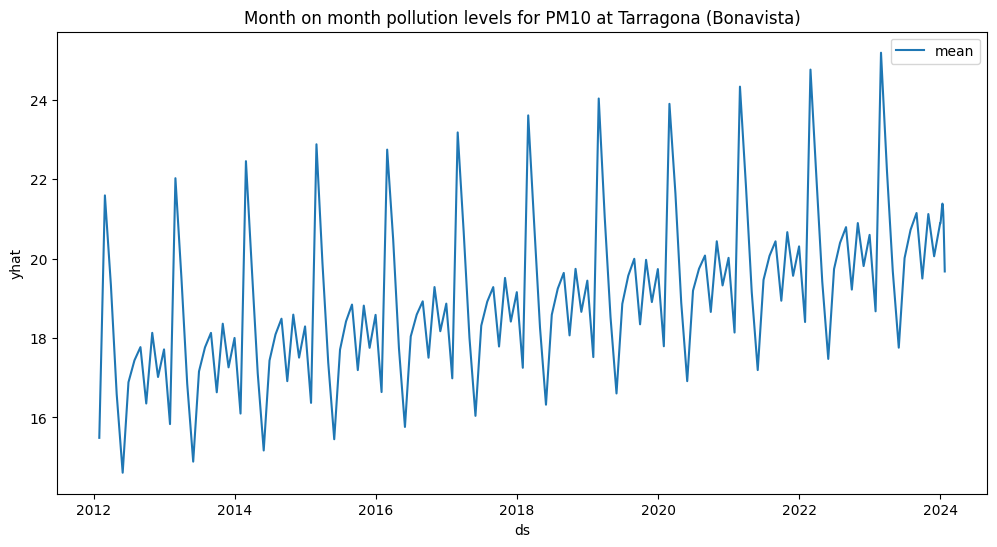

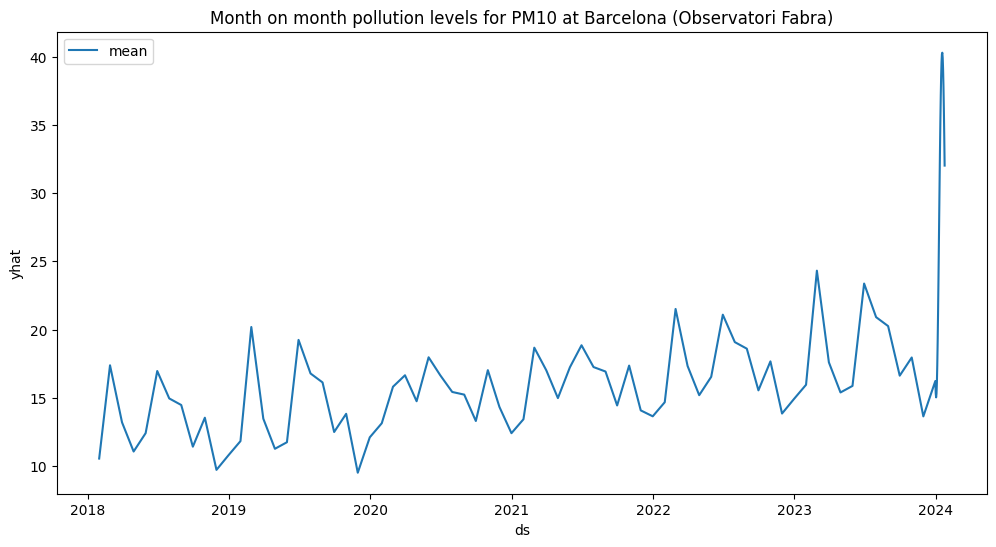

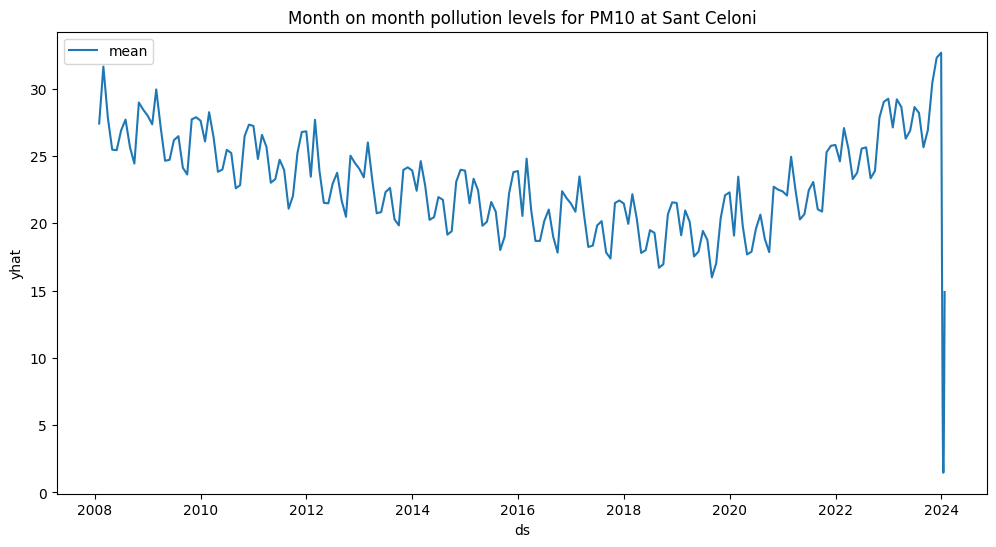

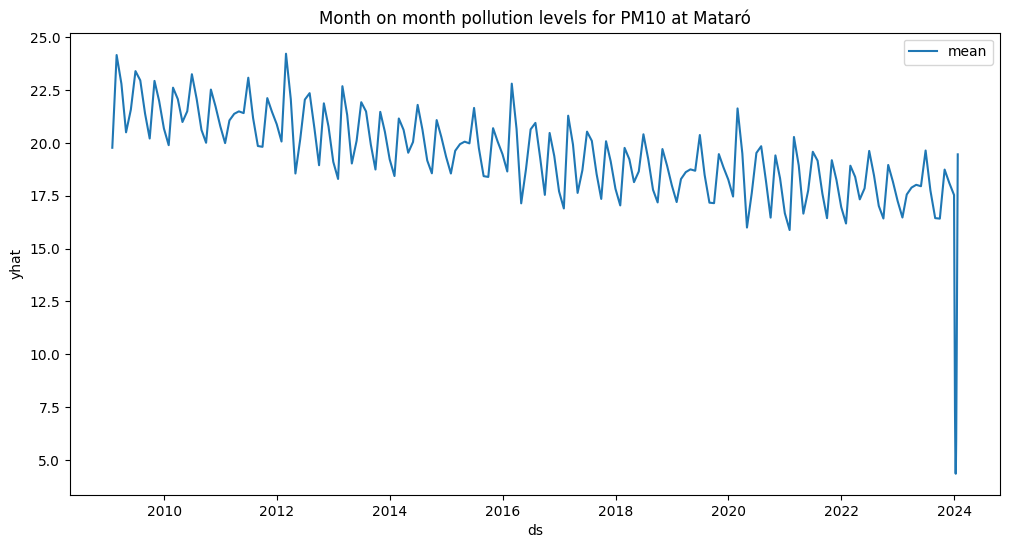

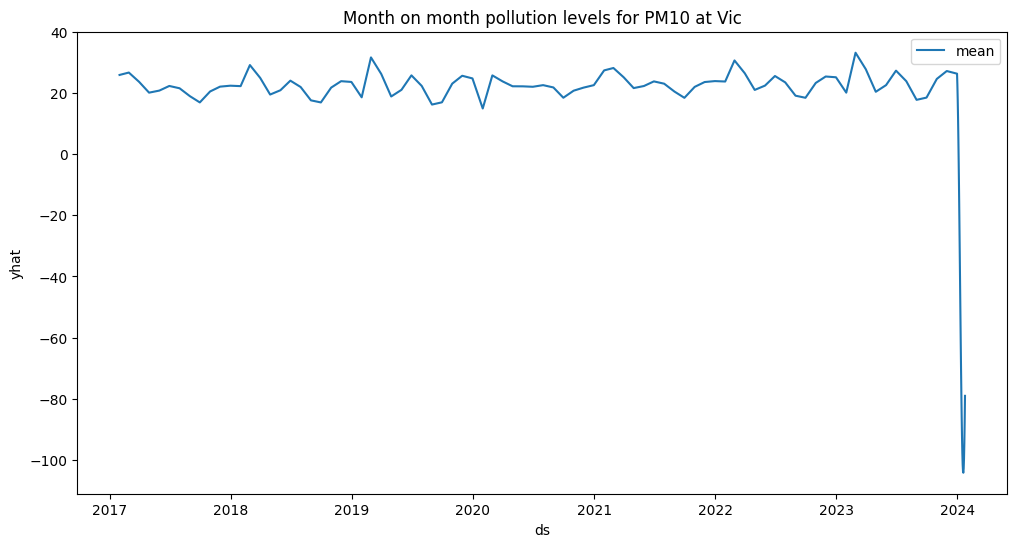

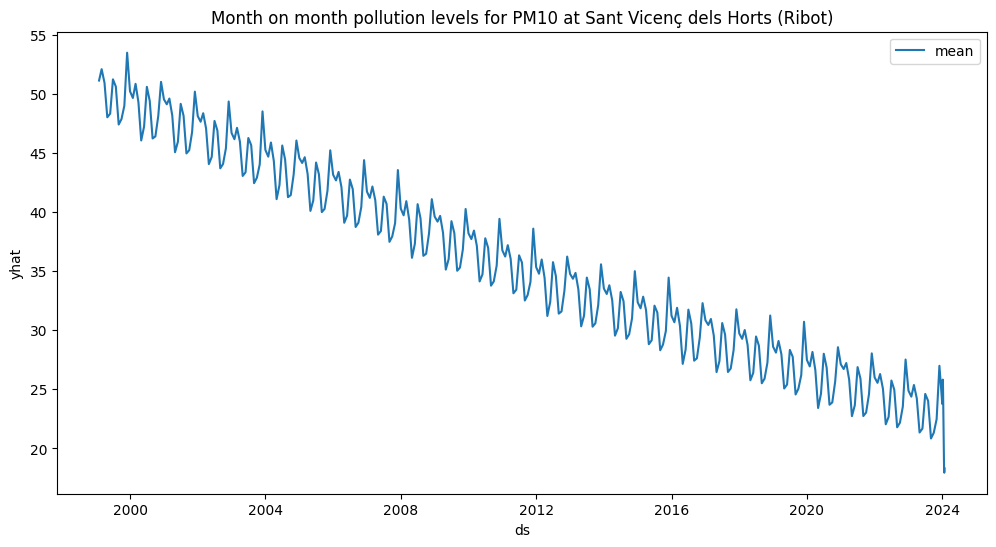

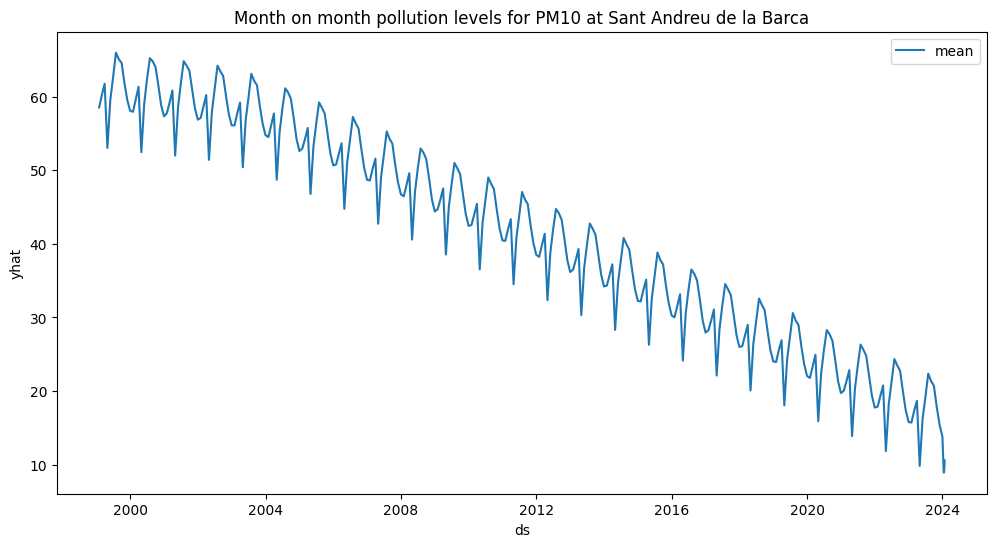

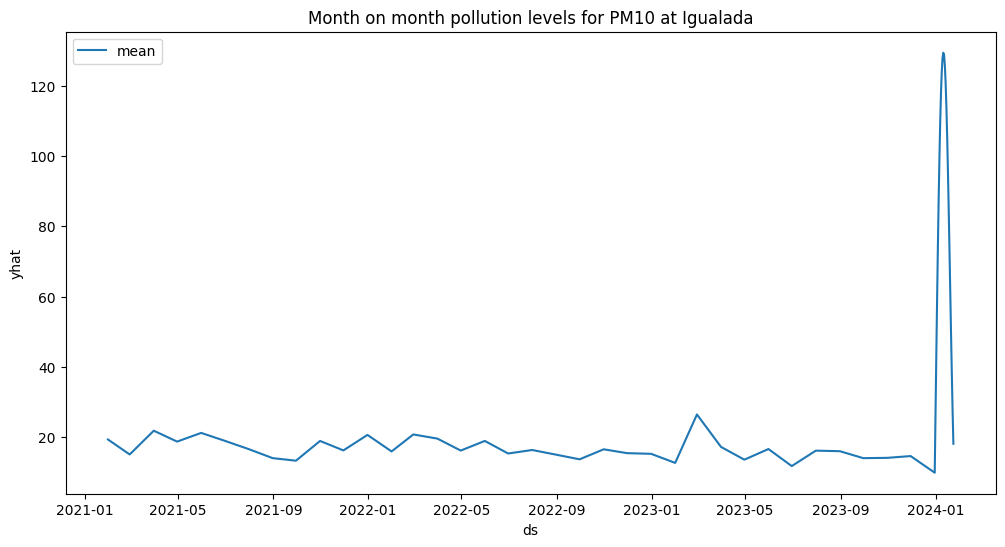

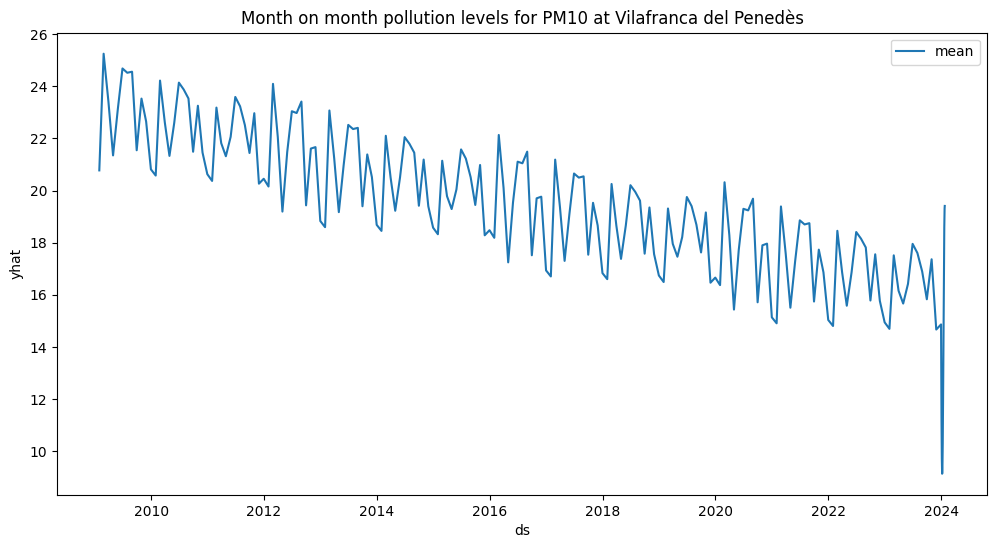

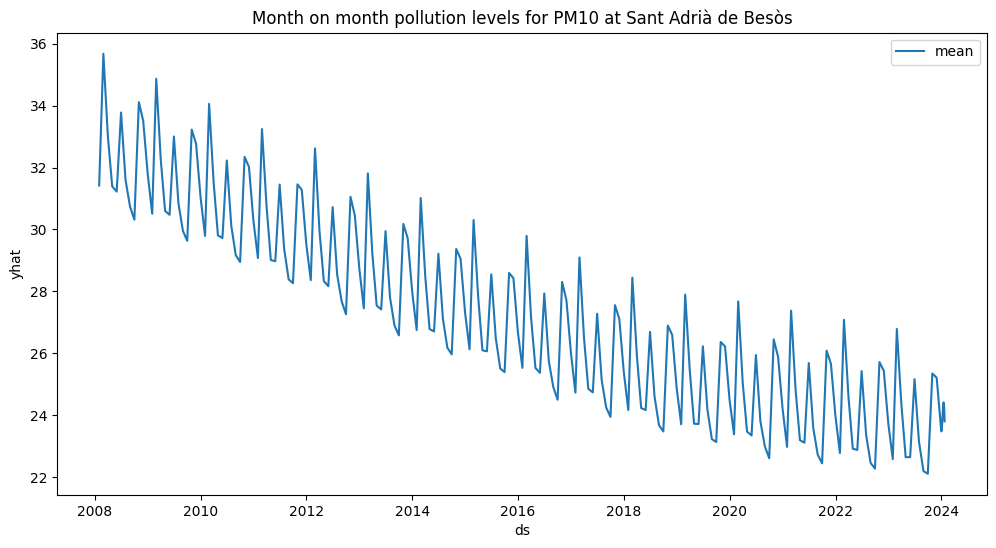

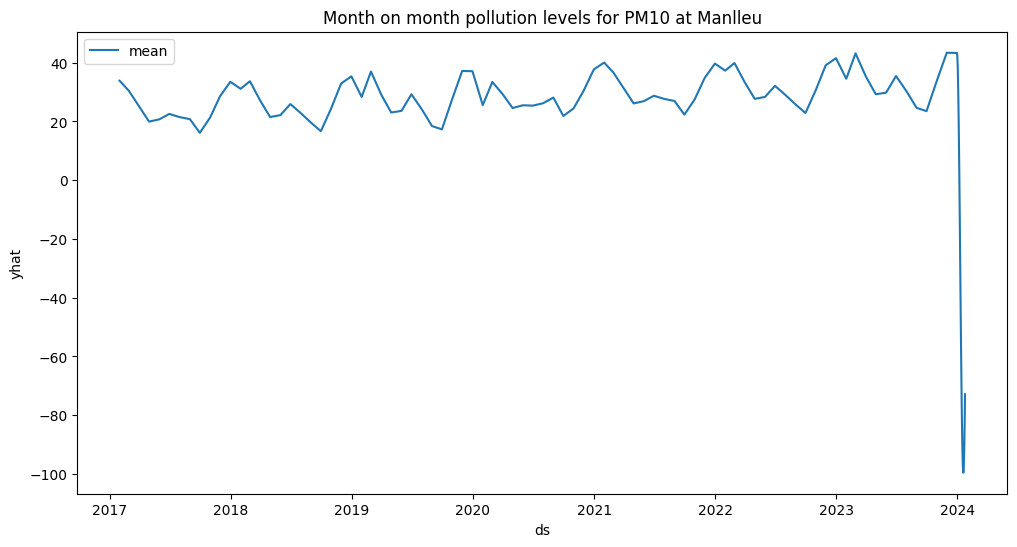

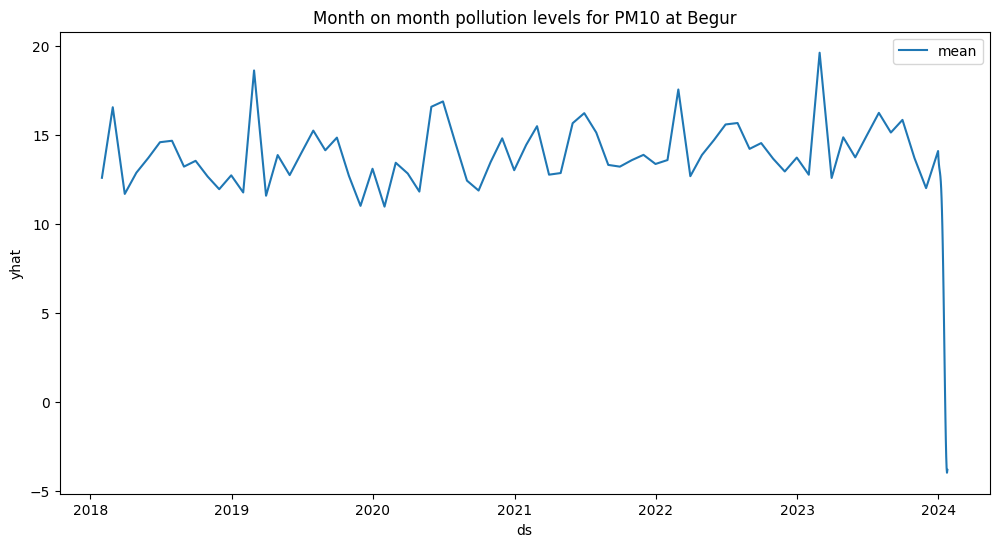

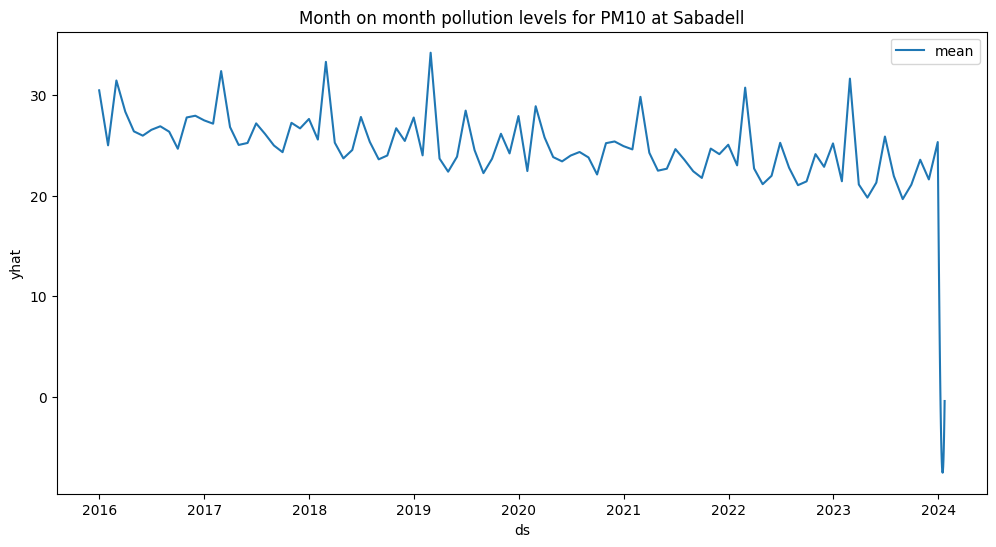

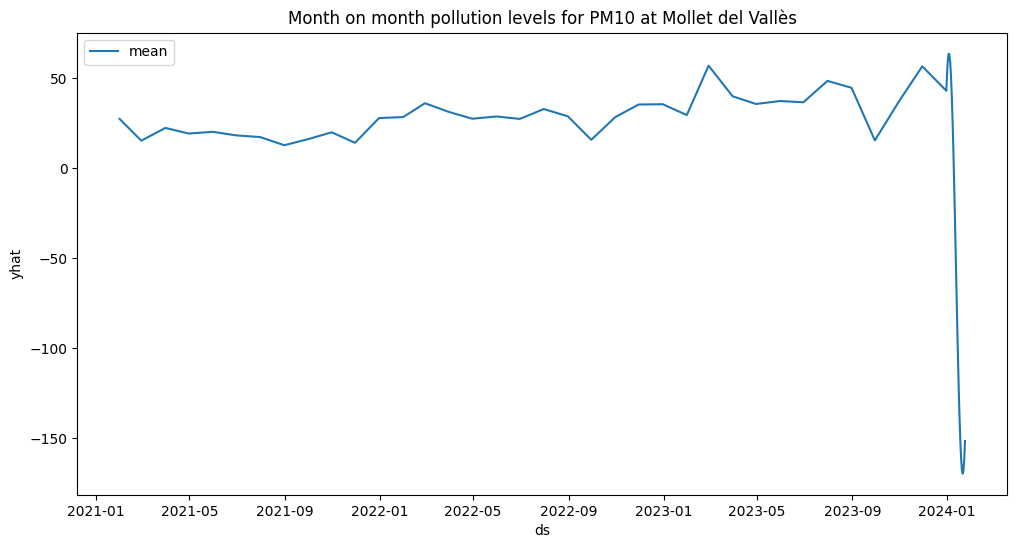

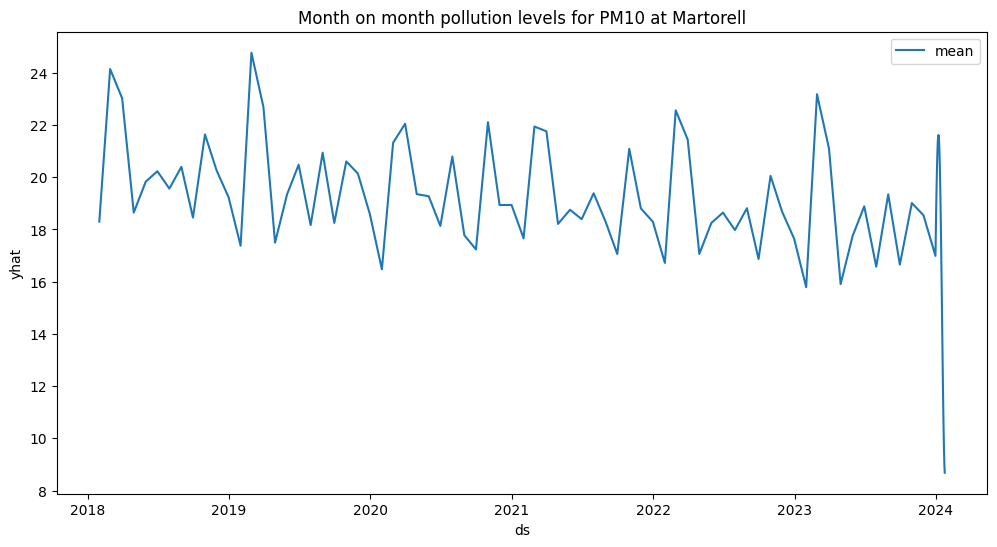

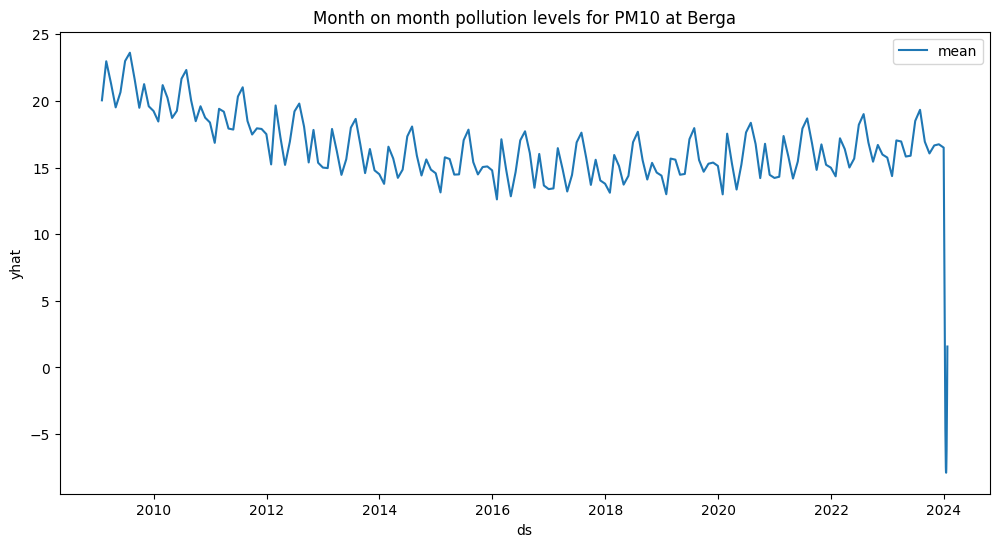

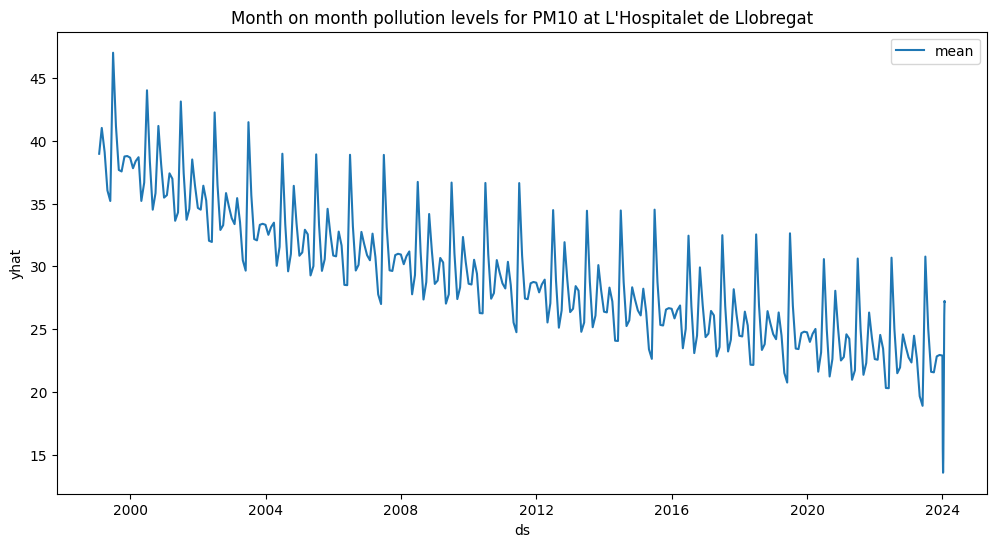

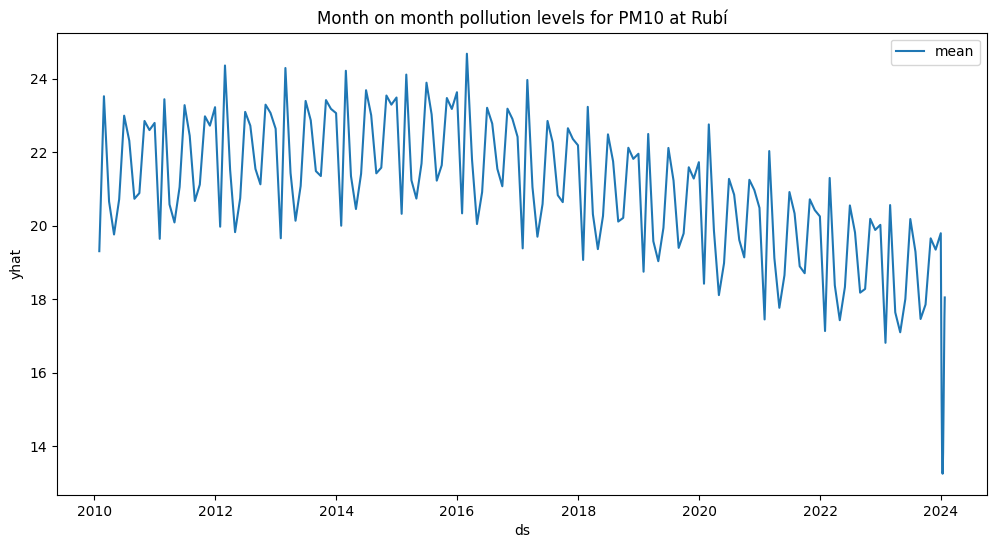

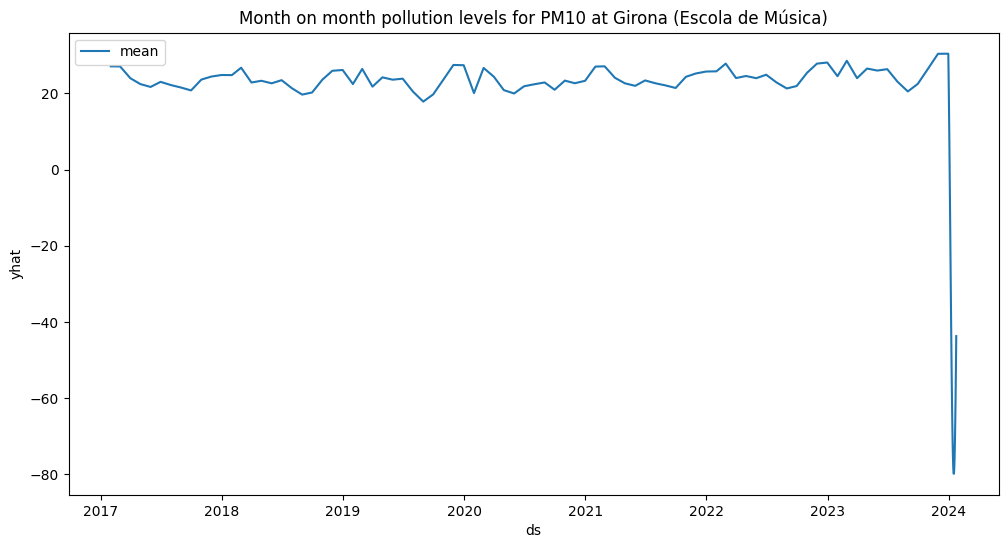

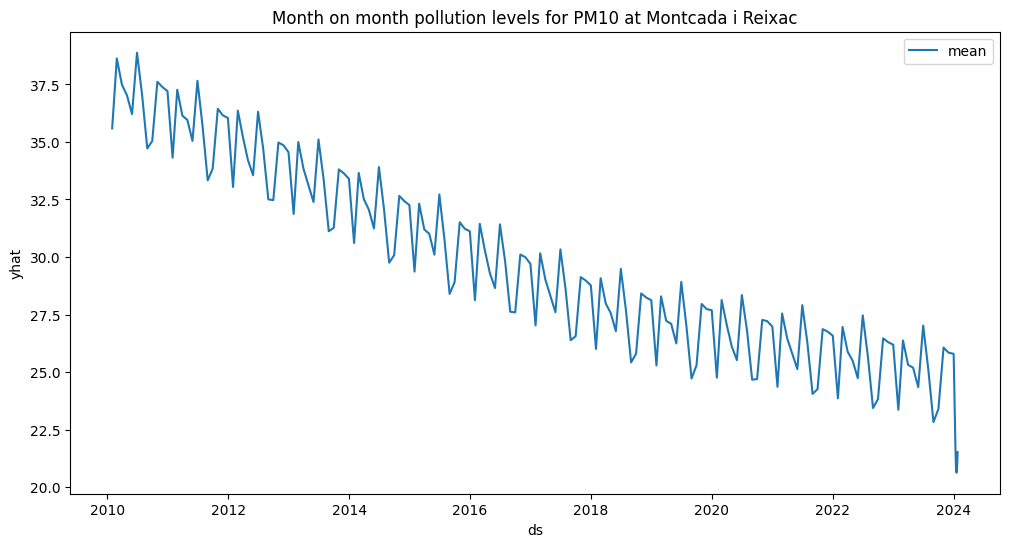

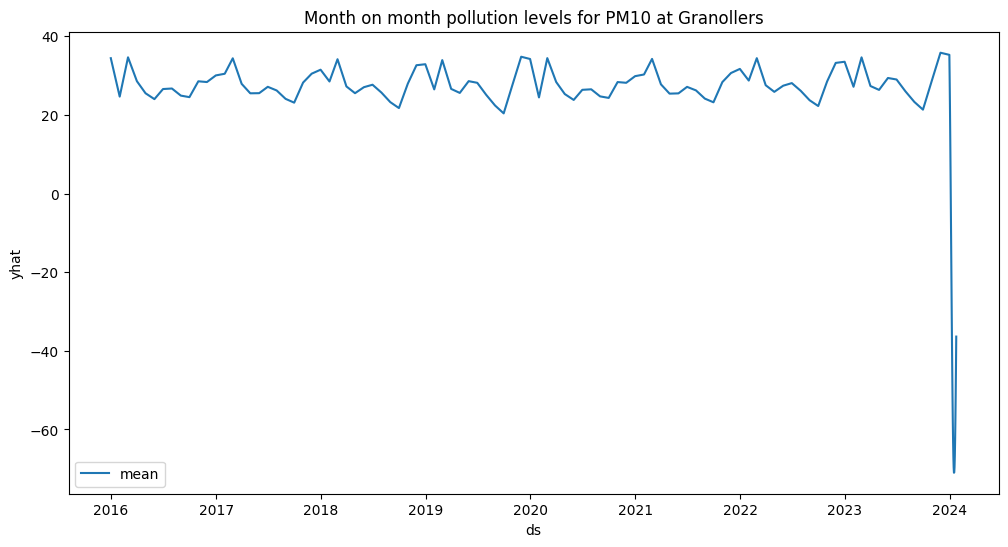

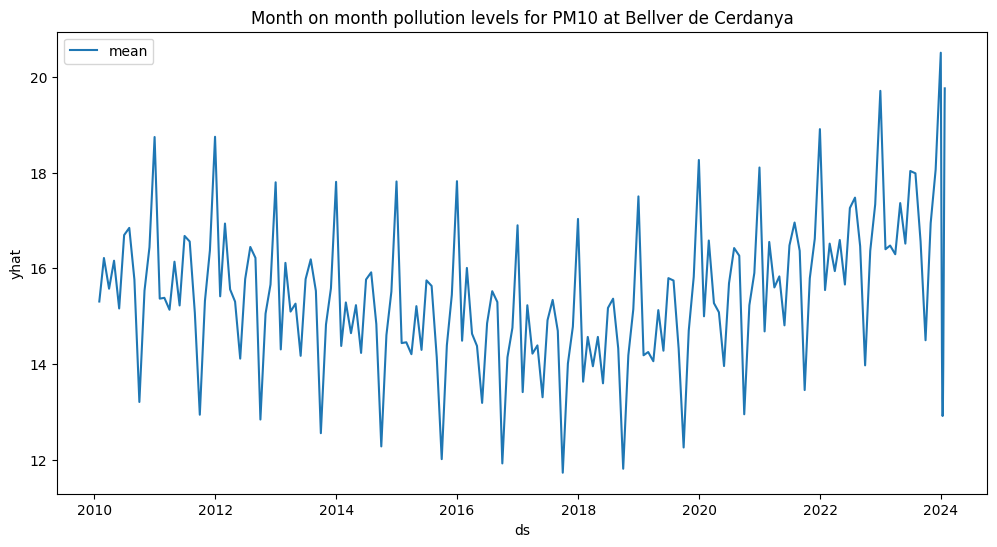

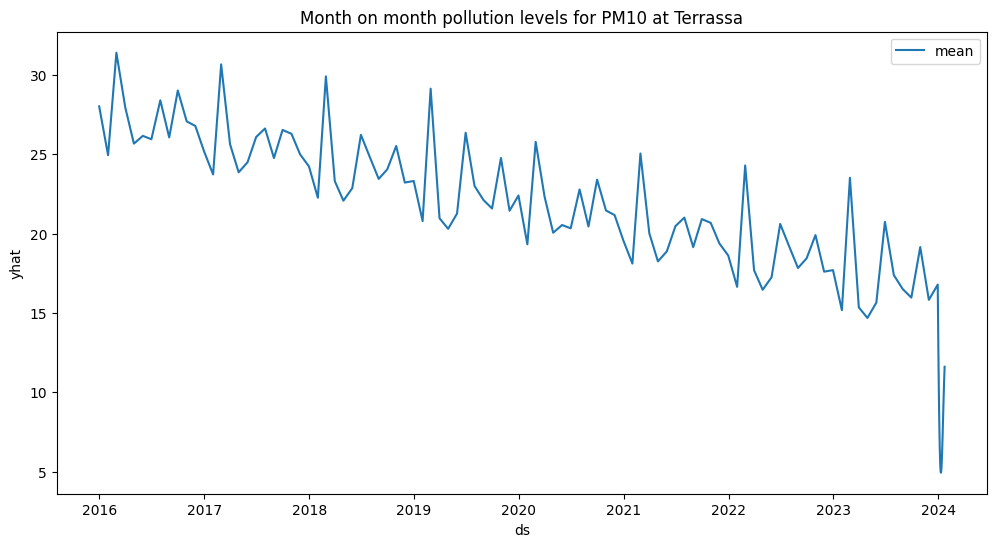

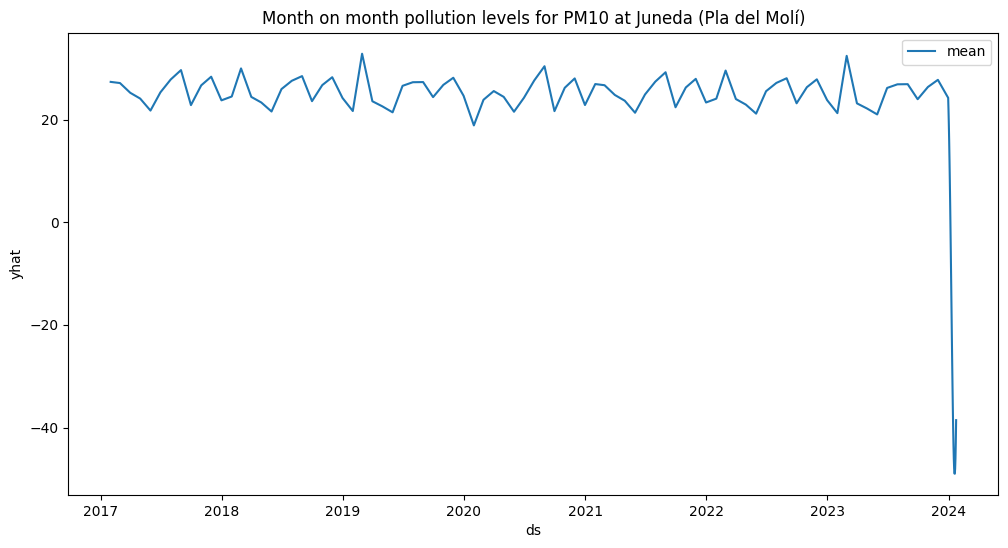

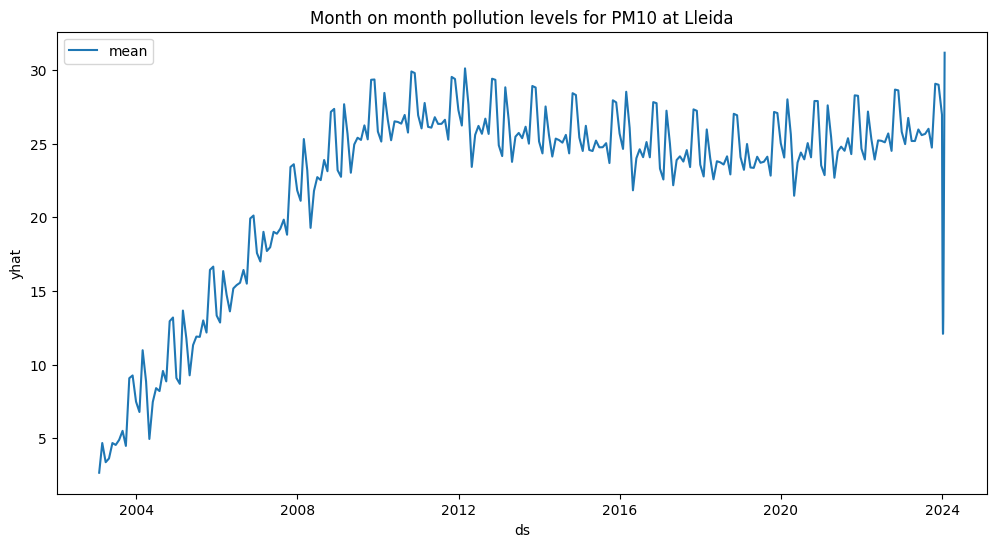

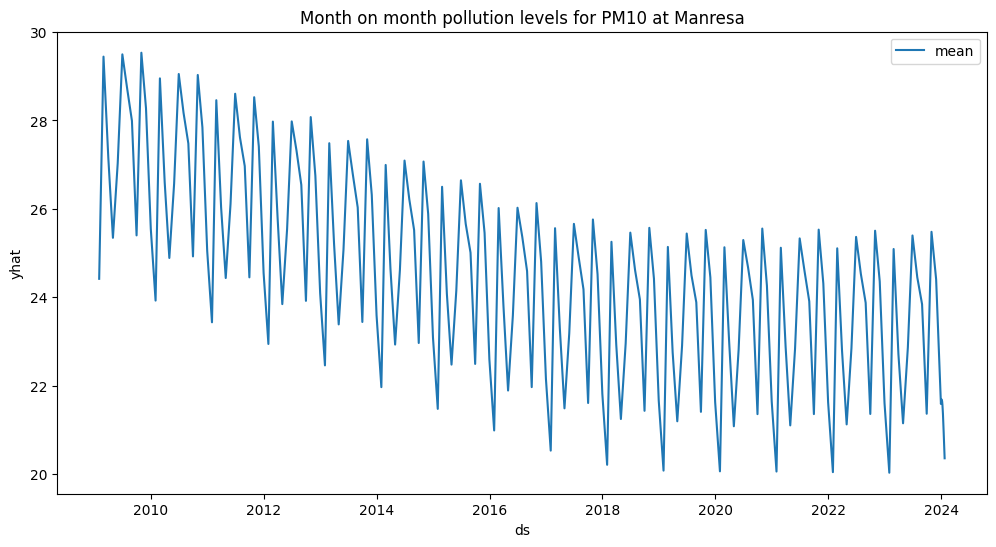

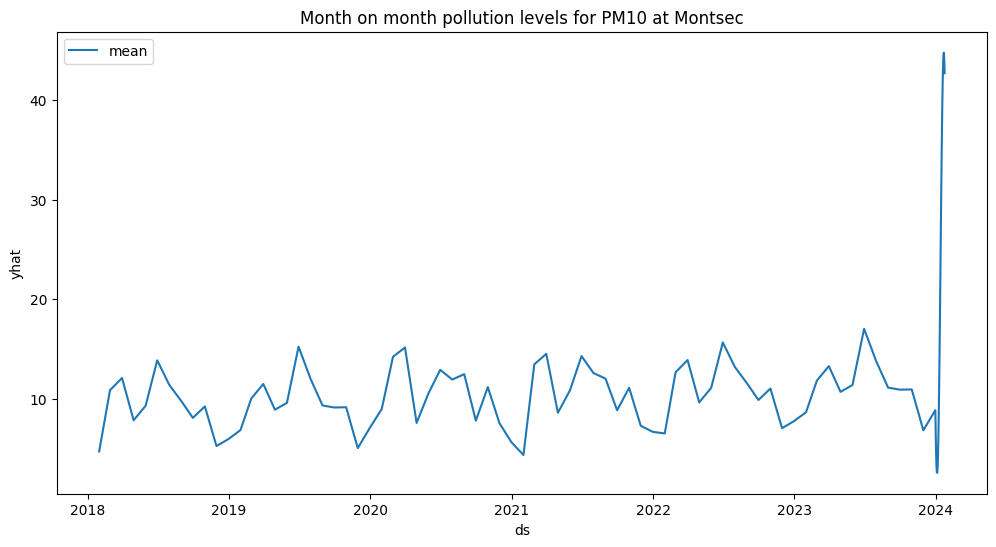

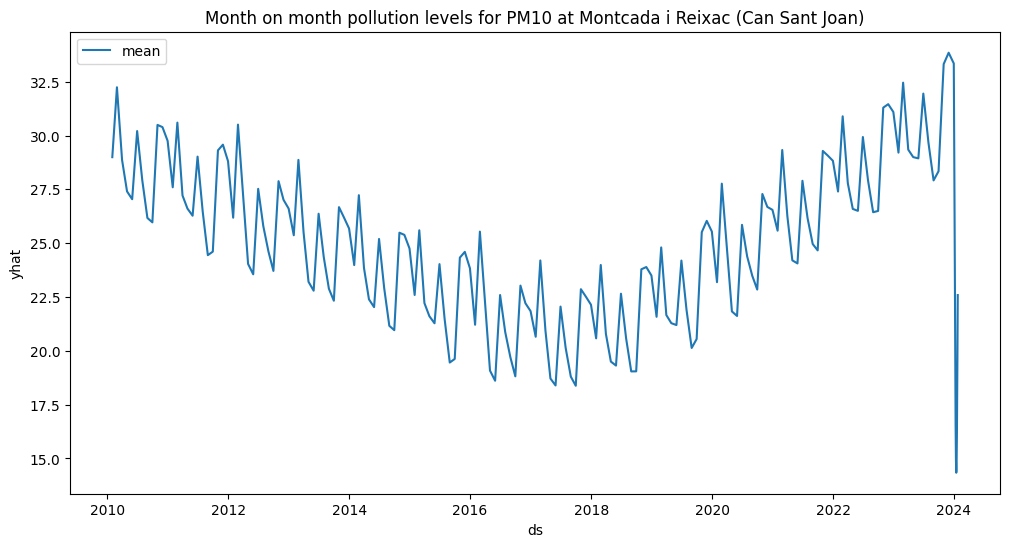

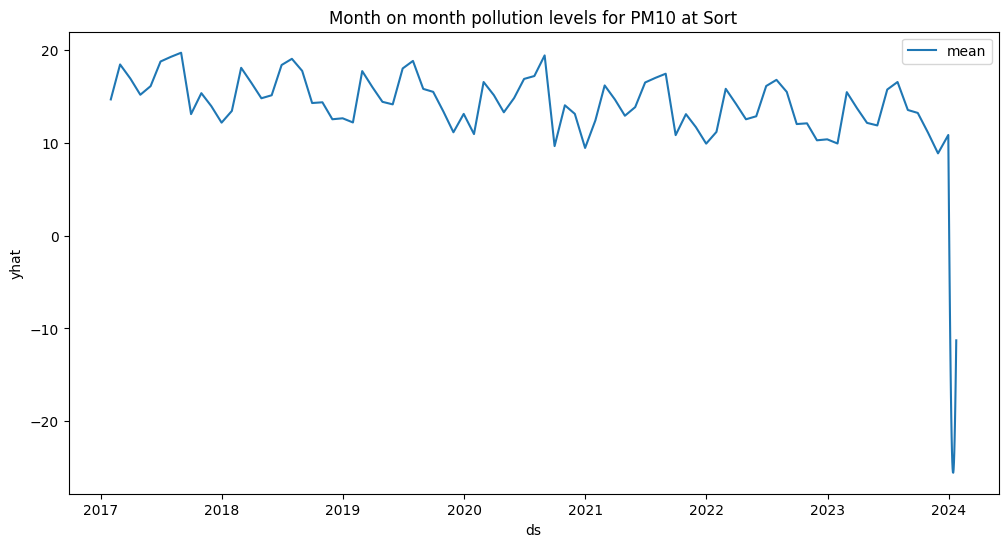

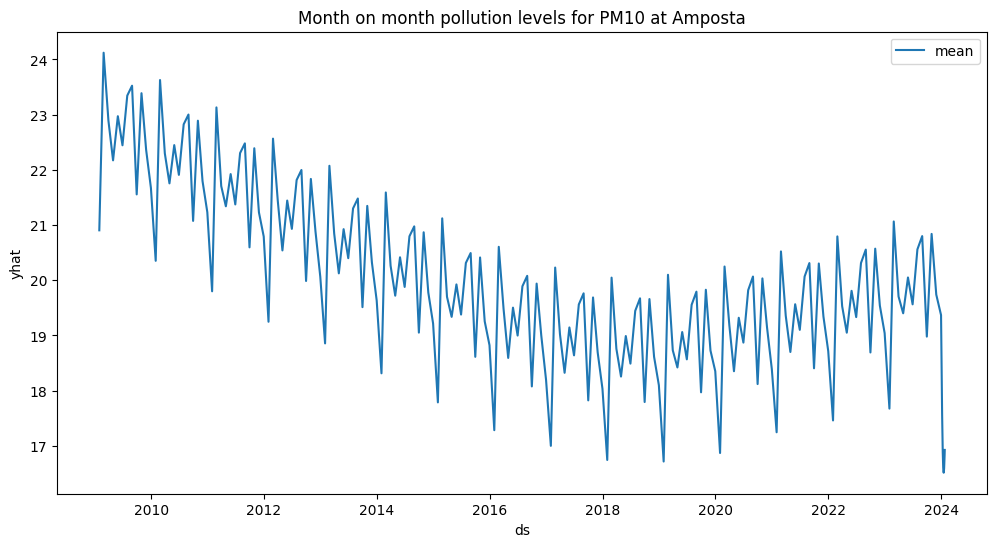

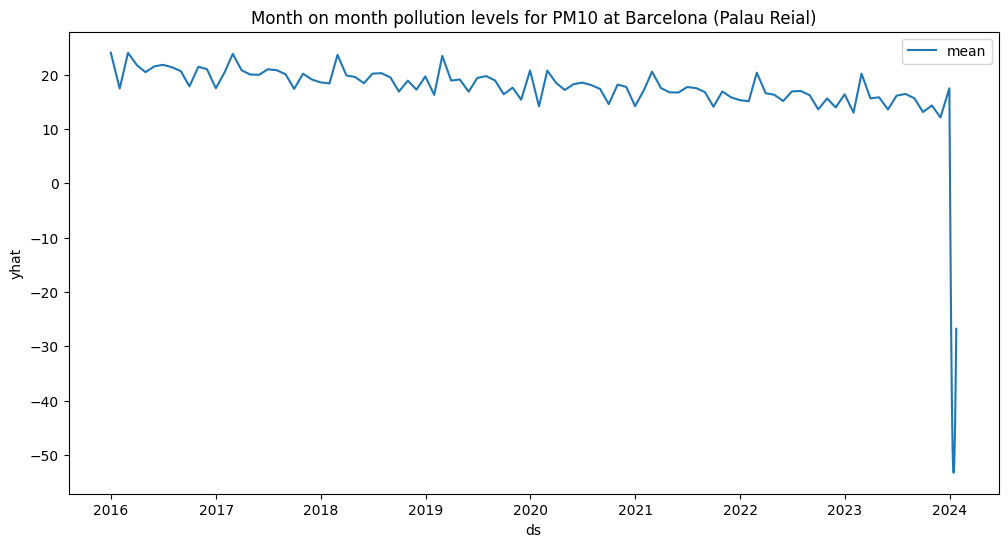

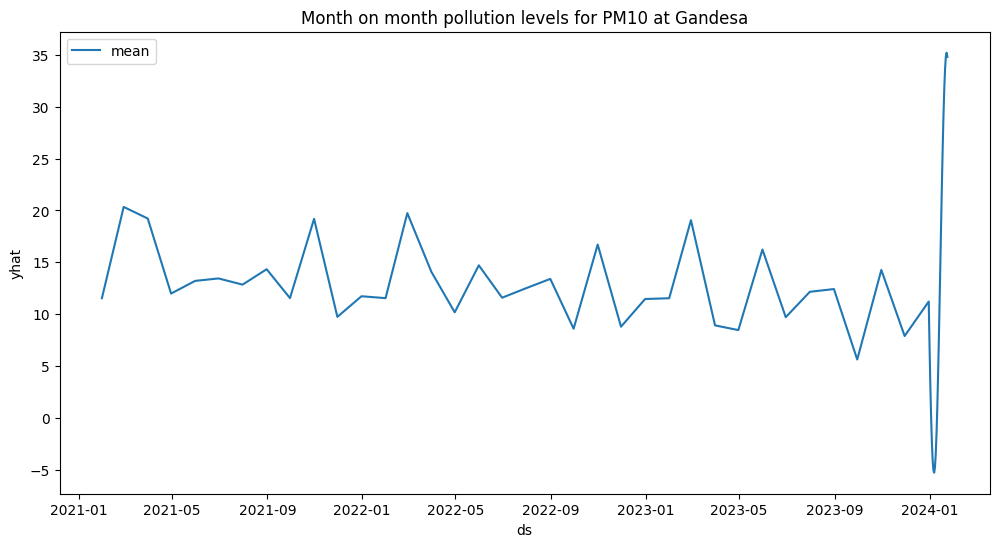

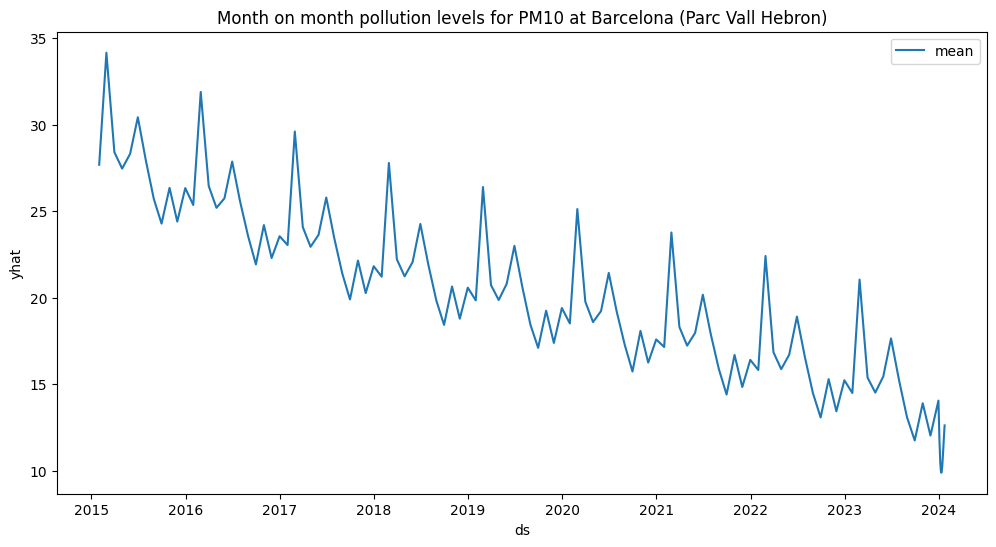

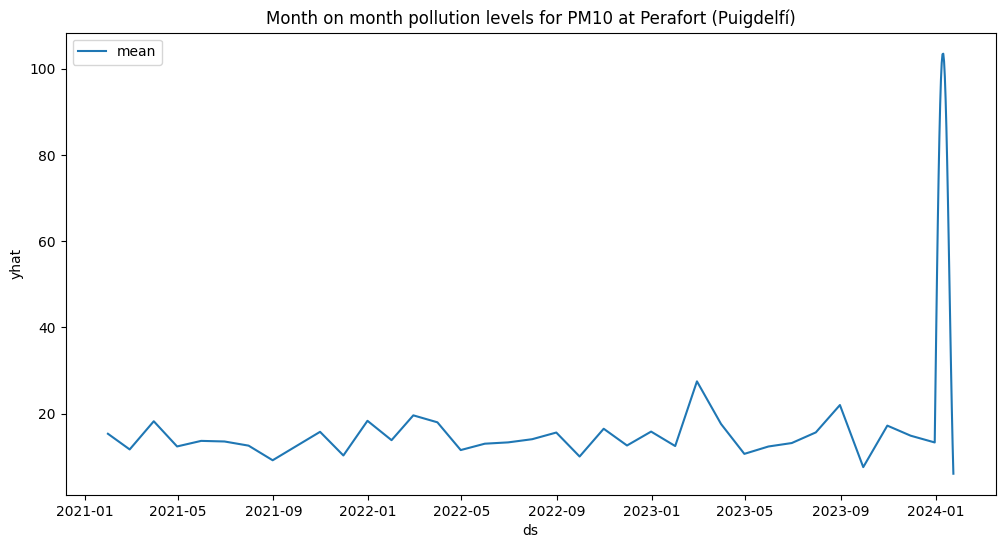

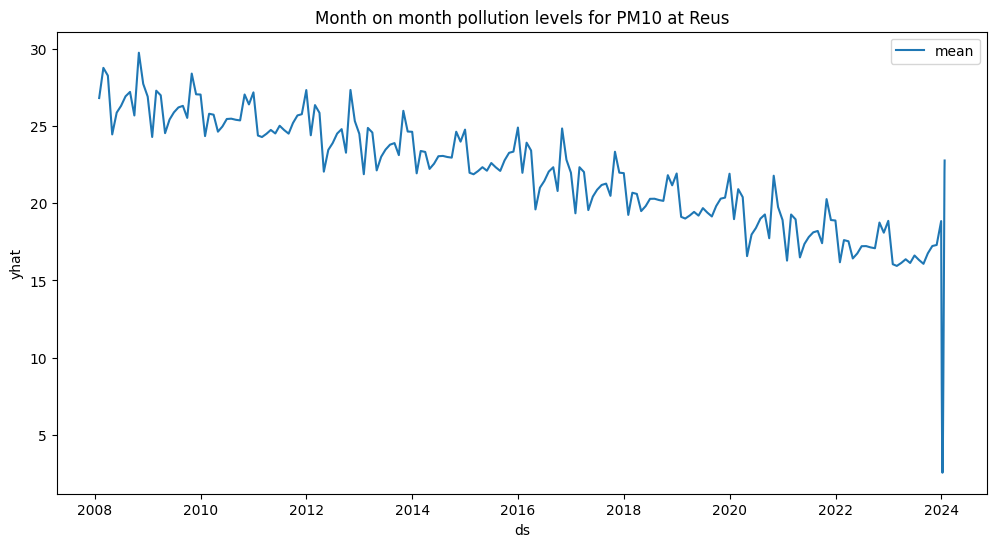

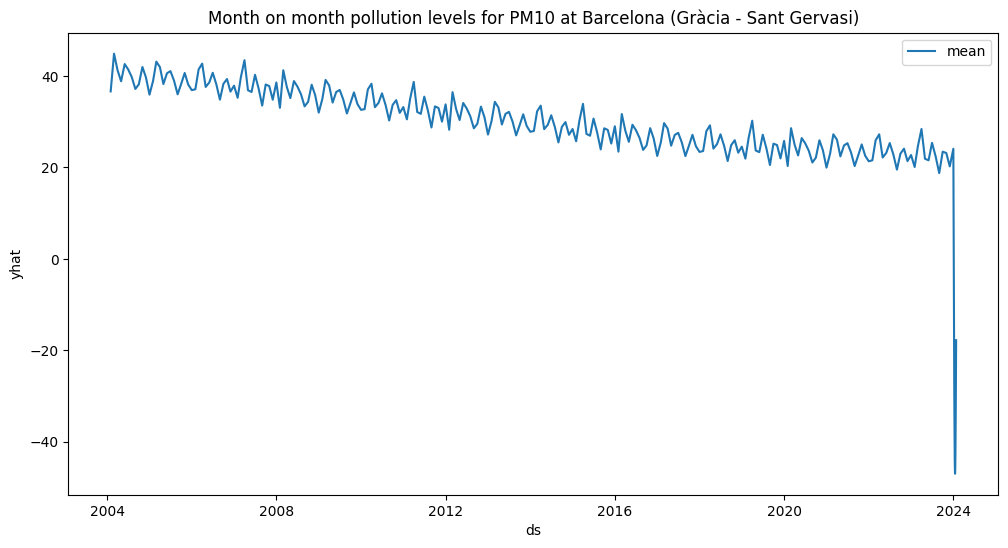

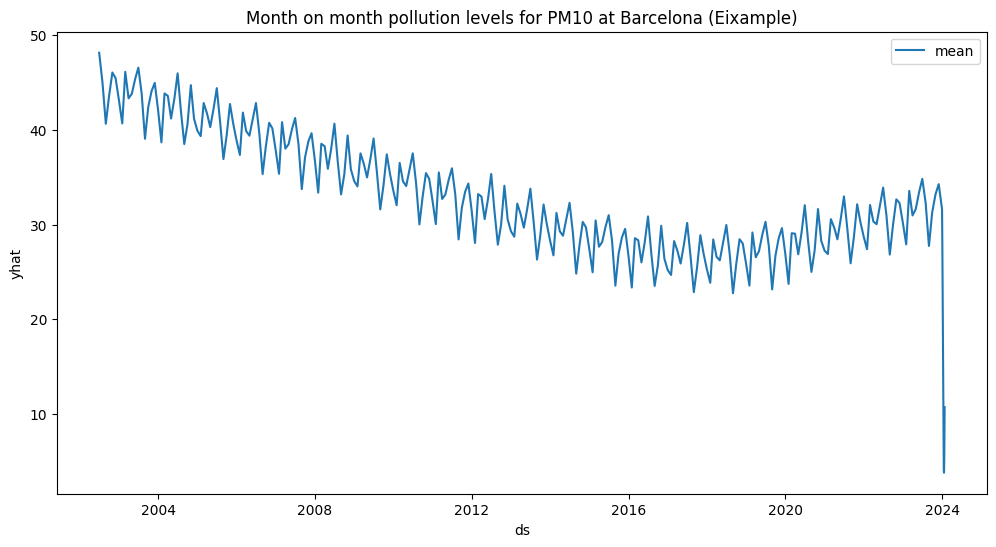

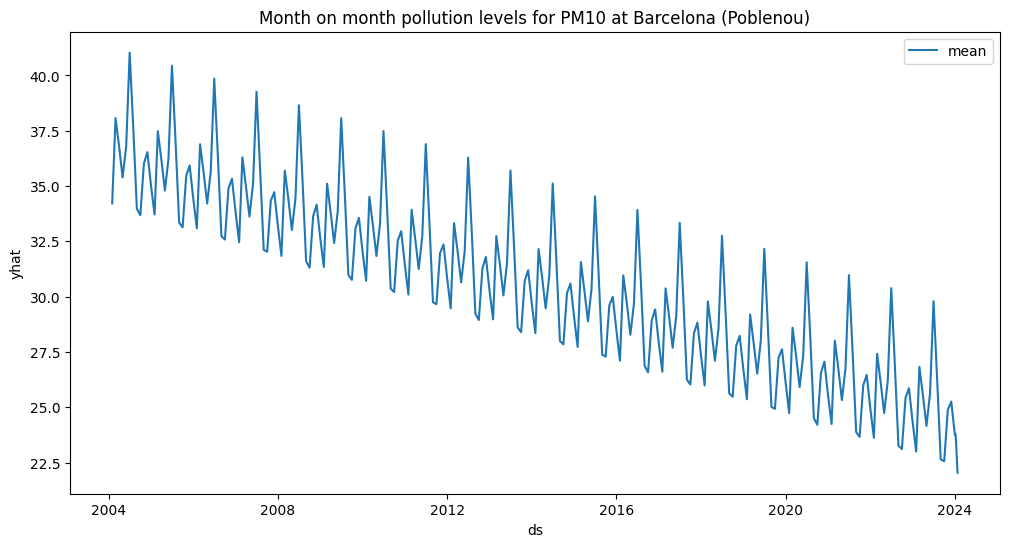

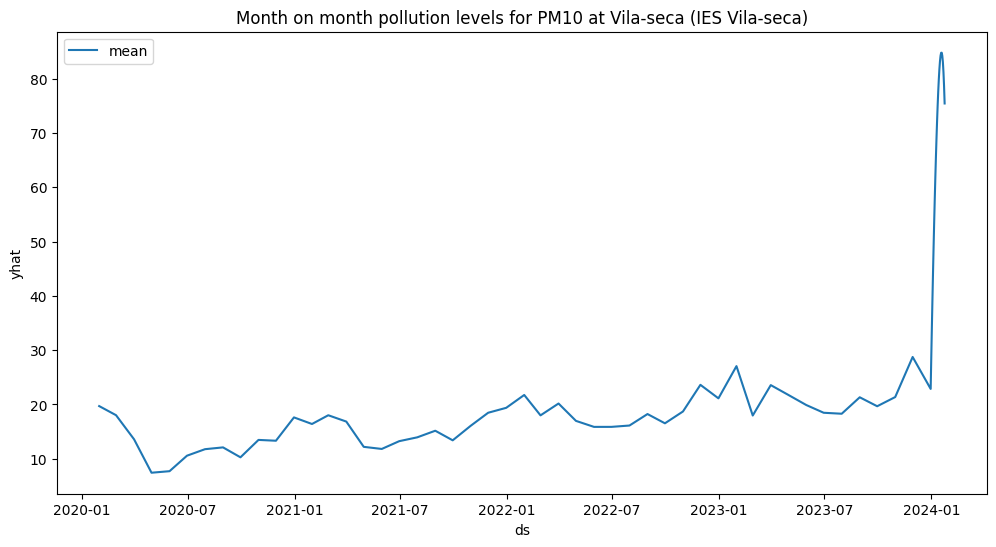

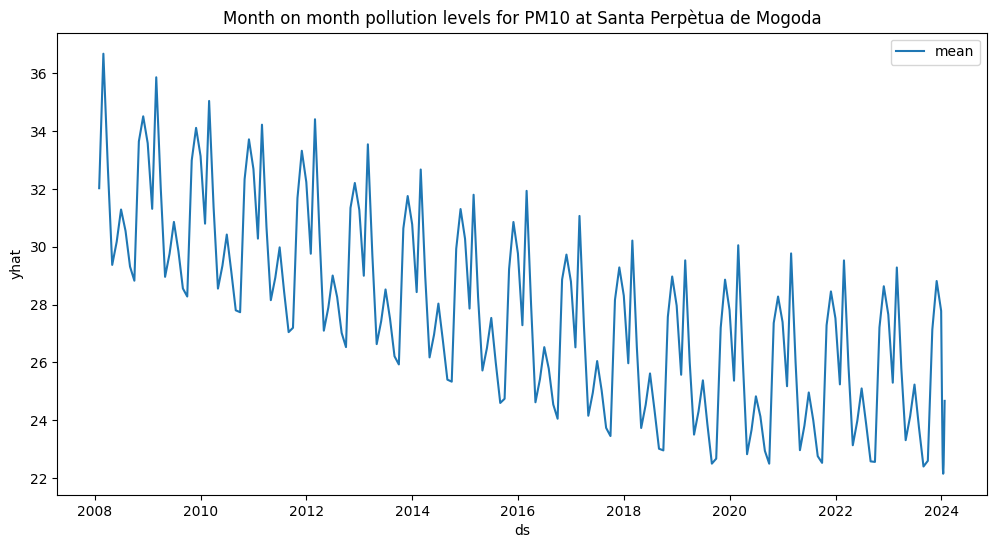

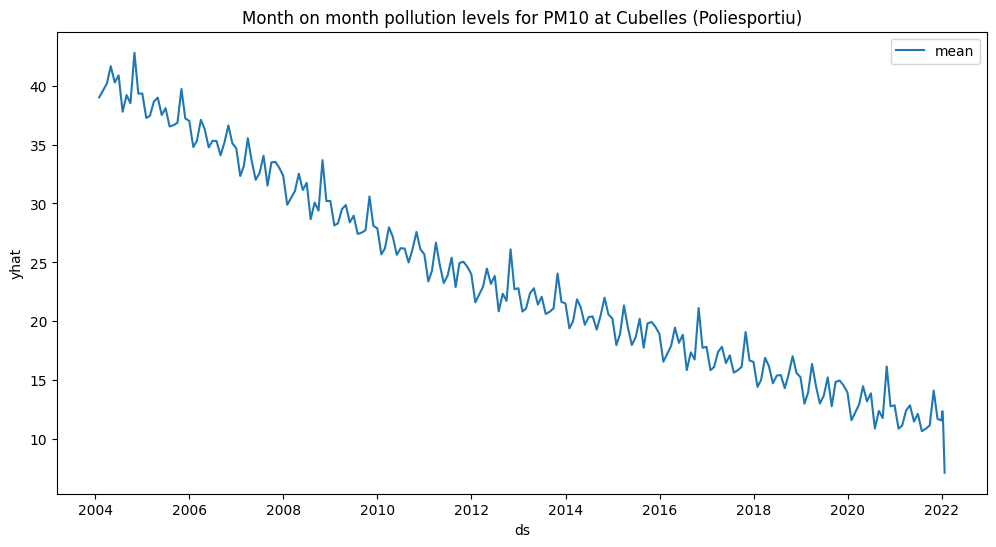

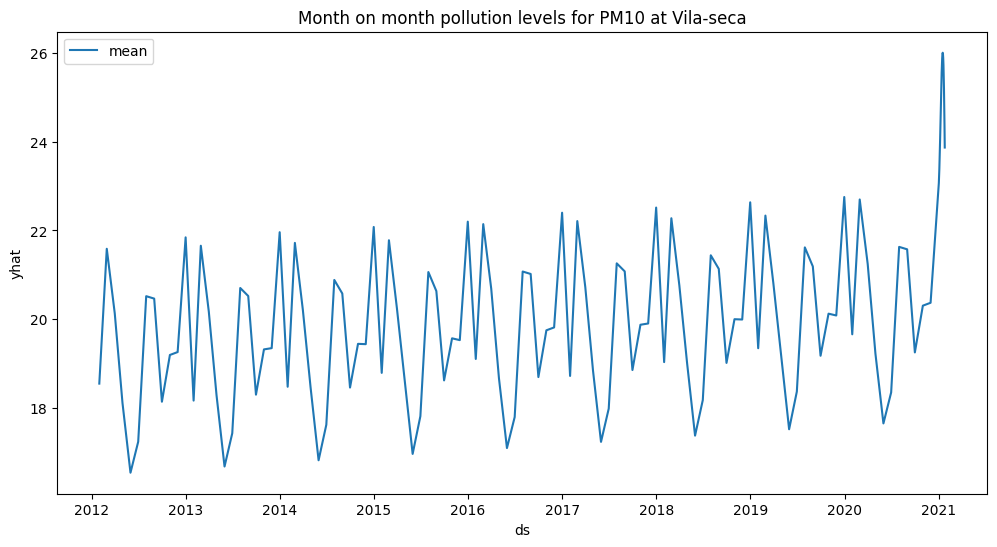

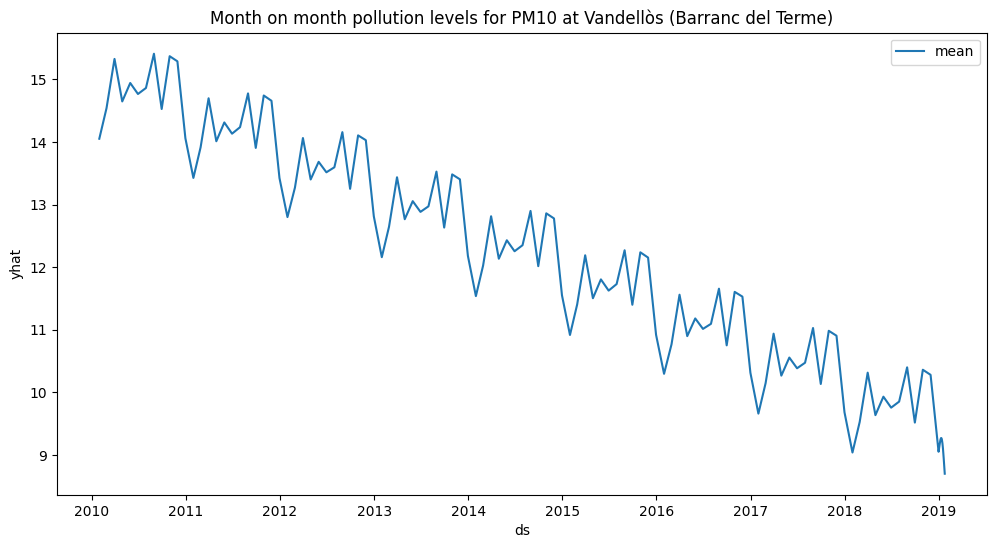

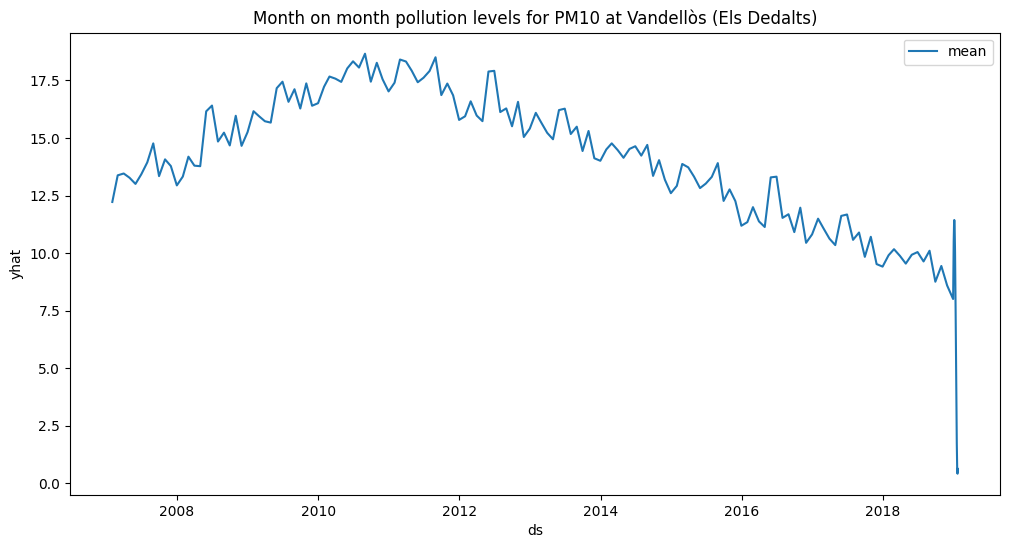

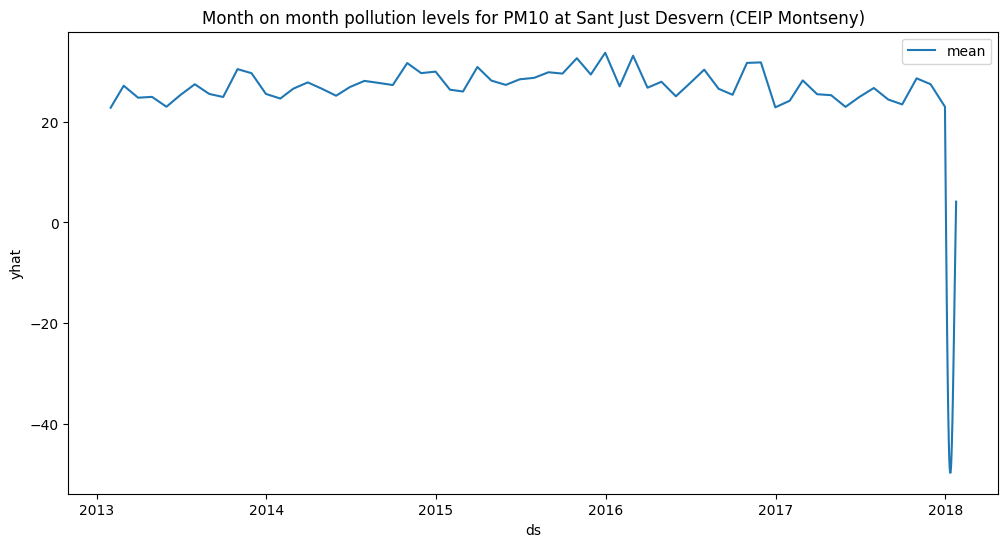

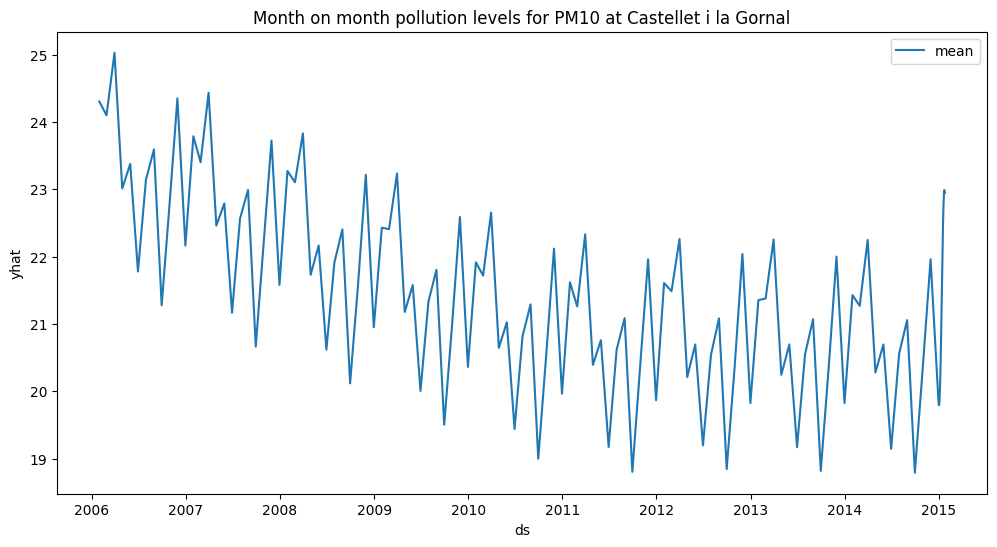

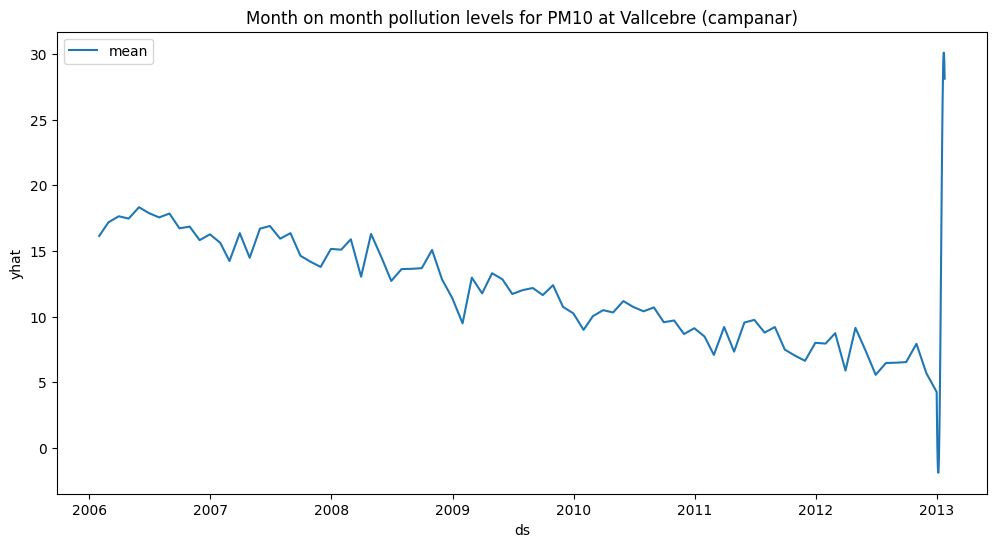

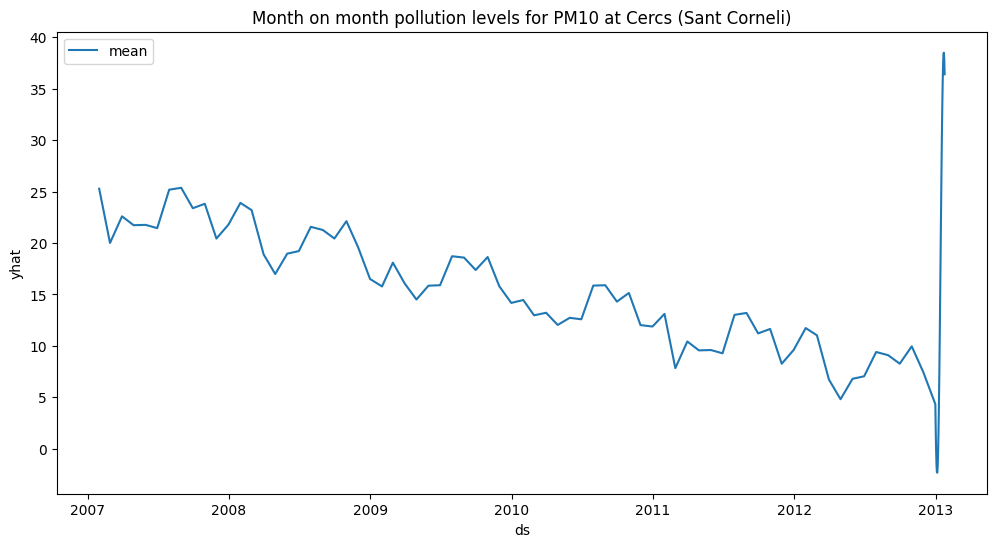

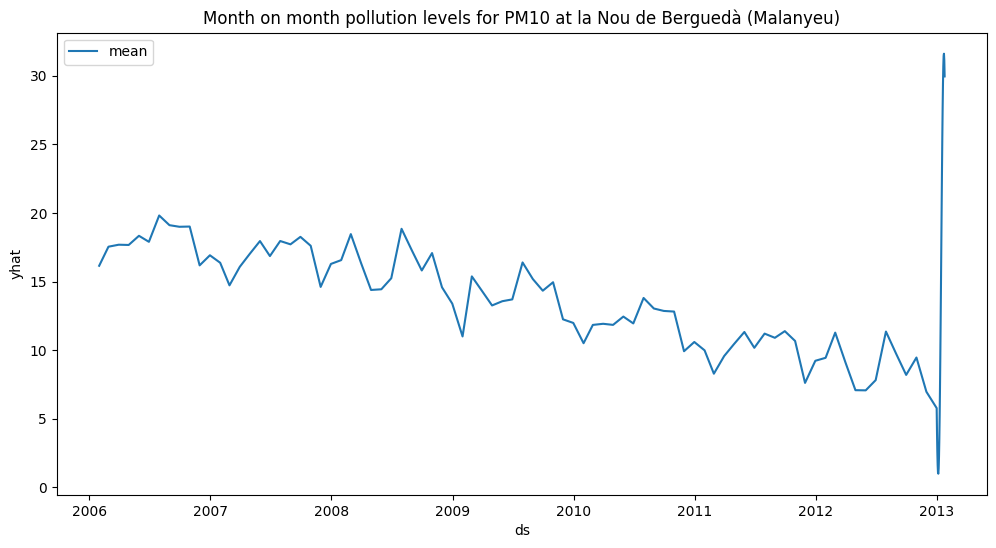

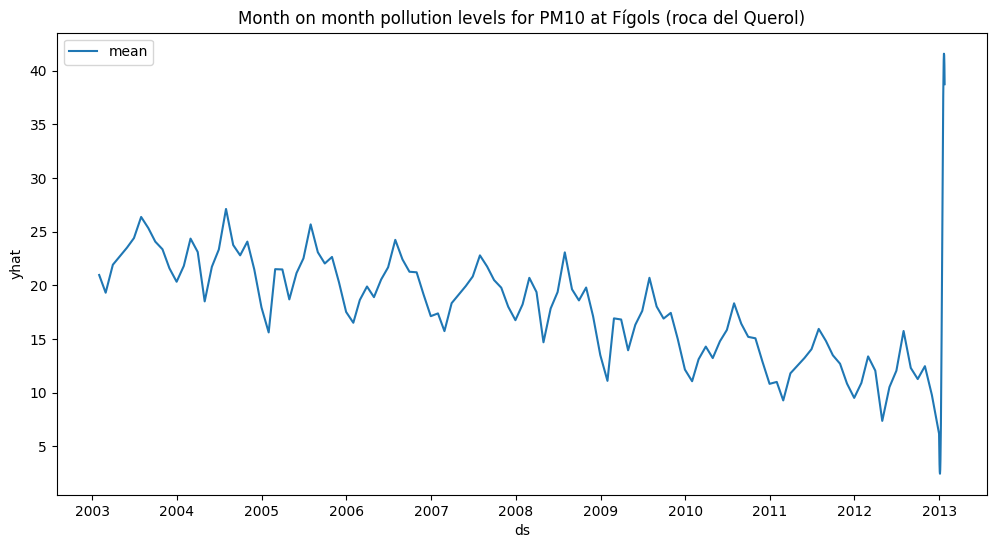

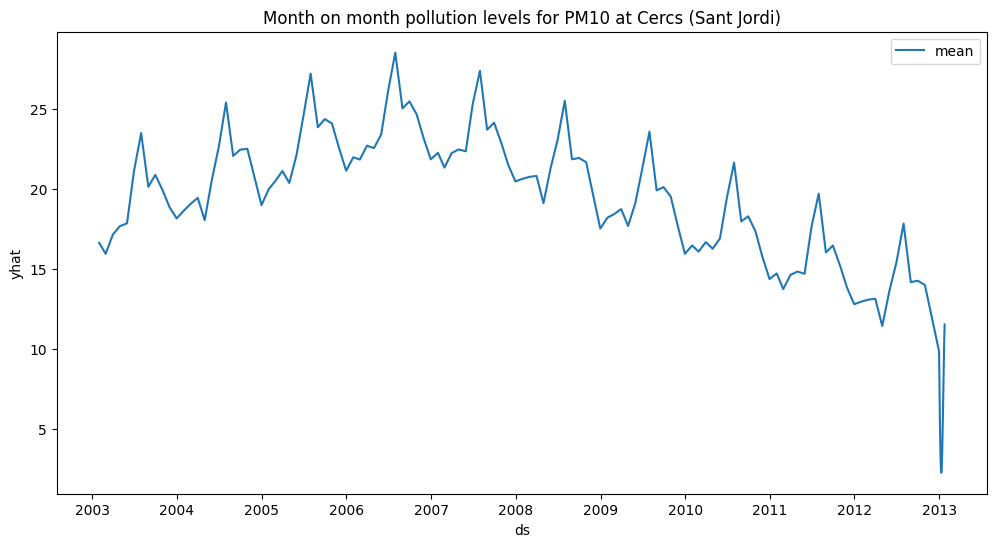

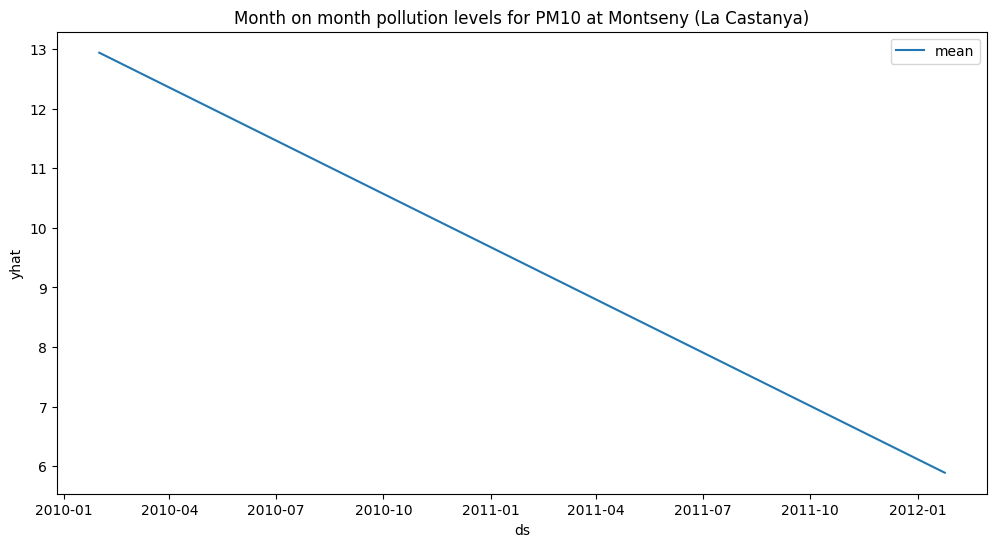

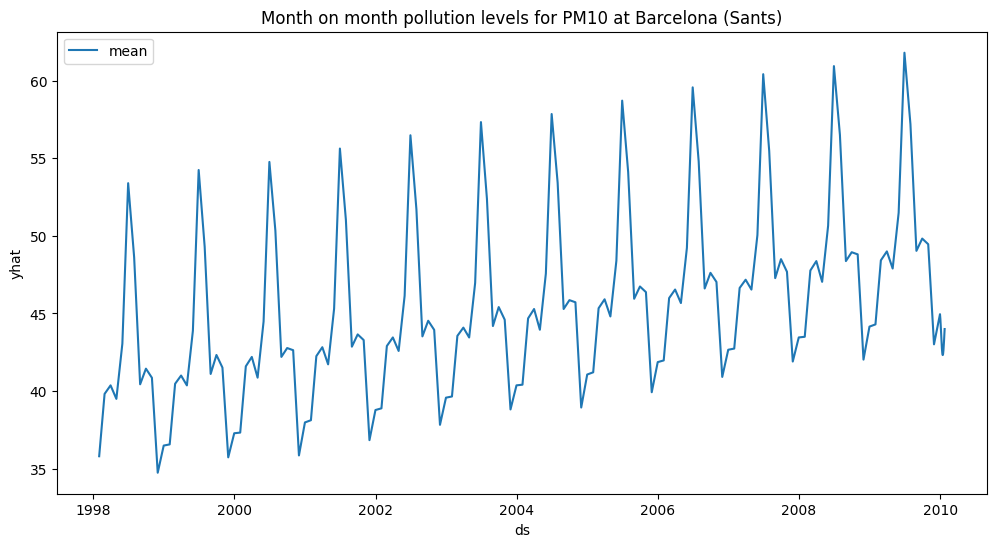

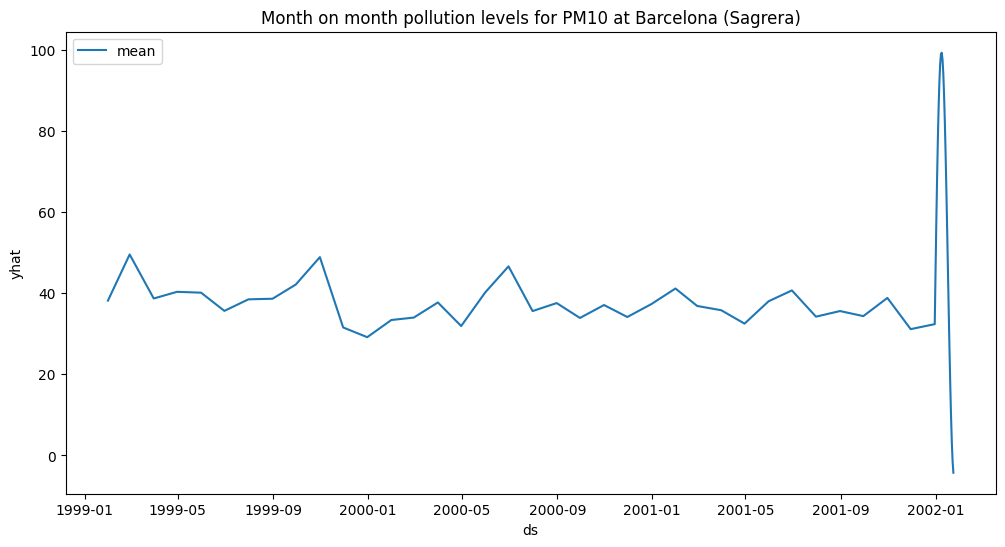

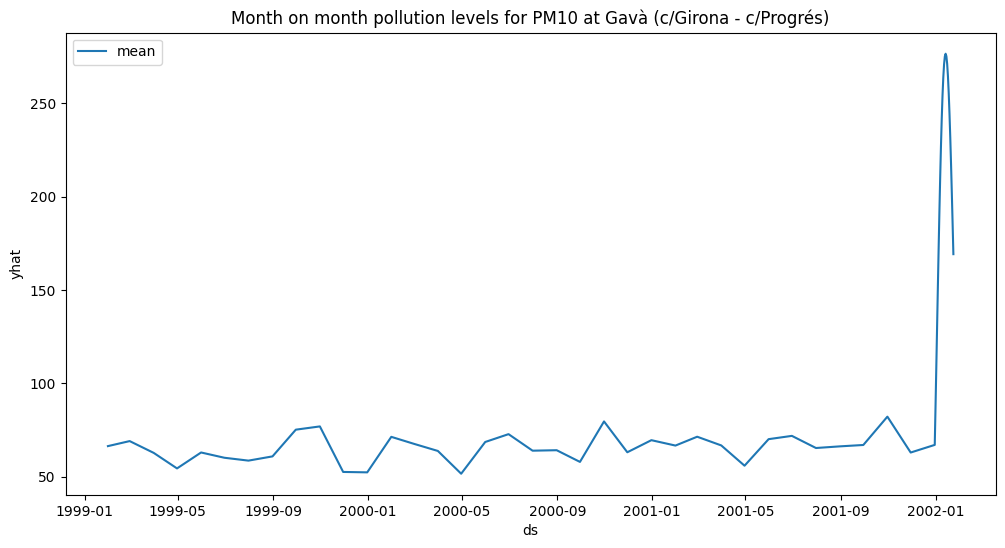

In [106]:
for station in monthly_forecasts.keys():
    cur_df = monthly_forecasts[station].iloc[:]
    fig, ax = plt.subplots(figsize=(12, 6))
#     print(cur_df.head())
    sns.lineplot(data=cur_df, x="ds", y="yhat", label = 'mean', ax=ax)
    title = f"Month on month pollution levels for {chosen_contaminant} at {station}"
#     ax.set_ylabel(f'Pollution amount {c_units[c]}')
    plt.title(title)
    plt.show()

## Prophet results

Prophet's results further corroborate the finding that individual stations do not have the same kind seasonality unlike the yearly observations we've found in global analysis part 1. This was hinted at when I tried plotting the monthly mean PM 10 concentrations for each station.

In [80]:

from datetime import timedelta
conc_col = "concentration"

In [98]:
df.head(10)

CODI EOI              NOM ESTACIO        DATA  MAGNITUD CONTAMINANT  \
0  43148003    Tarragona (Bonavista)  25/01/2023        10        PM10   
1   8137001   Montseny (La Castanya)  25/01/2023        12         NOX   
2   8124009        Mollet del Vallès  25/01/2023         7          NO   
3   8114006                Martorell  25/01/2023         7          NO   
4   8112003                  Manlleu  25/01/2023         8         NO2   
5   8102005                 Igualada  25/01/2023         8         NO2   
6   8096014               Granollers  25/01/2023        12         NOX   
7   8089005                     Gavà  25/01/2023         1         SO2   
8  43047001                Constantí  25/01/2023        12         NOX   
9   8196001  Sant Andreu de la Barca  25/01/2023        12         NOX   

  UNITATS TIPUS ESTACIO AREA URBANA  CODI INE                 MUNICIPI  \
0   µg/m3    industrial    suburban     43148                Tarragona   
1   µg/m3    background       rural      8137                 Montseny   
2   µg/m3       traffic    suburban      8124        Mollet del Vallès   
3   µg/m3    background    suburban      8114                Martorell   
4   µg/m3    background    suburban      8112                  Manlleu   
5   µg/m3    industrial    suburban      8102                 Igualada   
6   µg/m3       traffic       urban      8096               Granollers   
7   µg/m3    background    suburban      8089                     Gavà   
8   µg/m3    industrial    suburban     43047                Constantí   
9   µg/m3       traffic    suburban      8196  Sant Andreu de la Barca   

   CODI COMARCA      NOM COMARCA    01h    02h   03h   04h   05h   06h   07h  \
0            36       Tarragonès   11.0    9.0  12.0  12.0  11.0  12.0  15.0   
1            41  Vallès Oriental    2.0    2.0   2.0   2.0   2.0   2.0   2.0   
2            41  Vallès Oriental   49.0   32.0  59.0  43.0  25.0  33.0  98.0   
3            11   Baix Llobregat    9.0    7.0   3.0   2.0   1.0   2.0   2.0   
4            24            Osona   24.0   23.0  24.0  21.0  21.0  29.0  25.0   
5             6            Anoia   11.0    9.0   8.0   8.0   8.0  10.0  10.0   
6            41  Vallès Oriental  161.0  120.0  76.0  52.0  10.0  34.0  52.0   
7            11   Baix Llobregat    3.0    3.0   3.0   3.0   3.0   3.0   4.0   
8            36       Tarragonès    7.0    7.0  10.0  25.0  11.0  18.0  13.0   
9            11   Baix Llobregat   59.0   43.0  38.0  38.0  19.0  26.0  21.0   

     08h    09h    10h    11h    12h   13h   14h   15h   16h   17h   18h  \
0   18.0   19.0   24.0   22.0   22.0  28.0  24.0  17.0  22.0  18.0  24.0   
1    1.0    1.0    2.0    2.0    1.0   NaN   NaN   NaN   3.0  14.0   9.0   
2  123.0   58.0    NaN    NaN   20.0  12.0  11.0   5.0   4.0   9.0  26.0   
3    3.0    5.0    9.0   11.0   12.0  11.0  12.0   6.0   6.0   5.0   2.0   
4   26.0   28.0   34.0   24.0   37.0  33.0  26.0  14.0  17.0  21.0  22.0   
5   17.0   25.0   30.0   22.0   13.0  12.0  13.0  11.0  13.0  15.0  21.0   
6   89.0  317.0  261.0  170.0  119.0  89.0  83.0  54.0  42.0  32.0  41.0   
7    3.0    4.0    4.0    3.0    3.0   4.0   3.0   3.0   4.0   3.0   4.0   
8   23.0   24.0   22.0   26.0   15.0  16.0   NaN   NaN   NaN   NaN   NaN   
9   24.0   52.0   38.0   55.0   35.0  37.0  48.0  27.0  22.0  28.0  20.0   

    19h   20h   21h   22h   23h   24h  ALTITUD    LATITUD  LONGITUD  \
0  28.0  29.0  39.0  33.0  24.0  20.0       39  41.115910  1.191999   
1   4.0   3.0   3.0   3.0   2.0   2.0      693  41.779280  2.358002   
2  17.0   7.0  16.0  62.0  62.0  58.0       90  41.549183  2.212098   
3   2.0   4.0   7.0   7.0   3.0   1.0       78  41.475384  1.921202   
4  22.0  35.0  38.0  36.0  32.0  28.0      460  42.003307  2.287299   
5  29.0  32.0  22.0  15.0  12.0   9.0      311  41.578400  1.623006   
6  37.0  29.0  22.0  26.0  27.0  23.0      133  41.598682  2.287098   
7   4.0   3.0   3.0   3.0   4.0   3.0       25  41.303097  1.991498   
8   NaN   NaN   

In [78]:
def construct_hourly_df(cur_df):
    new_df = pd.DataFrame(columns=[date_col, conc_col])
    for idx,row in cur_df.iterrows():        
        
        for idx_h,hour in enumerate(hours):
            new_row = pd.DataFrame({
                date_col: row[date_col] + timedelta(hours=idx_h + 1),
                conc_col: row[hour]
            },index=[0])
            new_df = pd.concat([new_df,new_row]).reset_index(drop=True)
    return new_df

              CODI EOI  MAGNITUD  CODI INE  CODI COMARCA   01h   02h   03h  \
DATA                                                                         
31/12/2018  43148003.0      10.0   43148.0          36.0  12.0  16.0  13.0   
31/12/2019  43148003.0      10.0   43148.0          36.0  20.0  18.0  18.0   
31/12/2020  43148003.0      10.0   43148.0          36.0   2.0   2.0   1.0   
31/12/2021  43148003.0      10.0   43148.0          36.0  15.0   8.0  10.0   
31/12/2022  43148003.0      10.0   43148.0          36.0   NaN   NaN   NaN   

             04h   05h   06h   07h   08h   09h   10h   11h   12h   13h   14h  \
DATA                                                                           
31/12/2018   9.0   9.0  10.0  14.0  15.0  16.0  19.0  20.0  26.0  31.0  34.0   
31/12/2019  15.0  15.0  14.0  17.0  22.0  22.0  20.0  23.0  23.0  31.0  27.0   
31/12/2020   1.0   1.0   2.0   2.0   2.0   7.0   5.0   8.0   8.0   8.0   5.0   
31/12/2021   6.0   5.0   5.0   6.0   7.0  10.0  19.0 

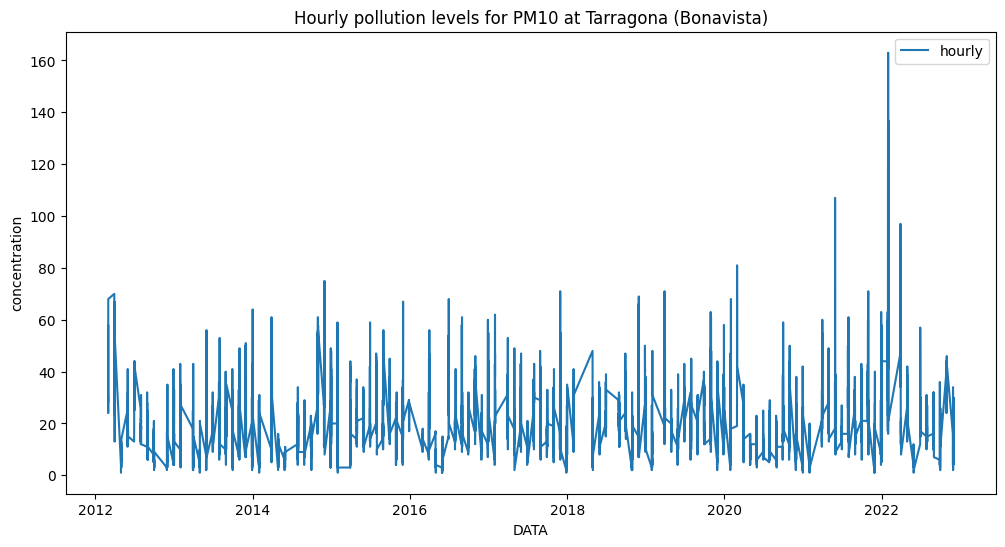

             CODI EOI  MAGNITUD  CODI INE  CODI COMARCA   01h   02h   03h  \
DATA                                                                        
31/12/2018  8019058.0      10.0    8019.0          13.0   4.0   6.0   6.0   
31/12/2019  8019058.0      10.0    8019.0          13.0   9.0   8.0  10.0   
31/12/2020  8019058.0      10.0    8019.0          13.0   6.0   5.0   5.0   
31/12/2021  8019058.0      10.0    8019.0          13.0   8.0  10.0  10.0   
31/12/2022  8019058.0      10.0    8019.0          13.0  13.0  10.0   8.0   

             04h   05h   06h   07h   08h   09h   10h   11h   12h   13h   14h  \
DATA                                                                           
31/12/2018   3.0   2.0   3.0   3.0   5.0   7.0   4.0   7.0   6.0   9.0  14.0   
31/12/2019  11.0  11.0  11.0  10.0  11.0  11.0  12.0  12.0  12.0  11.0  10.0   
31/12/2020   4.0   4.0   4.0   5.0   6.0   7.0   9.0   6.0   8.0   6.0   7.0   
31/12/2021   8.0   6.0  10.0  10.0   9.0   8.0   6.0   9.0  

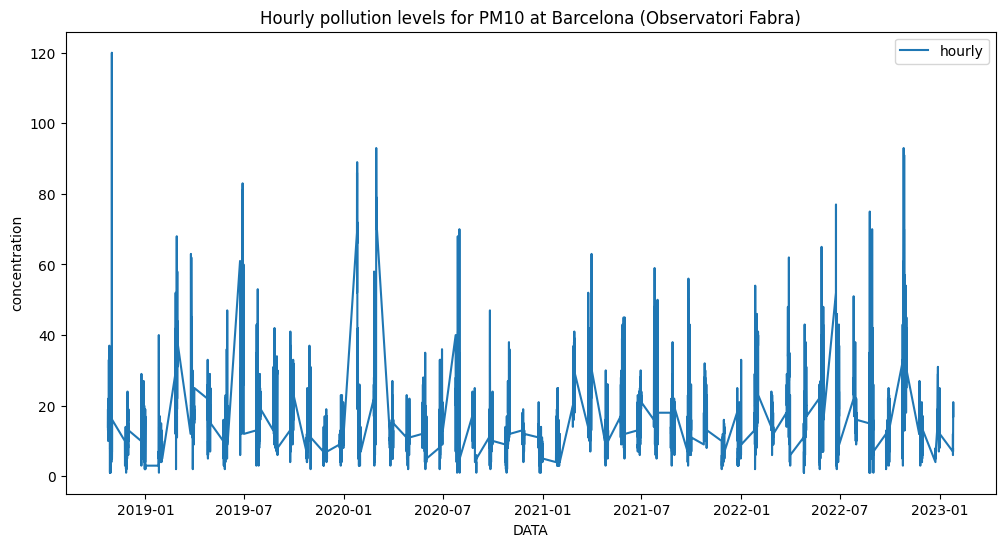

             CODI EOI  MAGNITUD  CODI INE  CODI COMARCA   01h   02h   03h  \
DATA                                                                        
31/12/2018  8202001.0      10.0    8202.0          41.0  25.0  22.0  21.0   
31/12/2019  8202001.0      10.0    8202.0          41.0  22.0  21.0  19.0   
31/12/2020  8202001.0      10.0    8202.0          41.0  17.0  15.0  11.0   
31/12/2021  8202001.0      10.0    8202.0          41.0  23.0  18.0  15.0   
31/12/2022  8202001.0      10.0    8202.0          41.0  17.0  11.0  13.0   

             04h   05h   06h   07h   08h   09h   10h   11h   12h   13h   14h  \
DATA                                                                           
31/12/2018  15.0  13.0  14.0  16.0  18.0  18.0  28.0  29.0  52.0  22.0  12.0   
31/12/2019  17.0  15.0  17.0  20.0  23.0  29.0  31.0  33.0  37.0  31.0  22.0   
31/12/2020  10.0   8.0   8.0   7.0  11.0  14.0   8.0  13.0  17.0  16.0   9.0   
31/12/2021  14.0  11.0  10.0  12.0  13.0  18.0  24.0  40.0  

KeyboardInterrupt: 

In [99]:
contaminant_df = df[(df[CONTAMINANT] == chosen_contaminant)]
unique_stations = contaminant_df[station_col].unique()
for station in unique_stations:
    df_ = contaminant_df[contaminant_df[station_col] == station].groupby(date_col).mean().iloc[-365:]
    df_[date_col] =  pd.to_datetime(df_.index, format='%d/%m/%Y', errors='coerce')  #'%Y-%d-%m'
    print(df_.tail())
    new_df = construct_hourly_df(df_)
    print(new_df.head())
    print(new_df.tail(24))
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.lineplot(data=new_df, x=date_col, y=conc_col, label = 'hourly', ax=ax)
    title = f"Hourly pollution levels for {chosen_contaminant} at {station}"
#     ax.set_ylabel(f'Pollution amount {c_units[c]}')
    plt.title(title)
    plt.show()